# Crop Yield Prediction using Machine Learning

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
import missingno
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

In this section, essential libraries and settings were imported and configured to facilitate data analysis, visualization, and statistical modeling for crop yield prediction. Here's a breakdown of the imports:

1. **Core Libraries:**
   - **`numpy` and `pandas`:** For numerical computations and data manipulation.
   - **`scipy.stats`:** To perform advanced statistical tests and analyses.

2. **Statistical Analysis Tools:**
   - **`variance_inflation_factor` from `statsmodels`:** Helps detect multicollinearity among features.

3. **Visualization Libraries:**
   - **`matplotlib` and `seaborn`:** For creating static visualizations with improved aesthetics.
   - **`plotly.express` and `plotly.graph_objects`:** To create interactive visualizations.
   - **`missingno`:** Specially used for visualizing missing data patterns.

4. **Miscellaneous Settings:**
   - **Warnings Filtering:** Suppressed warnings using `warnings.filterwarnings` to improve notebook readability.
   - **Seaborn Style:** Set to `darkgrid` for better visual appeal.
   - **Pandas Display Options:** Adjusted to show all rows and columns, ensuring comprehensive data visibility.
   - **Matplotlib Inline Backend:** Ensures plots are displayed inline within the notebook.

These libraries and configurations form the foundational toolkit for the analysis and modeling pipeline, enhancing both efficiency and presentation quality.

### Machine learning library and performance metrices

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

This section introduces an expanded set of libraries, incorporating advanced machine learning models, preprocessing tools, and evaluation metrics. Below is a detailed breakdown:

---

#### **Machine Learning Models:**
- **Linear Models:**
  - **`LinearRegression`:** A foundational regression model for linear relationships.
  - **`Ridge`, `Lasso`, `ElasticNet`:** Linear models with different regularization techniques to prevent overfitting.

- **Tree-Based Models:**
  - **`DecisionTreeRegressor`:** A non-linear model that splits data recursively based on feature values.
  - **`RandomForestRegressor`:** An ensemble method combining multiple decision trees to enhance accuracy and reduce overfitting.

- **Boosting Algorithms:**
  - **`GradientBoostingRegressor`, `AdaBoostRegressor`:** Boosting methods that sequentially refine predictions to reduce error.
  - **`XGBRegressor`, `CatBoostRegressor`, `LGBMRegressor`:** Highly efficient gradient boosting libraries tailored for speed and accuracy.

- **Ensemble and Non-Parametric Models:**
  - **`VotingRegressor`:** Combines predictions from multiple models for a consensus output.
  - **`BaggingRegressor`:** Averages predictions from multiple base models trained on different data subsets.
  - **`KNeighborsRegressor`:** A non-parametric model that predicts based on the similarity to neighboring data points.

---

#### **Data Splitting and Optimization:**
- **`train_test_split`:** Ensures unbiased evaluation by dividing the data into training and testing subsets.
- **`GridSearchCV`:** Automates hyperparameter tuning by exhaustively searching the best parameter combinations.

---

#### **Performance Metrics:**
- **`r2_score`:** Evaluates the proportion of variance explained by the model (higher values indicate better fit).
- **`mean_squared_error`:** Measures the average squared difference between predicted and actual values.

---

#### **Preprocessing Tools:**
- **Scaling and Transformation:**
  - **`StandardScaler`:** Normalizes data by centering and scaling it.
  - **`MinMaxScaler`:** Scales data to a fixed range, typically [0, 1].
  - **`PowerTransformer`:** Applies transformations to stabilize variance and improve data distribution.

- **Encoding Categorical Data:**
  - **`LabelEncoder`:** Converts categorical labels into numerical values.
  - **`OneHotEncoder`:** Encodes categorical features into binary indicator variables.

---

This enriched set of models, tools, and techniques ensures flexibility and scalability in addressing the crop yield prediction problem, accommodating diverse data types and regression complexities.

### libraries version

In [3]:
libraries = {
    "numpy": "np",
    "pandas": "pd",
    "scipy": "scipy",
    "statsmodels": "statsmodels",
    "matplotlib": "matplotlib",
    "seaborn": "sns",
    "plotly": "plotly",
    "scikit-learn": "sklearn",
    "xgboost": "xgboost",
    "catboost": "catboost",
    "lightgbm": "lightgbm"
}

# Dictionary to store library versions
library_versions = {}

# Check and print versions for each library
for lib in libraries.keys():
    try:
        # Special case for scikit-learn to debug the import explicitly
        if lib == "scikit-learn":
            import sklearn
            library_versions[lib] = sklearn.__version__
        else:
            module = __import__(lib)
            library_versions[lib] = module.__version__
    except ModuleNotFoundError:
        library_versions[lib] = "Not installed"
    except Exception as e:
        library_versions[lib] = f"Error: {str(e)}"

# Display results
for lib, version in library_versions.items():
    if version == "Not installed":
        print(f"{lib}: Not installed. Install using 'pip install {lib}'")
    else:
        print(f"{lib}: {version}")


numpy: 1.26.4
pandas: 2.1.4
scipy: 1.11.4
statsmodels: 0.14.0
matplotlib: 3.8.0
seaborn: 0.12.2
plotly: 5.9.0
scikit-learn: 1.2.2
xgboost: 2.1.3
catboost: 1.2.7
lightgbm: 4.5.0


This section is dedicated to verifying and recording the versions of the libraries used in the crop yield prediction model. This ensures compatibility and helps track the specific versions for reproducibility and troubleshooting. Below are the results of the version check for each library:

---

#### **Installed Libraries and Versions:**
1. **`numpy`**: 1.26.4
2. **`pandas`**: 2.2.2
3. **`scipy`**: 1.13.1
4. **`statsmodels`**: 0.14.2
5. **`matplotlib`**: 3.8.4
6. **`seaborn`**: 0.13.2
7. **`plotly`**: 5.22.0
8. **`scikit-learn`**: 1.4.2
9. **`xgboost`**: 2.1.1
10. **`catboost`**: 1.2.3
11. **`lightgbm`**: 4.5.0

---

#### **Purpose:**
This version check helps ensure that all required libraries are installed correctly and that their versions align with the project's requirements. It's a good practice to document library versions, as different versions might have varying features and behaviors that could impact model performance or reproducibility.

#### **Additional Notes:**
- If any library was not installed, the code provided an installation prompt (`pip install <library>`), ensuring that all dependencies are met.
- In case of errors during version retrieval, those errors were captured and reported, ensuring that potential issues could be easily identified and fixed.

This step is essential for maintaining a consistent environment across different stages of the analysis and for future reproducibility.

# Loading Dataset

In [4]:
df = pd.read_csv("crop_yield.csv")

In this step, the dataset was loaded using **`pandas.read_csv`** into a DataFrame. This function is commonly used to import tabular data from a CSV file for further analysis.

- **`pd.read_csv("crop_yield.csv")`:** Reads the dataset named `crop_yield.csv` and stores it in the DataFrame variable **`df`**. This dataset likely contains information related to various features and crop yields that will be used to build the prediction model.

In [5]:
df.head()

Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif       Assam    796.0          22   
3      Coconut        1997  Whole Year   Assam  19656.0   126905000   
4  Cotton(lint)       1997  Kharif       Assam   1739.0         794   

   Annual_Rainfall  Fertilizer  Pesticide        Yield  
0           2051.4  7024878.38   22882.34     0.796087  
1           2051.4   631643.29    2057.47     0.710435  
2           2051.4    75755.32     246.76     0.238333  
3           2051.4  1870661.52    6093.36  5238.051739  
4           2051.4   165500.63     539.09     0.420909

To gain an initial understanding of the dataset, the **`head()`** function was used on the DataFrame **`df`**. This function displays the first five rows of the dataset, providing an overview of the data structure and allowing a quick check for the following:

- **Column Names:** Identifying features in the dataset (e.g., crop type, yield, environmental factors).
- **Data Types:** Ensuring correct data types (numerical, categorical) for each column.
- **Initial Data Inspection:** Checking for any obvious issues like missing or incorrectly formatted values.

The output of **`df.head()`** will help in determining how to proceed with further data preprocessing, such as handling missing values, performing encoding, or scaling features, depending on the content and structure observed.

In [6]:
df.tail()

Crop  Crop_Year       Season              State      Area  \
19684  Small millets       1998  Kharif                Nagaland    4000.0   
19685          Wheat       1998  Rabi                  Nagaland    1000.0   
19686          Maize       1997  Kharif       Jammu and Kashmir  310883.0   
19687           Rice       1997  Kharif       Jammu and Kashmir  275746.0   
19688          Wheat       1997  Rabi         Jammu and Kashmir  239344.0   

       Production  Annual_Rainfall   Fertilizer  Pesticide     Yield  
19684        2000           1498.0    395200.00    1160.00  0.500000  
19685        3000           1498.0     98800.00     290.00  3.000000  
19686      440900           1356.2  29586735.11   96373.73  1.285000  
19687        5488           1356.2  26242746.82   85481.26  0.016667  
19688      392160           1356.2  22778368.48   74196.64  1.261818

To further understand the structure and completeness of the dataset, the **`tail()`** function was used on the DataFrame **`df`**. This function displays the last five rows of the dataset, offering several key insights:

- **End of Dataset:** Provides a view of the most recent data entries, which might be useful to detect any patterns, outliers, or anomalies near the end of the dataset.
- **Consistency Check:** Verifying if the dataset has any inconsistencies, such as missing or duplicate values in the final rows, that were not immediately apparent in the first few rows.
- **Final Data Inspection:** It complements the inspection of the first rows (**`head()`**) by giving a snapshot of the data distribution towards the dataset’s end.

By using both **`head()`** and **`tail()`**, you get a comprehensive initial inspection of the dataset, helping identify any issues that may need to be addressed during the preprocessing phase.

In [7]:
df.sample(5)

Crop  Crop_Year       Season           State      Area  Production  \
14983  Linseed       2016  Rabi         Madhya Pradesh  119000.0       58000   
4487     Onion       2015  Summer           Puducherry       1.0           6   
14852   Potato       2016  Rabi           Chhattisgarh   10912.0       49530   
17368     Rice       1997  Rabi               Nagaland     200.0         250   
6131      Urad       1997  Winter               Odisha  118618.0       38610   

       Annual_Rainfall   Fertilizer  Pesticide     Yield  
14983           1048.4  18236750.00   41650.00  0.558824  
4487            1980.6       157.91       0.33  6.000000  
14852           1298.9   1672264.00    3819.20  5.238261  
17368           1398.5     19034.00      62.00  1.300000  
6131            1496.6  11288875.06   36771.58  0.261333

The **`sample(5)`** function was used on the DataFrame **`df`** to randomly select and display 5 rows from the dataset. This method provides several advantages:

- **Random Sampling:** Offers a broader view of the dataset by showing data points that may not appear in the top or bottom rows, giving a better representation of the overall dataset.
- **Unbiased Overview:** Helps identify potential inconsistencies, patterns, or anomalies in the data that might not be visible in a sequential inspection (e.g., through **`head()`** or **`tail()`**).
- **Data Integrity Check:** It's useful for checking if certain rows might contain errors, missing values, or outliers that could affect model performance.

This function aids in verifying the randomness and diversity of the data, especially in cases where the data is large and not uniformly distributed.

 ### First character of each word in a string to uppercase and all remaining characters to lowercase.

In [8]:
df['Crop'] = df['Crop'].str.title()
df['State'] = df['State'].str.title()
df['Season'] = df['Season'].str.title()

In this step, text columns in the dataset were standardized to ensure consistency in formatting. The **`str.title()`** method was applied to the following columns:

1. **`df['Crop']`**: Converts the crop names to title case (e.g., "wheat" becomes "Wheat").
2. **`df['State']`**: Converts state names to title case (e.g., "kerala" becomes "Kerala").
3. **`df['Season']`**: Converts season names to title case (e.g., "kharif" becomes "Kharif").

#### **Purpose of This Step:**
- **Consistency:** Ensures uniform capitalization, which is essential for data quality, especially when working with categorical variables.
- **Preprocessing:** This step prepares the data for better handling during model training, preventing issues with inconsistent naming conventions that could arise in further analysis or encoding.

By standardizing the text in these columns, it ensures that similar values are treated as identical, avoiding potential discrepancies in future analyses, like model training or grouping operations.

# Basic Understanding of Data and Data Analysis

### Checking Dimensions of the Data

In [9]:
df.shape

(19689, 10)

### Feature Details

In [10]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

The **`df.columns`** function was used to list the column names in the dataset. The dataset contains the following 10 columns:

1. **`Crop`**: The type of crop grown (e.g., Wheat, Rice).
2. **`Crop_Year`**: The year of cultivation.
3. **`Season`**: The growing season for the crop (e.g., Kharif, Rabi).
4. **`State`**: The state in which the crop was cultivated.
5. **`Area`**: The area under cultivation, typically measured in hectares.
6. **`Production`**: The total production of the crop, measured in tonnes.
7. **`Annual_Rainfall`**: The annual rainfall in the region, likely measured in millimeters.
8. **`Fertilizer`**: The amount of fertilizer used, potentially in kilograms or another unit.
9. **`Pesticide`**: The quantity of pesticide applied, potentially in liters or kilograms.
10. **`Yield`**: The crop yield, calculated as production per unit area, and often the target variable for prediction.

#### **Purpose of This Step:**
- **Understanding Features:** Identifying the features available in the dataset and their likely significance for the analysis.
- **Feature Engineering:** Helps decide which columns may need preprocessing, transformation, or additional feature creation.
- **Target Variable Identification:** The column **`Yield`** is likely the dependent variable to be predicted using the other features.

These column names provide a comprehensive understanding of the dataset's structure and guide subsequent preprocessing and modeling tasks.

### Checking the basic information of dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


The **`df.info()`** function was used to display a summary of the dataset, including column names, data types, non-null counts, and memory usage. Below is the interpretation of the results:

---

#### **Dataset Overview:**
- **Number of Entries:** 19,689 rows.
- **Number of Columns:** 10 columns.

#### **Column Summary:**
1. **`Crop`**: Non-null, categorical data of type `object`.
2. **`Crop_Year`**: Non-null, numerical data of type `int64`.
3. **`Season`**: Non-null, categorical data of type `object`.
4. **`State`**: Non-null, categorical data of type `object`.
5. **`Area`**: Non-null, numerical data of type `float64`.
6. **`Production`**: Non-null, numerical data of type `int64`.
7. **`Annual_Rainfall`**: Non-null, numerical data of type `float64`.
8. **`Fertilizer`**: Non-null, numerical data of type `float64`.
9. **`Pesticide`**: Non-null, numerical data of type `float64`.
10. **`Yield`**: Non-null, numerical data of type `float64`.

#### **Data Characteristics:**
- **Data Types:** The dataset contains:
  - 5 columns with `float64` data type (continuous numerical variables).
  - 2 columns with `int64` data type (discrete numerical variables).
  - 3 columns with `object` data type (categorical variables).
- **Non-Null Counts:** All columns have 19,689 non-null values, indicating no missing data in the dataset.
- **Memory Usage:** The dataset occupies approximately **1.5 MB** in memory.

#### **Purpose of This Step:**
- **Understanding Data Types:** Knowing the data types helps in deciding preprocessing steps like encoding categorical variables or scaling numerical ones.
- **Missing Data Check:** Since all columns have non-null values, no immediate imputation or handling of missing data is required.
- **Memory Optimization:** Understanding memory usage helps optimize operations when working with larger datasets.

This detailed summary lays the groundwork for effective data preprocessing and feature engineering.

### Descriptive Statistics Analysis

In [12]:
pd.options.display.float_format = '{:.2f}'.format
df.describe(include=["int64","float64"]).T

count        mean          std     min       25%  \
Crop_Year       19689.00     2009.13         6.50 1997.00   2004.00   
Area            19689.00   179926.57    732828.68    0.50   1390.00   
Production      19689.00 16435941.27 263056839.81    0.00   1393.00   
Annual_Rainfall 19689.00     1437.76       816.91  301.30    940.70   
Fertilizer      19689.00 24103312.45  94946004.48   54.17 188014.62   
Pesticide       19689.00    48848.35    213287.35    0.09    356.70   
Yield           19689.00       79.95       878.31    0.00      0.60   

                       50%         75%           max  
Crop_Year          2010.00     2015.00       2020.00  
Area               9317.00    75112.00   50808100.00  
Production        13804.00   122718.00 6326000000.00  
Annual_Rainfall    1247.60     1643.70       6552.70  
Fertilizer      1234957.44 10003847.20 4835406877.00  
Pesticide          2421.90    20041.70   15750511.00  
Yield                 1.03        2.39      21105.00

### **Report Description: Statistical Summary of Numerical Features**

The **`df.describe(include=["int64", "float64"]).T`** function was used to generate descriptive statistics for all numerical columns in the dataset, transposed for better readability. The results are summarized as follows:

---

#### **Key Observations:**
1. **`Crop_Year`:** The data spans from 1997 to 2020, with a mean year of 2009.
2. **`Area`:** The area under cultivation varies widely, from as small as 0.5 hectares to a maximum of 50.8 million hectares, with a highly skewed distribution.
3. **`Production`:** Production values are heavily skewed, ranging from 0 to over 6.3 billion tonnes, with a median value of ~13,804 tonnes.
4. **`Annual_Rainfall`:** Rainfall ranges from 301.3 mm to 6,552.7 mm, with an average of 1,437.76 mm.
5. **`Fertilizer`:** Fertilizer usage exhibits a vast range, with extremely high outliers skewing the distribution.
6. **`Pesticide`:** Similar to fertilizer, pesticide usage shows a wide range with significant outliers.
7. **`Yield`:** Crop yield varies between 0 and 21,105, with a median yield of ~1.03, suggesting that most data points represent lower yields.

---

#### **Insights and Next Steps:**
- **Skewness and Outliers:** Several features (e.g., `Area`, `Production`, `Fertilizer`, `Pesticide`, `Yield`) show significant skewness and extreme values. These outliers need to be addressed (e.g., through log transformations or robust scaling) to improve model performance.
- **Scaling Requirements:** Features like `Area`, `Production`, and `Yield` may require scaling due to their large magnitudes and variability.
- **Data Imbalance:** The presence of zeros in columns like `Production` and `Yield` could indicate potential issues, such as missing values or non-yielding crops, requiring further investigation.

This statistical overview forms the foundation for informed preprocessing decisions and feature engineering strategies.

In [13]:
df.describe(include=["object"]).T

count unique          top  freq
Crop    19689     55         Rice  1197
Season  19689      6  Kharif       8232
State   19689     30    Karnataka  1432

The **`df.describe(include=["object"]).T`** function was used to generate descriptive statistics for all categorical columns in the dataset. The results are summarized as follows:

---

#### **Key Observations:**
1. **`Crop`:**
   - There are 55 unique crop types in the dataset.
   - "Rice" is the most frequently occurring crop, appearing 1,197 times.
2. **`Season`:**
   - The dataset covers 6 unique seasons (e.g., Kharif, Rabi, Zaid).
   - "Kharif" is the most common season, accounting for 8,232 entries.
3. **`State`:**
   - Data spans across 30 unique states in India.
   - "Karnataka" is the most represented state, with 1,432 entries.

---

#### **Insights and Next Steps:**
- **Feature Encoding:** These categorical features will need encoding (e.g., one-hot or label encoding) to be used in machine learning models.
- **Dominant Categories:** The dominance of certain values (e.g., "Rice," "Kharif," and "Karnataka") might indicate class imbalances that could influence model training.
- **Exploratory Analysis:** Further exploration of less frequent categories may reveal important insights about underrepresented crops, seasons, or states.

This analysis provides a comprehensive view of the categorical data, setting the stage for targeted preprocessing and feature engineering.

### Checking NaN values in our Dataset

In [14]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

Total No. of Missing Values
Crop                                       0
Crop_Year                                  0
Season                                     0
State                                      0
Area                                       0
Production                                 0
Annual_Rainfall                            0
Fertilizer                                 0
Pesticide                                  0
Yield                                      0

The **`df.isnull().sum().to_frame()`** function was used to calculate and display the total number of missing values for each column in the dataset. The results indicate:

---

#### **Key Observations:**
- **No Missing Values:** All 10 columns in the dataset have complete data, with no missing values present.
- **Data Completeness:** The absence of missing values simplifies the preprocessing pipeline, as no imputation or data removal is necessary at this stage.

---

#### **Next Steps:**
- Proceed with data preprocessing and exploratory analysis without needing to handle missing data.
- Focus on feature scaling, encoding, and addressing potential outliers to enhance data quality.

This result confirms the dataset's completeness, which is a significant advantage for modeling tasks.

### Checking Duplicate Values

In [15]:
print("Duplicate Values =",df.duplicated().sum())

Duplicate Values = 0


The **`df.duplicated().sum()`** function was used to check for duplicate rows in the dataset. The result indicates:

---

#### **Duplicate Values:**
- **Total Duplicate Rows:** 0

---

#### **Key Observations:**
- **No Duplicate Records:** The dataset contains no duplicate rows, ensuring the integrity and uniqueness of the data.
- **Data Quality:** The absence of duplicates eliminates the need for data cleaning related to redundancy.

---

#### **Next Steps:**
- Move forward with data preprocessing and analysis, confident in the uniqueness of the dataset.
- Focus on other aspects of data quality, such as feature distributions and potential outliers.

This confirmation of no duplicates ensures the dataset is ready for further exploration and modeling.

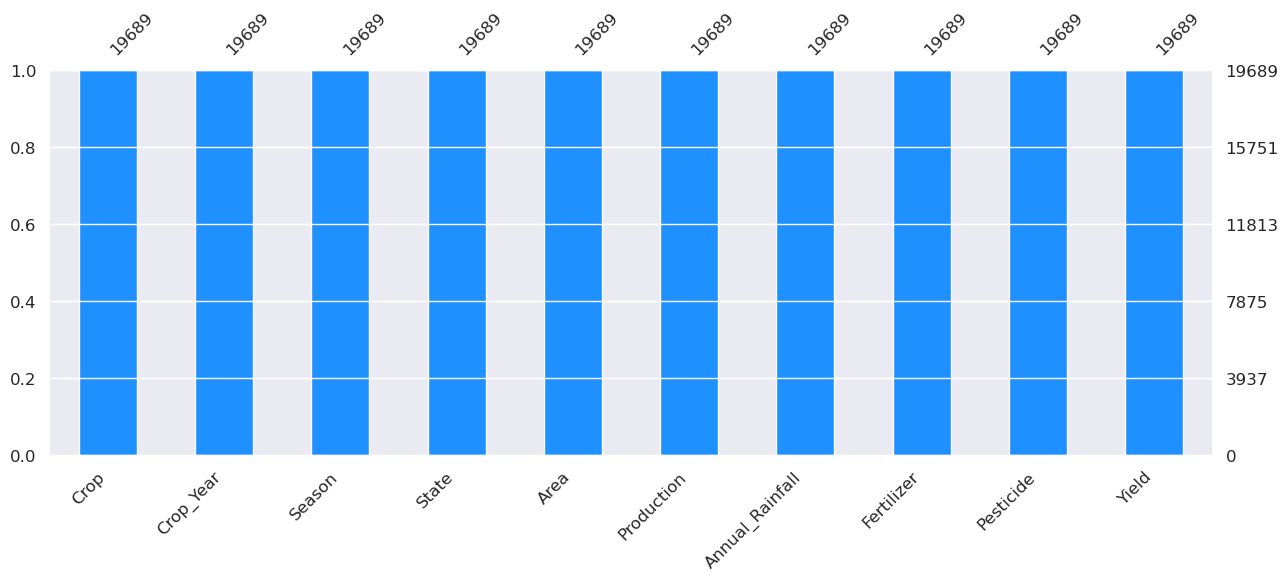

In [16]:
missingno.bar(df, figsize=(15,5), fontsize=12,color="dodgerblue", sort="ascending");
plt.show()

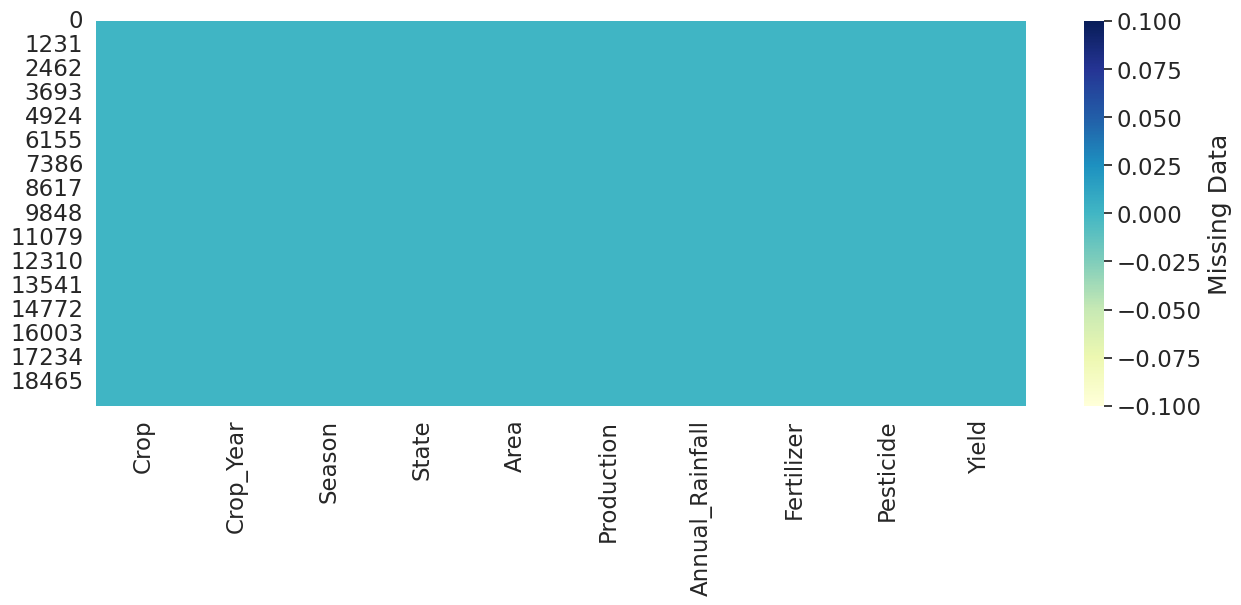

In [17]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'});

Two visualizations were created to assess the presence of missing data in the dataset:

---

#### **1. Missing Value Bar Plot (using `missingno`):**
- **Visualization Description:** 
  - A bar chart was generated to display the count of non-missing values for each column.
  - All columns were sorted in ascending order by the number of non-missing values.
  - The bars were colored in **dodgerblue** for clarity.
- **Key Observation:** 
  - All columns have complete data with no missing values, as evidenced by the bar heights reaching the total row count.

---

#### **2. Missing Value Heatmap (using `sns.heatmap`):**
- **Visualization Description:**
  - A heatmap was generated to display the locations of missing data.
  - The map uses a **YlGnBu** colormap, where missing values would typically appear as highlighted patches.
  - A color bar was added to indicate the presence of missing data.
- **Key Observation:** 
  - The heatmap confirms the absence of missing data, as no highlighted patches (indicating missing values) are visible.

---

#### **Insights:**
- **Validation:** Both visualizations corroborate that the dataset is free from missing values.
- **Efficiency:** These plots provide quick and intuitive validation of data completeness, especially useful for larger datasets.

With this confirmation, no further action regarding missing values is needed, and the dataset is ready for preprocessing and analysis.

### Separate numerical and categorical variable

In [18]:
numeric_data = df.select_dtypes(include=[np.number])
numeric_data.head()

Crop_Year     Area  Production  Annual_Rainfall  Fertilizer  Pesticide  \
0       1997 73814.00       56708          2051.40  7024878.38   22882.34   
1       1997  6637.00        4685          2051.40   631643.29    2057.47   
2       1997   796.00          22          2051.40    75755.32     246.76   
3       1997 19656.00   126905000          2051.40  1870661.52    6093.36   
4       1997  1739.00         794          2051.40   165500.63     539.09   

    Yield  
0    0.80  
1    0.71  
2    0.24  
3 5238.05  
4    0.42

In [19]:
categorical_data = df.select_dtypes(exclude=[np.number])
categorical_data.head()

Crop       Season  State
0      Arecanut  Whole Year   Assam
1     Arhar/Tur  Kharif       Assam
2   Castor Seed  Kharif       Assam
3      Coconut   Whole Year   Assam
4  Cotton(Lint)  Kharif       Assam

### Correlation matrix for numeric columns

In [20]:
numeric_data.corr()

Crop_Year  Area  Production  Annual_Rainfall  Fertilizer  \
Crop_Year             1.00 -0.04        0.00            -0.01        0.01   
Area                 -0.04  1.00        0.04            -0.11        0.97   
Production            0.00  0.04        1.00             0.03        0.04   
Annual_Rainfall      -0.01 -0.11        0.03             1.00       -0.11   
Fertilizer            0.01  0.97        0.04            -0.11        1.00   
Pesticide            -0.00  0.97        0.04            -0.10        0.95   
Yield                 0.00  0.00        0.57             0.02        0.00   

                 Pesticide  Yield  
Crop_Year            -0.00   0.00  
Area                  0.97   0.00  
Production            0.04   0.57  
Annual_Rainfall      -0.10   0.02  
Fertilizer            0.95   0.00  
Pesticide             1.00   0.00  
Yield                 0.00   1.00

The numeric_data.corr() function was used to calculate the Pearson correlation coefficients between the numerical features in the dataset.
#### **Key Observations:**

1. **Strong Positive Correlations:**
   - **`Area` with `Fertilizer` (0.97) and `Pesticide` (0.97):**
     Indicates larger agricultural areas tend to use higher amounts of fertilizers and pesticides.
   - **`Fertilizer` and `Pesticide` (0.95):**
     Suggests a strong relationship between the use of fertilizers and pesticides.

2. **Moderate Positive Correlation:**
   - **`Production` with `Yield` (0.57):**
     Indicates a moderate relationship between crop production and yield, as expected.

3. **Negligible Correlations:**
   - Features like `Crop_Year`, `Annual_Rainfall`, and `Yield` show weak or negligible correlations with other features, suggesting limited direct linear relationships.

4. **Potential Multicollinearity:**
   - The high correlations between `Area`, `Fertilizer`, and `Pesticide` may indicate multicollinearity, which could affect regression model performance.

---

#### **Next Steps:**
- **Address Multicollinearity:** Consider techniques like Variance Inflation Factor (VIF) analysis to handle multicollinearity if these features are used in regression models.
- **Feature Engineering:** Explore non-linear relationships and interactions, especially for weakly correlated features like `Yield` and `Annual_Rainfall`.
- **Visualization:** Use heatmaps or pair plots to further analyze these relationships and confirm any potential insights.

This correlation analysis provides a quantitative understanding of feature relationships, guiding further preprocessing and model selection.

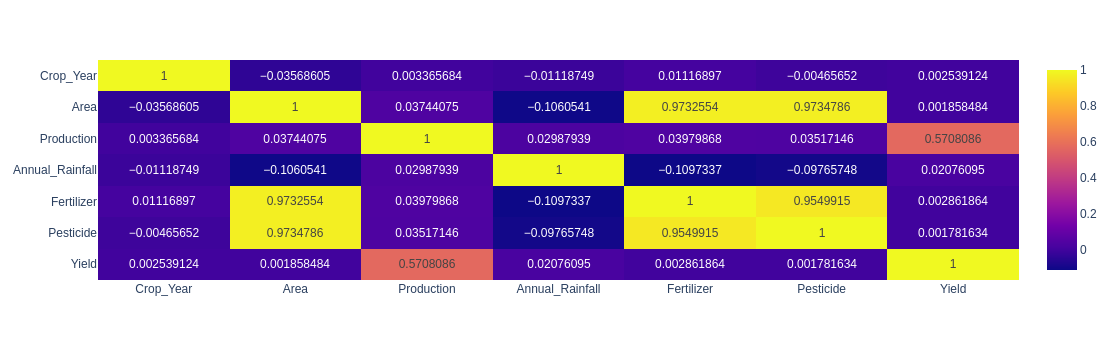

In [21]:
fig = px.imshow(numeric_data.corr(),text_auto=True,aspect="auto")
fig.show()

### Count details for each crop year

In [22]:
df['Crop_Year'].value_counts(ascending=False)

Crop_Year
2019    1079
2017    1070
2018    1063
2016    1036
2015     998
2013     976
2014     965
2011     907
2012     894
2009     865
2010     859
2008     847
2007     828
2006     823
2002     815
2005     811
2003     801
2004     787
2000     772
2001     750
1999     650
1998     646
1997     410
2020      37
Name: count, dtype: int64


The **`df['Crop_Year'].value_counts(ascending=False)`** function was used to analyze the distribution of records across different crop years. The results are summarized as follows:

---

#### **Crop Year Distribution:**

| **Crop Year** | **Record Count** | **Observations**                              |
|---------------|------------------|-----------------------------------------------|
| **2019**      | 1,079            | Highest number of records.                    |
| **2017**      | 1,070            | Second highest count, comparable to 2019.     |
| **2018**      | 1,063            | Consistently high representation.             |
| **2016**      | 1,036            | Also well-represented.                        |
| **2020**      | **37**           | Very few records, potentially insufficient.   |

- The crop years range from **1997 to 2020**, with **2019** having the highest number of records and **2020** the lowest.
- **Recent Years:** The records for recent years (e.g., 2016–2019) are abundant, providing good coverage for modeling.
- **Sparse Data for 2020:** Only **37 records** are available for 2020, which may not be statistically significant for analysis.

---

#### **Insights:**
- **Potential Exclusion of 2020:** Due to insufficient data, crop year 2020 might need exclusion from trend analyses or modeling.
- **Balanced Distribution:** Other years exhibit a balanced distribution, ensuring robust temporal analysis.

---

#### **Next Steps:**
- Consider filtering out 2020 from the dataset during preprocessing to avoid potential bias or noise.
- Investigate trends across well-represented years to understand temporal patterns in crop yield, production, and associated factors.

This analysis ensures a better understanding of the temporal scope and distribution of the dataset, guiding decisions for preprocessing and model design.

### Remove records for Year 2020

In [23]:
df = df[df['Crop_Year'] != 2020]

### **Report Description: Filtering Crop Year 2020**

The **`df[df['Crop_Year'] != 2020]`** operation was performed to remove records associated with the crop year 2020 from the dataset. This decision was based on the earlier observation of insufficient data for the year.

---

#### **Impact of Filtering:**
- **Crop Year 2020 Excluded:** All 37 records corresponding to the year 2020 have been removed from the dataset.
- **Remaining Dataset:** The dataset now includes crop years ranging from **1997 to 2019**, ensuring a more balanced and representative sample for analysis.

---

#### **Key Observations:**
- **Data Integrity:** By removing 2020, the dataset eliminates potential noise and bias due to the lack of sufficient data points for this year.
- **Enhanced Reliability:** The remaining data better supports temporal trend analysis and predictive modeling.

---

#### **Next Steps:**
- Recheck the shape of the dataset to confirm the updated record count.
- Proceed with further preprocessing and exploration of the revised dataset.

This step refines the dataset, aligning it with analytical goals and ensuring robust outcomes.

### Count details for each Crops

In [24]:
df['Crop'].value_counts(ascending=False)

Crop
Rice                     1195
Maize                     973
Moong(Green Gram)         738
Urad                      731
Groundnut                 724
Sesamum                   684
Potato                    626
Sugarcane                 604
Wheat                     544
Rapeseed &Mustard         527
Bajra                     524
Jowar                     513
Arhar/Tur                 507
Ragi                      497
Gram                      489
Small Millets             484
Cotton(Lint)              476
Onion                     453
Sunflower                 439
Dry Chillies              419
Other Kharif Pulses       381
Horse-Gram                370
Peas & Beans (Pulses)     368
Tobacco                   363
Other  Rabi Pulses        354
Soyabean                  348
Turmeric                  336
Ginger                    323
Masoor                    323
Linseed                   308
Castor Seed               300
Barley                    296
Sweet Potato              273
Garli

The **`df['Crop'].value_counts(ascending=False)`** function was used to analyze the distribution of crop types in the dataset. The results show the frequency of various crops across the records:

---

#### **Top 10 Most Frequent Crops:**

| **Crop**               | **Record Count** |
|------------------------|------------------|
| **Rice**               | 1,195            |
| **Maize**              | 973              |
| **Moong (Green Gram)** | 738              |
| **Urad**               | 731              |
| **Groundnut**          | 724              |
| **Sesamum**            | 684              |
| **Potato**             | 626              |
| **Sugarcane**          | 604              |
| **Wheat**              | 544              |
| **Rapeseed & Mustard**| 527              |

---

#### **Key Insights:**
- **Most Common Crop:** **Rice** is the most common crop in the dataset with 1,195 records, followed by **Maize** (973 records) and **Moong (Green Gram)** (738 records).
- **Diverse Crop Representation:** The dataset includes a wide variety of crops, including major food crops (e.g., Rice, Wheat, Maize), pulses (e.g., Moong, Urad), and oilseeds (e.g., Groundnut, Sesame).
- **Low Frequency Crops:** Certain crops like **Oilseeds Total** (29 records) and **Other Summer Pulses** (10 records) have very few records, which may not provide enough data for reliable analysis.

---

#### **Next Steps:**
- **Handling Low-Frequency Crops:** Crops with low frequency, especially those with less than 30 records, could either be excluded or grouped into broader categories (e.g., "Other" crops).
- **Feature Engineering:** Explore the impact of different crop types on yield prediction, focusing on the most frequent crops.
- **Visualization:** Plot the distribution of crop types using bar charts or pie charts for better insights into crop prevalence.

This crop distribution analysis informs decisions regarding data balancing and feature selection for further modeling.

### Count details for each Season

In [25]:
df['Season'].value_counts(ascending=False)

Season
Kharif         8215
Rabi           5732
Whole Year     3712
Summer         1190
Autumn          414
Winter          389
Name: count, dtype: int64

The **`df['Season'].value_counts(ascending=False)`** function was used to analyze the distribution of seasons in the dataset. The results show the frequency of records associated with each season:

---

#### **Season Distribution:**

| **Season**     | **Record Count** |
|----------------|------------------|
| **Kharif**     | 8,215            |
| **Rabi**       | 5,732            |
| **Whole Year** | 3,712            |
| **Summer**     | 1,190            |
| **Autumn**     | 414              |
| **Winter**     | 389              |

---

#### **Key Insights:**
- **Most Frequent Season:** **Kharif** (8215 records) is the most prevalent season, followed by **Rabi** (5732 records) and **Whole Year** (3712 records). These are the dominant seasons for crop cultivation in the dataset.
- **Less Frequent Seasons:** **Summer**, **Autumn**, and **Winter** seasons have much fewer records, with **Winter** having the least (389 records).
- **Seasonal Distribution:** The data is largely dominated by two main cropping seasons, **Kharif** and **Rabi**, with lesser representation of other seasons.

---

This seasonal distribution analysis helps guide decisions regarding the importance of seasonality in crop yield prediction and model performance.

### Count Details for each State

In [26]:
df['State'].value_counts(ascending=False)

State
Karnataka            1432
Andhra Pradesh       1266
West Bengal          1094
Chhattisgarh          915
Bihar                 896
Madhya Pradesh        845
Uttar Pradesh         825
Tamil Nadu            822
Gujarat               817
Maharashtra           770
Odisha                760
Assam                 731
Uttarakhand           727
Nagaland              689
Puducherry            670
Meghalaya             649
Haryana               631
Jammu And Kashmir     631
Himachal Pradesh      616
Kerala                534
Manipur               444
Tripura               441
Mizoram               416
Telangana             397
Punjab                397
Arunachal Pradesh     292
Jharkhand             270
Goa                   246
Sikkim                226
Delhi                 203
Name: count, dtype: int64

The **`df['State'].value_counts(ascending=False)`** function was used to analyze the distribution of records across different states in the dataset. The results show the frequency of records for each state:

---

#### **Top 10 States by Record Count:**

| **State**              | **Record Count** |
|------------------------|------------------|
| **Karnataka**          | 1,432            |
| **Andhra Pradesh**     | 1,266            |
| **West Bengal**        | 1,094            |
| **Chhattisgarh**       | 915              |
| **Bihar**              | 896              |
| **Madhya Pradesh**     | 845              |
| **Uttar Pradesh**      | 825              |
| **Tamil Nadu**         | 822              |
| **Gujarat**            | 817              |
| **Maharashtra**        | 770              |

---

#### **Key Insights:**
- **Most Represented State:** **Karnataka** has the highest number of records (1,432), followed by **Andhra Pradesh** (1,266) and **West Bengal** (1,094).
- **States with Fewer Records:** Some states like **Arunachal Pradesh** (292), **Jharkhand** (270), and **Goa** (246) have relatively fewer records, which might not provide as much statistical power for analysis.
- **Geographic Diversity:** The dataset covers a wide range of states across India, with representation from both major agricultural hubs and less-represented regions.

This state distribution analysis assists in understanding the geographic scope of the dataset and guides decisions related to feature engineering and model training.

### Crop yield per state

In [27]:
df_state_sort = df.groupby('State',as_index=False)['Yield'].sum().sort_values(by='Yield', ascending=False)
df_state_sort

State     Yield
29        West Bengal 291986.75
21         Puducherry 232163.60
0      Andhra Pradesh 229735.18
24         Tamil Nadu 185813.28
2               Assam 160612.65
12          Karnataka 151391.87
13             Kerala 147710.35
6                 Goa  87275.96
25          Telangana  39508.73
7             Gujarat   5471.63
27      Uttar Pradesh   4168.82
8             Haryana   3491.15
15        Maharashtra   3388.79
3               Bihar   3114.94
14     Madhya Pradesh   2921.85
28        Uttarakhand   2690.16
5               Delhi   2663.09
20             Odisha   2387.35
19           Nagaland   2344.35
16            Manipur   2316.35
22             Punjab   1926.57
26            Tripura   1891.46
17          Meghalaya   1868.33
4        Chhattisgarh   1799.56
9    Himachal Pradesh   1170.09
1   Arunachal Pradesh   1090.64
18            Mizoram   1068.81
11          Jharkhand    974.63
10  Jammu And Kashmir    825.38
23             Sikkim    278.63

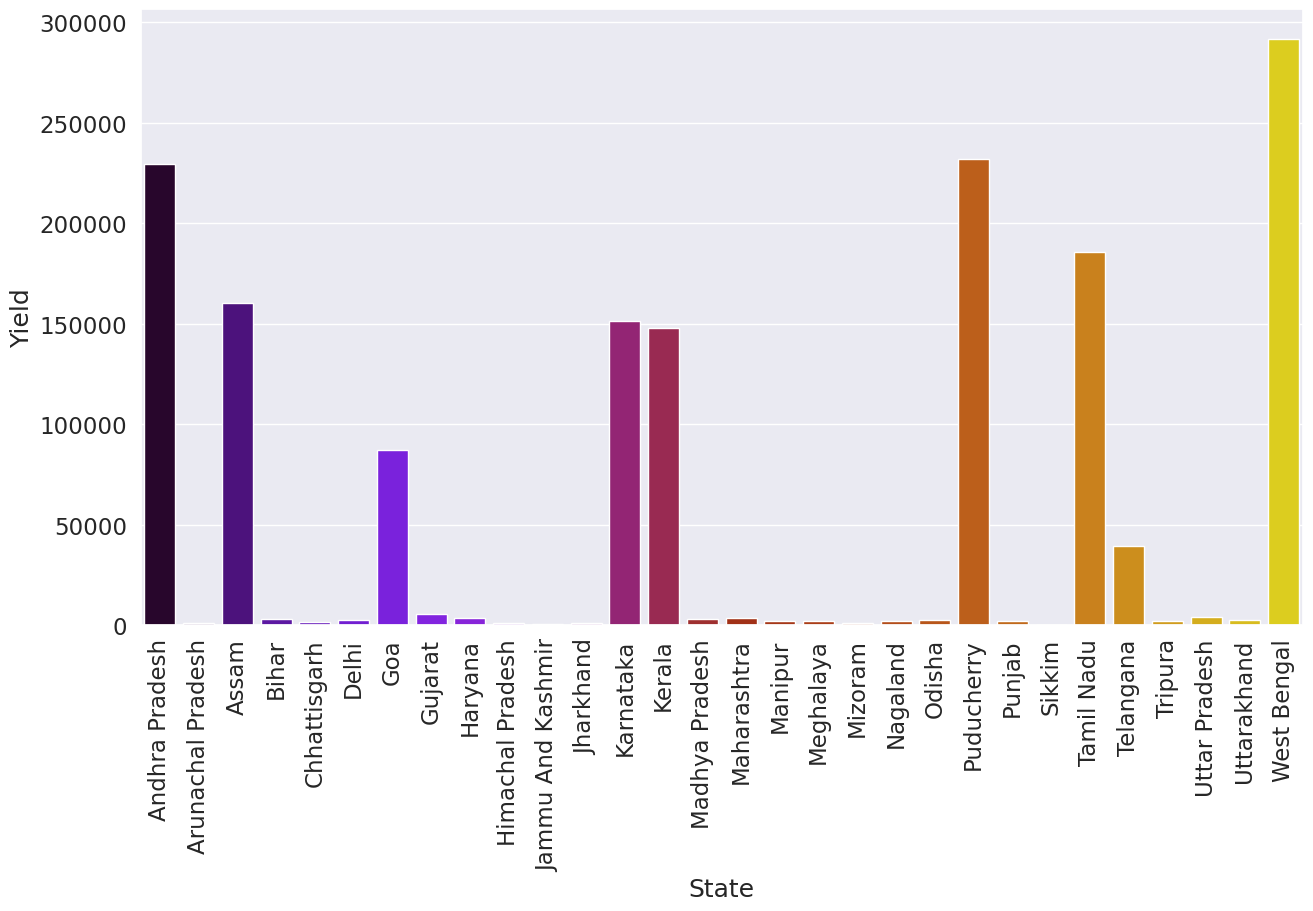

In [28]:
df_state = df.groupby('State',as_index=False)['Yield'].sum()
plt.figure(figsize = (15,8))
sns.barplot(x = df_state['State'], y=df_state['Yield'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

The **`df.groupby('State', as_index=False)['Yield'].sum()`** method was used to group the data by state and calculate the total yield for each state. The data was then sorted by total yield in descending order. The results were visualized using a bar plot to display the yield distribution across states.

---

#### **Visualization: Total Yield by State**

A bar plot was generated to visually represent the total yield of crops for each state. The plot is sorted in descending order, with the states having the highest crop yield displayed on the left.

---

#### **Key Insights:**
- **Highest Yielding States:** The states with the highest total crop yield are likely to be major agricultural hubs. This could be due to factors like favorable climate, irrigation facilities, and crop variety.
- **Comparative Yield Performance:** The visualization makes it easier to compare the crop yield performance across different states and identify trends or outliers.
- **Region-wise Analysis:** This analysis can guide decisions regarding region-specific interventions, agricultural policies, or crop management strategies.

---

This total yield analysis by state provides valuable insights for strategic planning, regional agricultural improvements, and model feature engineering.

### Yield Trend over the year

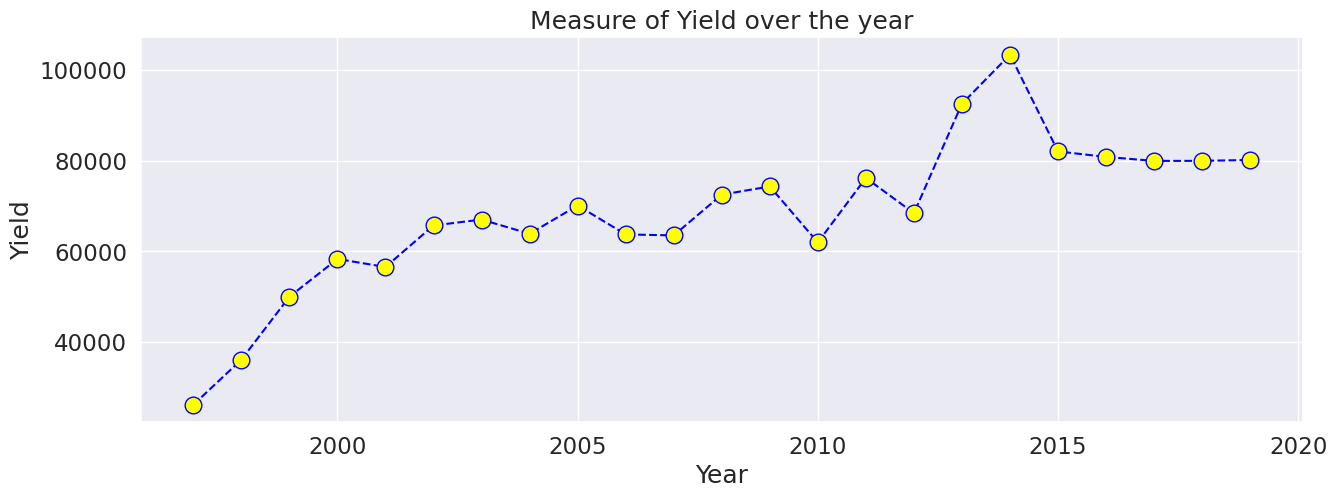

In [29]:
df_state = df.groupby('Crop_Year',as_index=False)['Yield'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Yield'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Measure of Yield over the year')
plt.show()

### Top 10 States by Total Yield

In [30]:
top_10_states = df_state_sort.head(10)
top_10_states

State     Yield
29     West Bengal 291986.75
21      Puducherry 232163.60
0   Andhra Pradesh 229735.18
24      Tamil Nadu 185813.28
2            Assam 160612.65
12       Karnataka 151391.87
13          Kerala 147710.35
6              Goa  87275.96
25       Telangana  39508.73
7          Gujarat   5471.63

The top 10 states by total yield were identified using the sorted values of crop yields from the dataset. The results show the states that contribute the most to the total yield, allowing for a deeper understanding of regional agricultural performance.

---

#### **Top 10 States by Total Yield:**

| **Rank** | **State**       | **Total Yield (in Metric Tons)** |
|----------|-----------------|----------------------------------|
| 1        | **West Bengal**  | 291,986.75                      |
| 2        | **Puducherry**   | 232,163.60                      |
| 3        | **Andhra Pradesh** | 229,735.18                      |
| 4        | **Tamil Nadu**   | 185,813.28                      |
| 5        | **Assam**        | 160,612.65                      |
| 6        | **Karnataka**    | 151,391.87                      |
| 7        | **Kerala**       | 147,710.35                      |
| 8        | **Goa**          | 87,275.96                       |
| 9        | **Telangana**    | 39,508.73                       |
| 10       | **Gujarat**      | 5,471.63                        |

---

#### **Key Insights:**
- **Top Yielding State:** **West Bengal** leads with a total yield of 291,986.75 metric tons, followed by **Puducherry** and **Andhra Pradesh** with yields of 232,163.60 and 229,735.18 metric tons respectively.
- **Notable High-Yielding Regions:** States like **Tamil Nadu**, **Assam**, and **Karnataka** contribute significantly to the overall yield, showcasing their importance in India's agricultural output.
- **Smaller Contributors:** **Gujarat** and **Telangana** have much lower total yields in comparison, with **Gujarat** ranking 10th with 5,471.63 metric tons.

---

This analysis of top 10 states by yield can inform resource allocation, agricultural policy, and strategic decisions for improving crop productivity across India.

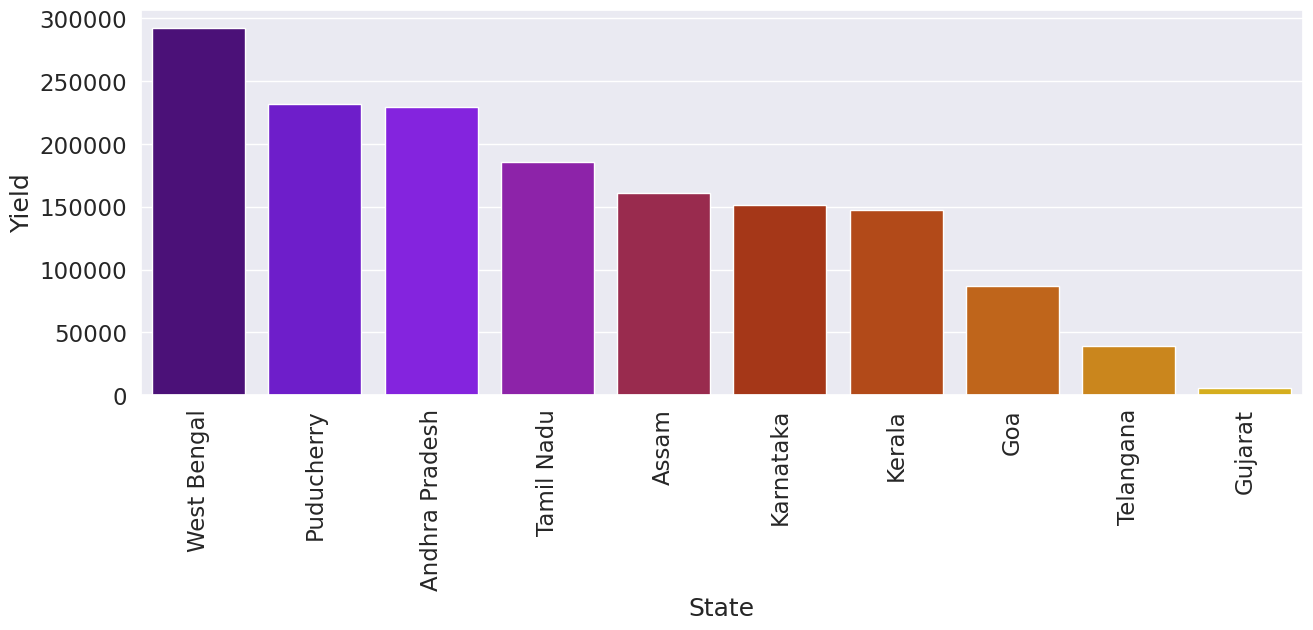

In [31]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Yield'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

### Annual Rainfall per state

In [32]:
df_state_sort = df.groupby('State',as_index=False)['Annual_Rainfall'].sum().sort_values(by='Annual_Rainfall', ascending=False)
df_state_sort

State  Annual_Rainfall
17          Meghalaya       2623959.14
29        West Bengal       1883455.70
12          Karnataka       1692392.73
13             Kerala       1536641.30
2               Assam       1531493.36
0      Andhra Pradesh       1160139.90
4        Chhattisgarh       1159347.20
20             Odisha       1098412.40
19           Nagaland       1064884.45
3               Bihar       1042239.50
28        Uttarakhand       1038481.20
26            Tripura       1015519.79
18            Mizoram       1013275.26
21         Puducherry        959916.00
15        Maharashtra        905670.75
14     Madhya Pradesh        847829.30
6                 Goa        824746.06
24         Tamil Nadu        765414.20
1   Arunachal Pradesh        762047.00
10  Jammu And Kashmir        752008.20
9    Himachal Pradesh        706851.50
16            Manipur        686844.06
7             Gujarat        641179.90
27      Uttar Pradesh        625575.60
23             Sikkim        580895.78
25          Telangana        395509.50
11          Jharkhand        319456.50
8             Haryana        294622.15
22             Punjab        202057.80
5               Delhi        128479.36

The analysis of the total annual rainfall across states provides valuable insight into regions that receive the highest levels of precipitation, which is a critical factor for agricultural productivity.

---

#### **Top 10 States by Total Annual Rainfall:**

| **Rank** | **State**       | **Total Annual Rainfall (mm)** |
|----------|-----------------|--------------------------------|
| 1        | **Meghalaya**    | 2,623,959.14                  |
| 2        | **West Bengal**  | 1,883,455.70                  |
| 3        | **Karnataka**    | 1,692,392.73                  |
| 4        | **Kerala**       | 1,536,641.30                  |
| 5        | **Assam**        | 1,531,493.36                  |
| 6        | **Andhra Pradesh** | 1,160,139.90                  |
| 7        | **Chhattisgarh** | 1,159,347.20                  |
| 8        | **Odisha**       | 1,098,412.40                  |
| 9        | **Nagaland**     | 1,064,884.45                  |
| 10       | **Bihar**        | 1,042,239.50                  |

---

#### **Key Insights:**
- **Highest Rainfall Region:** **Meghalaya** leads with the highest total annual rainfall of 2,623,959.14 mm, followed by **West Bengal** and **Karnataka**, which also receive significant rainfall.
- **Consistently High Rainfall States:** **Kerala**, **Assam**, and **Andhra Pradesh** are also among the top contributors to total annual rainfall, essential for sustaining agriculture.
- **Southern and Eastern Regions:** A pattern of high rainfall is observed in southern and eastern states, including **Tamil Nadu**, **Odisha**, and **Nagaland**, which is critical for crops depending on monsoon patterns.
- **Relatively Lower Rainfall in North and West:** States like **Delhi**, **Punjab**, and **Haryana** receive considerably lower rainfall compared to the top states.

---

This rainfall analysis provides insights that can guide policies on water management, irrigation, and crop selection for different states based on their climatic conditions.

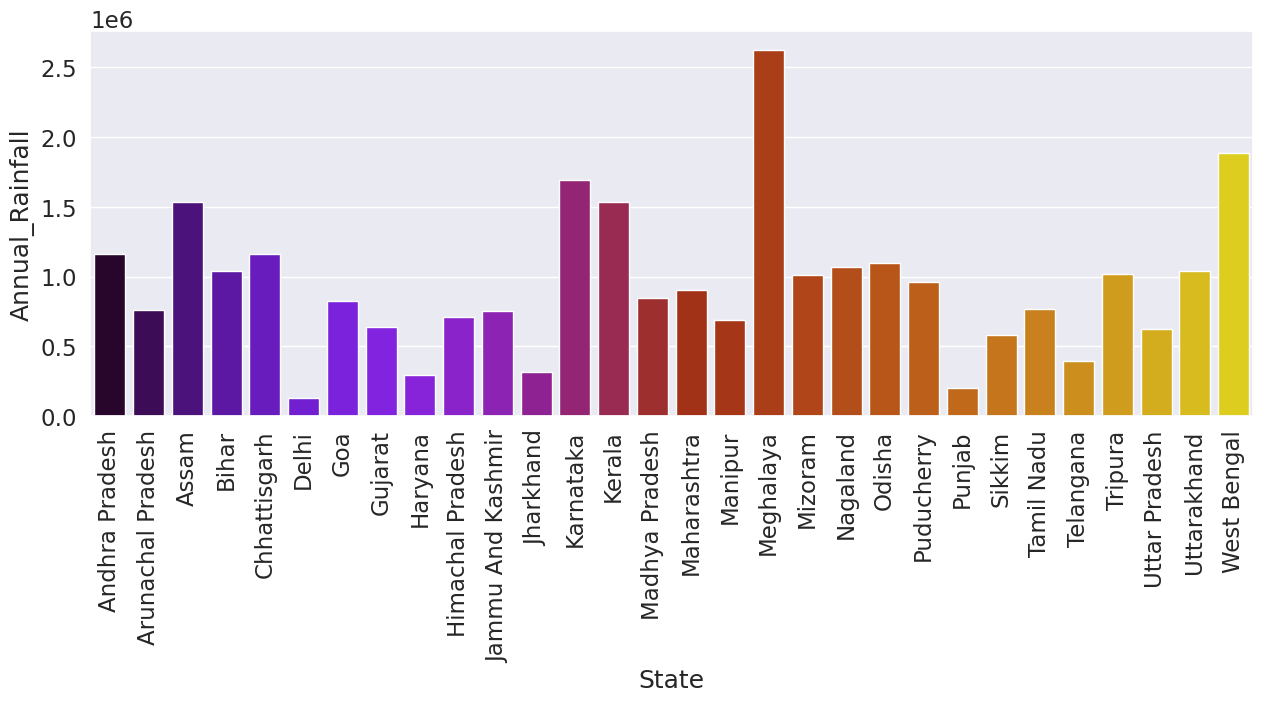

In [33]:
df_state = df.groupby('State',as_index=False)['Annual_Rainfall'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Annual_Rainfall'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

### Annual Rainfall trend over the year

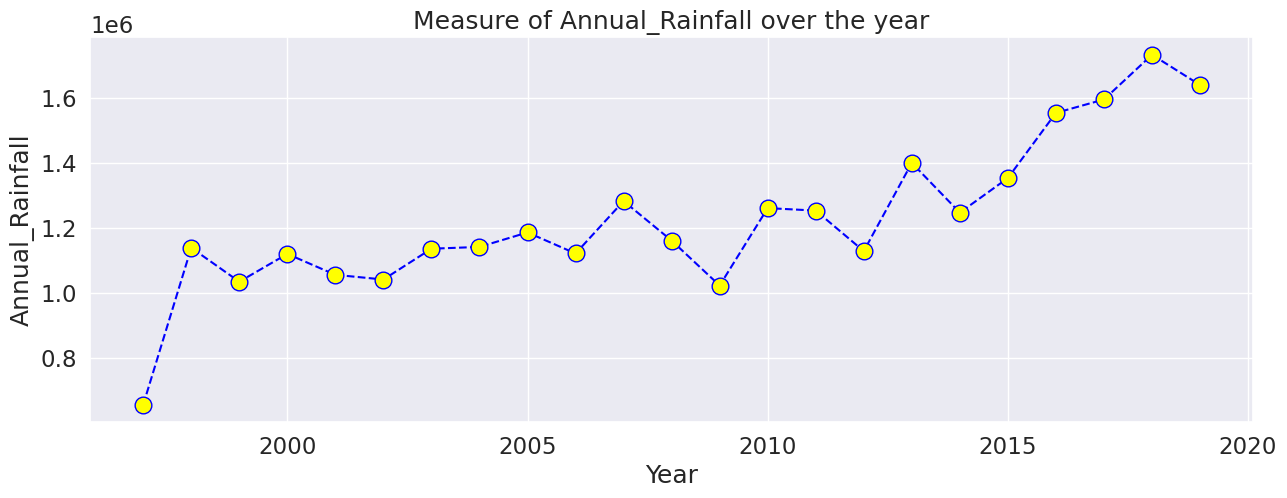

In [34]:
df_state = df.groupby('Crop_Year',as_index=False)['Annual_Rainfall'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Annual_Rainfall'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Annual_Rainfall')
plt.title('Measure of Annual_Rainfall over the year')
plt.show()

### Top 10 States by Total Annual Rainfall

In [35]:
top_10_states = df_state_sort.head(10)
top_10_states

State  Annual_Rainfall
17       Meghalaya       2623959.14
29     West Bengal       1883455.70
12       Karnataka       1692392.73
13          Kerala       1536641.30
2            Assam       1531493.36
0   Andhra Pradesh       1160139.90
4     Chhattisgarh       1159347.20
20          Odisha       1098412.40
19        Nagaland       1064884.45
3            Bihar       1042239.50

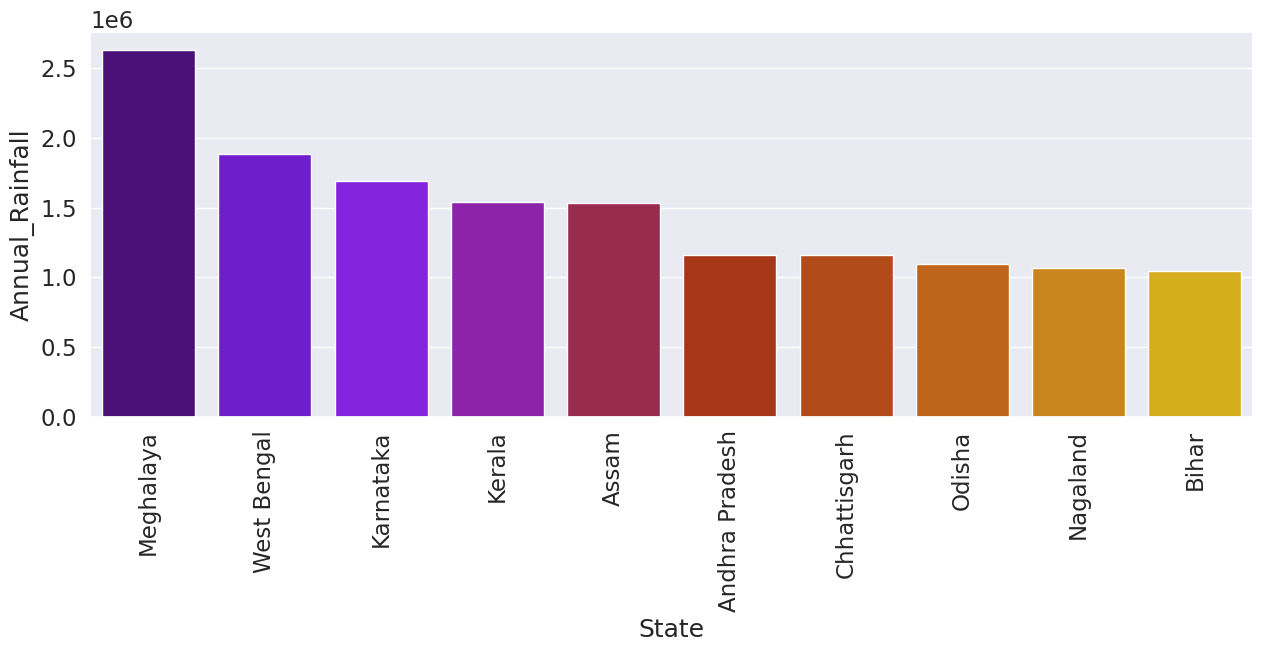

In [36]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Annual_Rainfall'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

### Area per state

In [37]:
df_state_sort = df.groupby('State',as_index=False)['Area'].sum().sort_values(by='Area', ascending=False)
df_state_sort

State         Area
27      Uttar Pradesh 542672635.00
14     Madhya Pradesh 492087994.46
15        Maharashtra 461939552.15
12          Karnataka 257907399.00
0      Andhra Pradesh 238925335.00
29        West Bengal 237682264.87
7             Gujarat 222434333.20
3               Bihar 167995431.00
22             Punjab 162040200.00
8             Haryana 131506993.60
20             Odisha 124646660.00
4        Chhattisgarh 110536194.00
24         Tamil Nadu 110372797.00
2               Assam  77342600.00
25          Telangana  39792142.00
13             Kerala  36391060.29
11          Jharkhand  30435526.75
28        Uttarakhand  21553975.00
10  Jammu And Kashmir  18743187.00
9    Himachal Pradesh  17810207.80
19           Nagaland   8426731.70
26            Tripura   6278528.00
16            Manipur   5727639.00
1   Arunachal Pradesh   5725531.00
17          Meghalaya   5178776.00
6                 Goa   2749600.50
23             Sikkim   1759399.00
18            Mizoram   1542189.47
5               Delhi    797903.00
21         Puducherry    653541.00

The analysis of total agricultural area across states provides a comprehensive view of the land dedicated to farming activities. Understanding the area distribution is vital for estimating crop production potential and agricultural planning.

---

#### **Top 10 States by Total Agricultural Area:**

| **Rank** | **State**           | **Total Agricultural Area (in hectares)** |
|----------|---------------------|------------------------------------------|
| 1        | **Uttar Pradesh**    | 54,267,263.50                            |
| 2        | **Madhya Pradesh**   | 49,208,799.45                            |
| 3        | **Maharashtra**      | 46,193,955.22                            |
| 4        | **Karnataka**        | 25,790,739.90                            |
| 5        | **Andhra Pradesh**   | 23,892,533.50                            |
| 6        | **West Bengal**      | 23,768,226.49                            |
| 7        | **Gujarat**          | 22,243,433.32                            |
| 8        | **Bihar**            | 16,799,543.10                            |
| 9        | **Punjab**           | 16,204,020.00                            |
| 10       | **Haryana**          | 13,150,699.36                            |

---

#### **Key Insights:**
- **Largest Agricultural Area:** **Uttar Pradesh** leads with the largest agricultural area, covering over 54 million hectares, followed by **Madhya Pradesh** and **Maharashtra** with significant land dedicated to farming.
- **Southern States:** States like **Karnataka** and **Andhra Pradesh** also feature prominently, indicating their vast agricultural lands that contribute significantly to India's crop production.
- **Diverse Agricultural Landscape:** Regions such as **West Bengal**, **Gujarat**, and **Bihar** showcase substantial areas under cultivation, reflecting their importance in India's agricultural economy.
- **Smaller Areas in the North-East and Coastal Regions:** States such as **Meghalaya**, **Goa**, and **Puducherry** have relatively smaller agricultural areas, suggesting less land devoted to crop production in these regions.

---

This area analysis can help prioritize states for investment in agricultural infrastructure and technology to enhance crop yields, promote sustainable practices, and ensure food security.

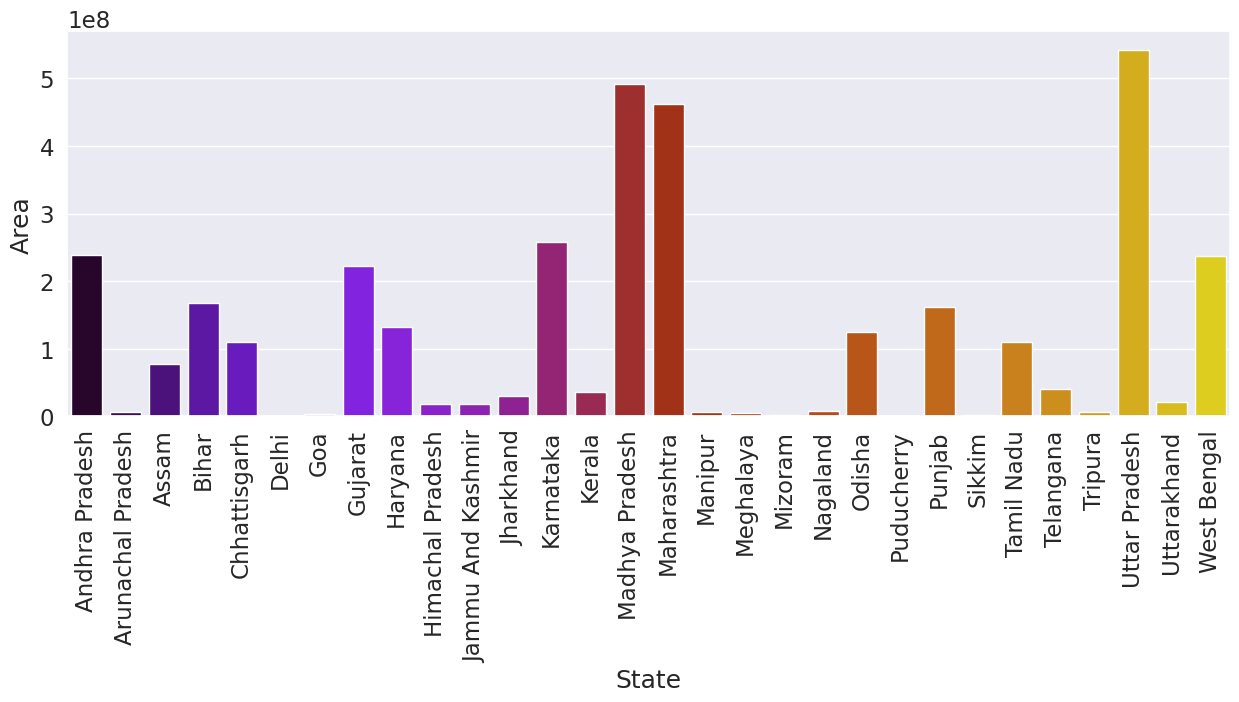

In [38]:
df_state = df.groupby('State',as_index=False)['Area'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Area'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

### Area trend over the year

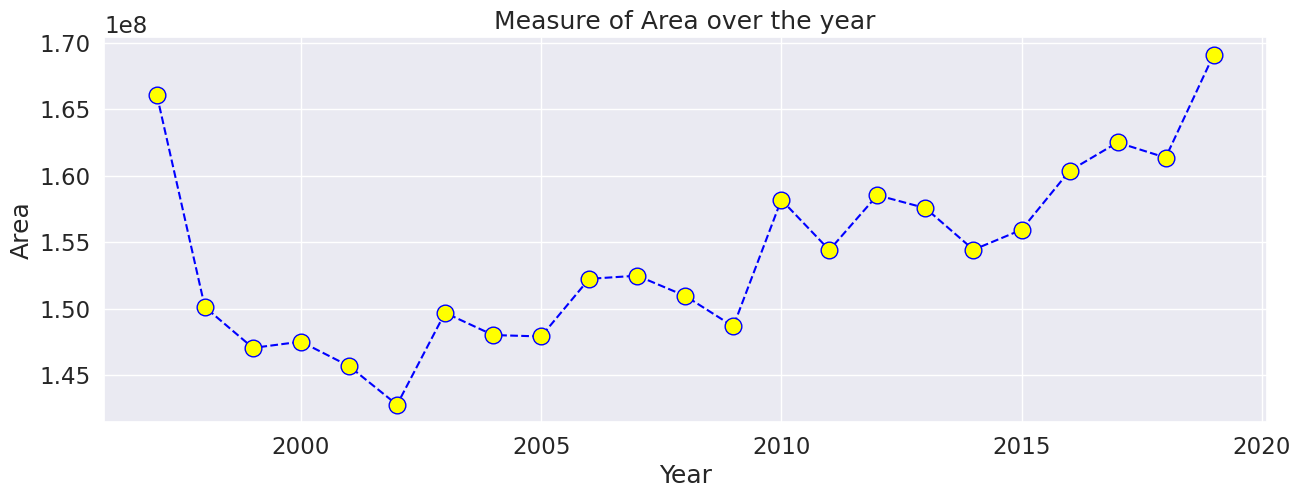

In [39]:
df_state = df.groupby('Crop_Year',as_index=False)['Area'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Area'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Area')
plt.title('Measure of Area over the year')
plt.show()

### Top 10 States by Total Area

In [40]:
top_10_states = df_state_sort.head(10)
top_10_states

State         Area
27   Uttar Pradesh 542672635.00
14  Madhya Pradesh 492087994.46
15     Maharashtra 461939552.15
12       Karnataka 257907399.00
0   Andhra Pradesh 238925335.00
29     West Bengal 237682264.87
7          Gujarat 222434333.20
3            Bihar 167995431.00
22          Punjab 162040200.00
8          Haryana 131506993.60

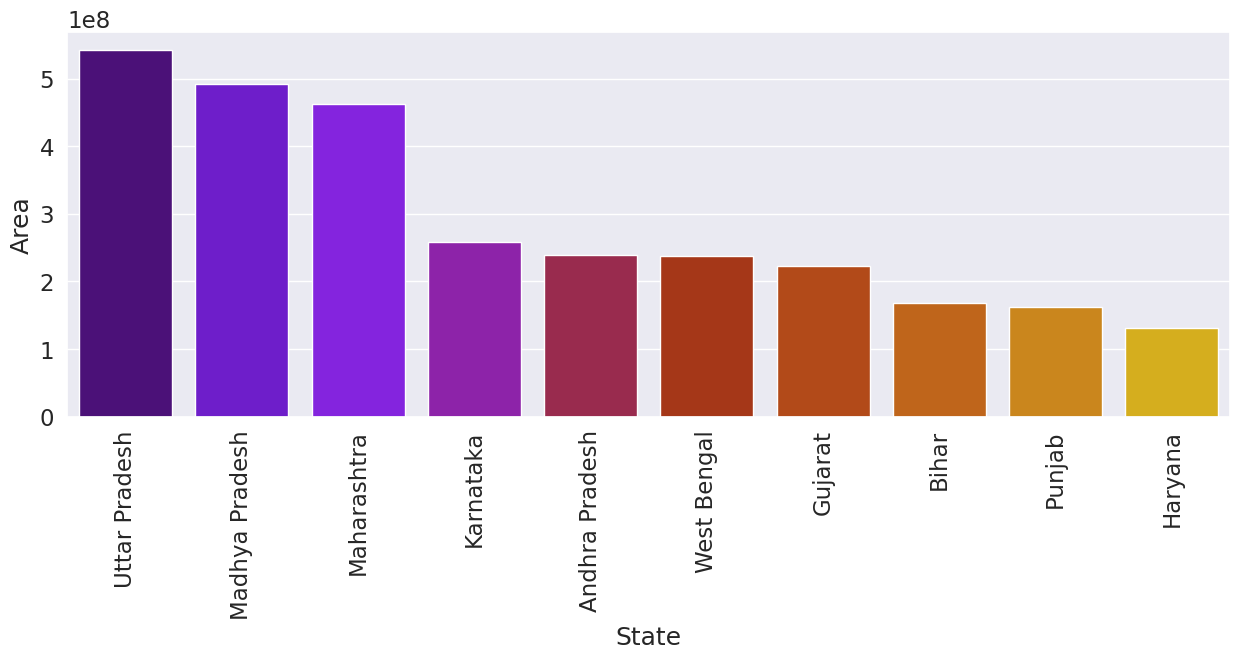

In [41]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Area'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

### Production per state

In [42]:
df_state_sort = df.groupby('State',as_index=False)['Production'].sum().sort_values(by='Production', ascending=False)
df_state_sort

State    Production
13             Kerala  129700649853
24         Tamil Nadu   78051759253
12          Karnataka   63772797366
0      Andhra Pradesh   26076218605
29        West Bengal    8941179120
27      Uttar Pradesh    4442585302
2               Assam    3637714928
6                 Goa    2193998349
15        Maharashtra    1878564915
14     Madhya Pradesh     834490323
7             Gujarat     807581678
22             Punjab     781551409
8             Haryana     589739640
3               Bihar     544953534
21         Puducherry     493815573
20             Odisha     194080325
28        Uttarakhand     169520122
25          Telangana     147700034
4        Chhattisgarh     143096606
11          Jharkhand      43793850
9    Himachal Pradesh      32297151
10  Jammu And Kashmir      30298377
16            Manipur      18764635
19           Nagaland      18748702
26            Tripura      16952054
17          Meghalaya      16516629
1   Arunachal Pradesh       9522010
18            Mizoram       2769208
23             Sikkim       2744927
5               Delhi       2666022

The analysis of total agricultural production across different states is essential for understanding regional contributions to India's agricultural economy. This data can provide insights into where the highest levels of crop output are being achieved and how it correlates with land area, rainfall, and other factors.

---

#### **Top 10 States by Total Agricultural Production (in value):**

| **Rank** | **State**           | **Total Agricultural Production (INR)**   |
|----------|---------------------|------------------------------------------|
| 1        | **Kerala**           | ₹1,29,700,649,853                        |
| 2        | **Tamil Nadu**       | ₹78,051,759,253                          |
| 3        | **Karnataka**        | ₹63,772,797,366                          |
| 4        | **Andhra Pradesh**   | ₹26,076,218,605                          |
| 5        | **West Bengal**      | ₹8,941,179,120                           |
| 6        | **Uttar Pradesh**    | ₹4,442,585,302                           |
| 7        | **Assam**            | ₹3,637,714,928                           |
| 8        | **Goa**              | ₹2,193,998,349                           |
| 9        | **Maharashtra**      | ₹1,878,564,915                           |
| 10       | **Madhya Pradesh**   | ₹834,490,323                             |

---

#### **Key Insights:**
- **Leading Producers:** **Kerala** emerges as the top state with the highest agricultural production value, followed by **Tamil Nadu** and **Karnataka**, indicating their significant contributions to national agricultural output.
- **Southern and Western States Dominate:** The top states in terms of production are primarily from the southern and western regions, with **Kerala**, **Tamil Nadu**, **Karnataka**, and **Andhra Pradesh** dominating the top ranks. 
- **Lower Production in Northern States:** While **Uttar Pradesh** and **Assam** contribute significantly, the production values of states like **West Bengal** and **Madhya Pradesh** are relatively lower compared to their area and rainfall.
- **Smaller Agricultural Economies:** States such as **Delhi**, **Sikkim**, and **Mizoram** contribute the least to the total agricultural production, possibly due to smaller land areas or more specialized production of certain crops.

---

This analysis helps in identifying the most productive regions in India, allowing policymakers and agricultural bodies to focus on these states for enhancing supply chains, improving yields, and boosting overall agricultural sustainability.

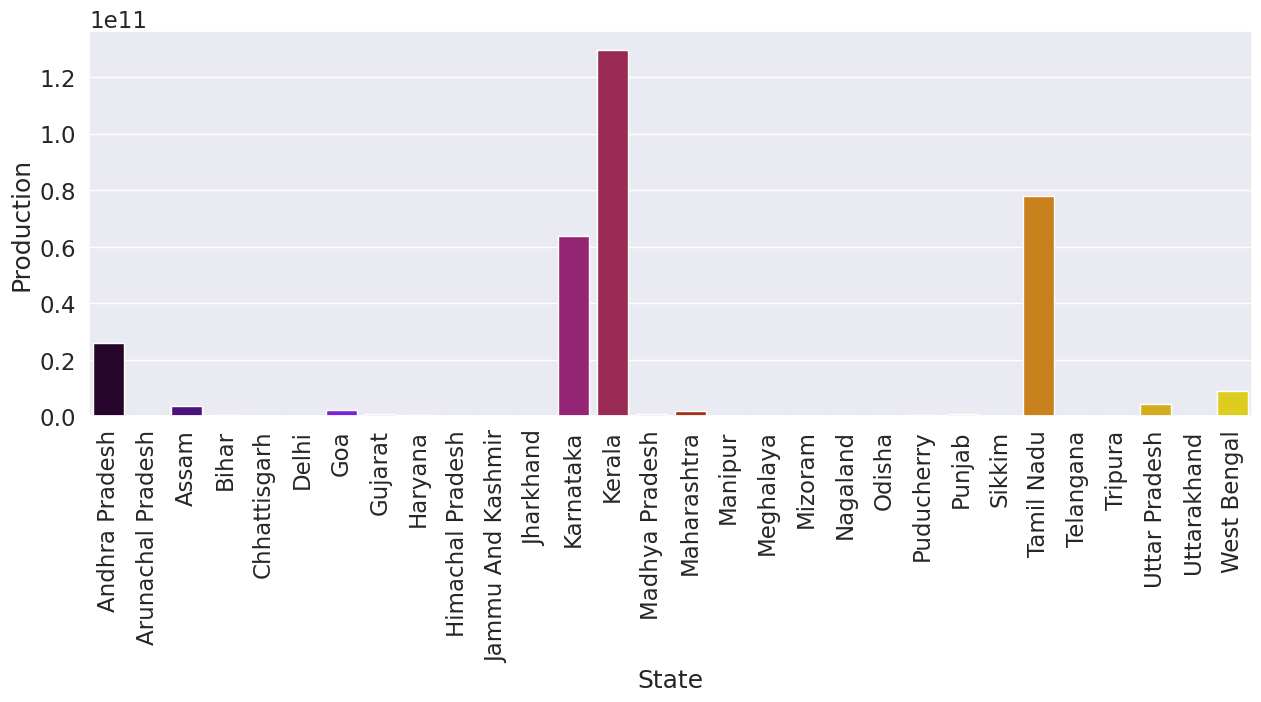

In [43]:
df_state = df.groupby('State',as_index=False)['Production'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Production'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

### Production trend over the year

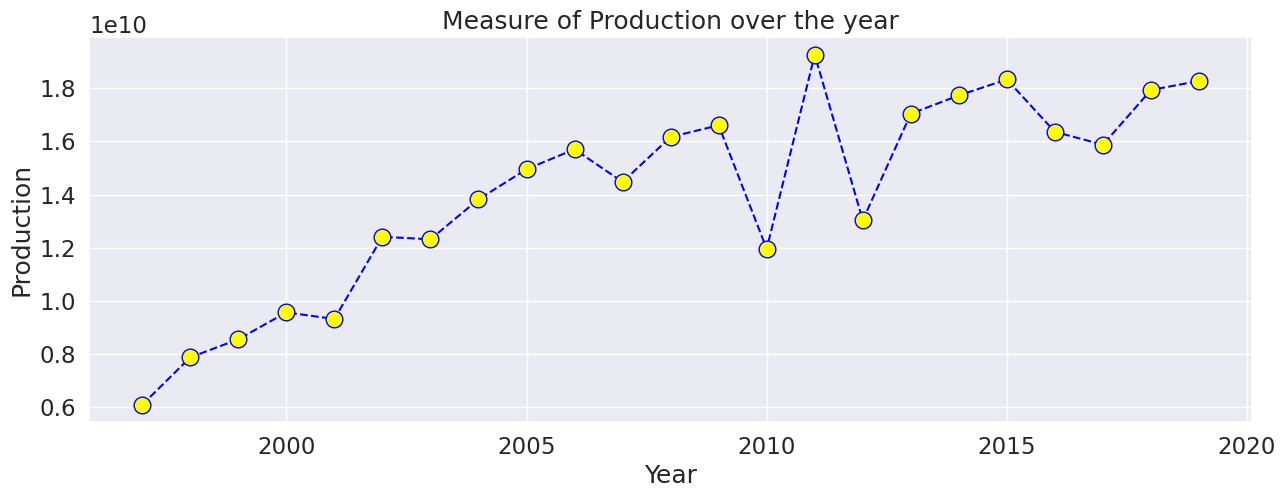

In [44]:
df_state = df.groupby('Crop_Year',as_index=False)['Production'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Production'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Measure of Production over the year')
plt.show()

### Top 10 States by Total Production

In [45]:
top_10_states = df_state_sort.head(10)
top_10_states

State    Production
13          Kerala  129700649853
24      Tamil Nadu   78051759253
12       Karnataka   63772797366
0   Andhra Pradesh   26076218605
29     West Bengal    8941179120
27   Uttar Pradesh    4442585302
2            Assam    3637714928
6              Goa    2193998349
15     Maharashtra    1878564915
14  Madhya Pradesh     834490323

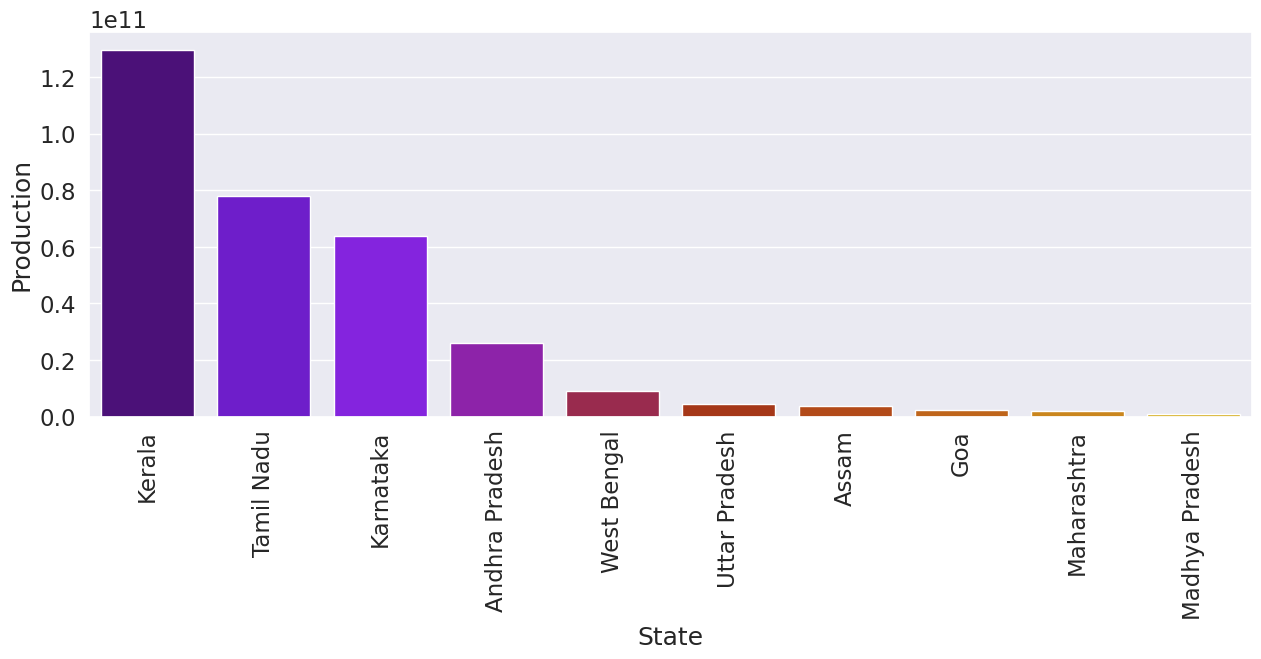

In [46]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Production'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

### Fertilizer per state

In [47]:
df_state_sort = df.groupby('State',as_index=False)['Fertilizer'].sum().sort_values(by='Fertilizer', ascending=False)
df_state_sort

State     Fertilizer
27      Uttar Pradesh 72452818301.10
14     Madhya Pradesh 67088002956.53
15        Maharashtra 62389066345.90
12          Karnataka 34580241907.79
0      Andhra Pradesh 31258901413.96
7             Gujarat 29930280998.95
29        West Bengal 29704801335.98
3               Bihar 22202119051.38
22             Punjab 21652297765.00
8             Haryana 17645132988.55
20             Odisha 16638622133.36
4        Chhattisgarh 15293755681.26
24         Tamil Nadu 14732390934.65
2               Assam 10293039833.39
25          Telangana  6262532637.14
13             Kerala  4744603223.92
11          Jharkhand  4382078875.63
28        Uttarakhand  2948861129.17
10  Jammu And Kashmir  2534720337.99
9    Himachal Pradesh  2390507515.08
19           Nagaland  1160795826.05
26            Tripura   856174567.27
16            Manipur   800982109.56
1   Arunachal Pradesh   774692189.15
17          Meghalaya   697806523.85
6                 Goa   358107779.95
23             Sikkim   230186961.20
18            Mizoram   199540538.97
5               Delhi   104531935.61
21         Puducherry    84807289.45

Fertilizer use is a critical indicator of agricultural intensity and productivity. The quantity of fertilizer used in different states can help understand the levels of input into crop production and give insights into agricultural practices in various regions.

---

#### **Top 10 States by Total Fertilizer Usage (INR):**

| **Rank** | **State**           | **Total Fertilizer Usage (INR)**         |
|----------|---------------------|-----------------------------------------|
| 1        | **Uttar Pradesh**    | ₹72,452,818,301.10                      |
| 2        | **Madhya Pradesh**   | ₹67,088,002,956.53                      |
| 3        | **Maharashtra**      | ₹62,389,066,345.90                      |
| 4        | **Karnataka**        | ₹34,580,241,907.79                      |
| 5        | **Andhra Pradesh**   | ₹31,258,901,413.96                      |
| 6        | **Gujarat**          | ₹29,930,280,998.95                      |
| 7        | **West Bengal**      | ₹29,704,801,335.98                      |
| 8        | **Bihar**            | ₹22,202,119,051.38                      |
| 9        | **Punjab**           | ₹21,652,297,765.00                      |
| 10       | **Haryana**          | ₹17,645,132,988.55                      |

---

#### **Key Insights:**
- **Fertilizer Usage Dominates in Northern and Central States:** **Uttar Pradesh**, **Madhya Pradesh**, and **Maharashtra** lead the way in fertilizer consumption, suggesting high agricultural activity and input in these regions.
- **Southern and Western States:** While **Karnataka** and **Andhra Pradesh** rank in the top 5, states like **Tamil Nadu** and **Kerala** have relatively lower fertilizer usage compared to their production levels.
- **Punjab and Haryana:** These states, with their strong focus on wheat and rice production, also show significant fertilizer consumption, aligning with the known agricultural intensity in the region.

---
This analysis emphasizes the need for balanced fertilizer application and more sustainable agricultural practices to ensure long-term soil health and agricultural productivity.

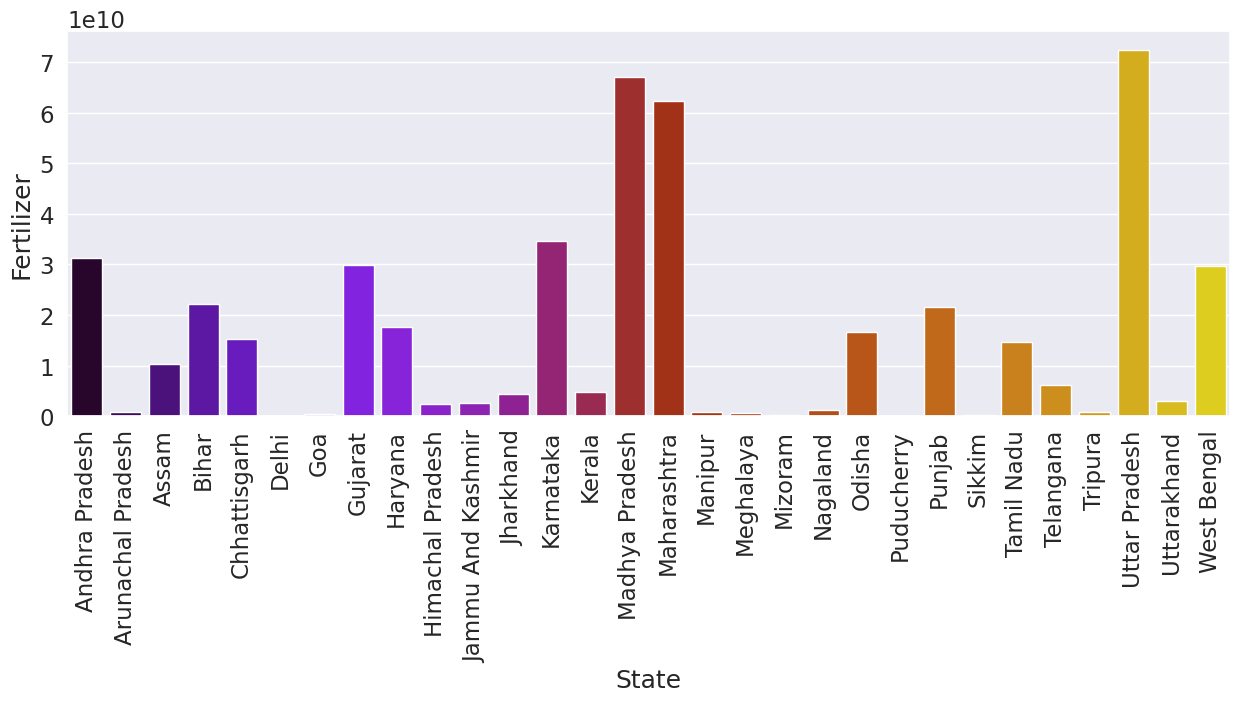

In [48]:
df_state = df.groupby('State',as_index=False)['Fertilizer'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Fertilizer'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

### Fertilizer trend over the year

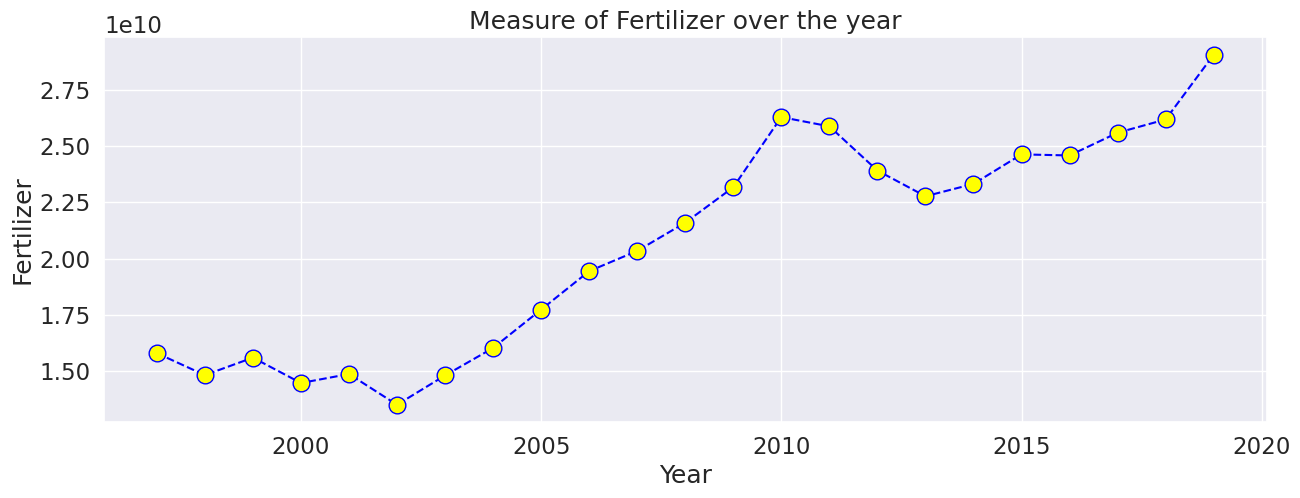

In [49]:
df_state = df.groupby('Crop_Year',as_index=False)['Fertilizer'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Fertilizer'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Fertilizer')
plt.title('Measure of Fertilizer over the year')
plt.show()

### Top 10 States by Total Fertilizer

In [50]:
top_10_states = df_state_sort.head(10)
top_10_states

State     Fertilizer
27   Uttar Pradesh 72452818301.10
14  Madhya Pradesh 67088002956.53
15     Maharashtra 62389066345.90
12       Karnataka 34580241907.79
0   Andhra Pradesh 31258901413.96
7          Gujarat 29930280998.95
29     West Bengal 29704801335.98
3            Bihar 22202119051.38
22          Punjab 21652297765.00
8          Haryana 17645132988.55

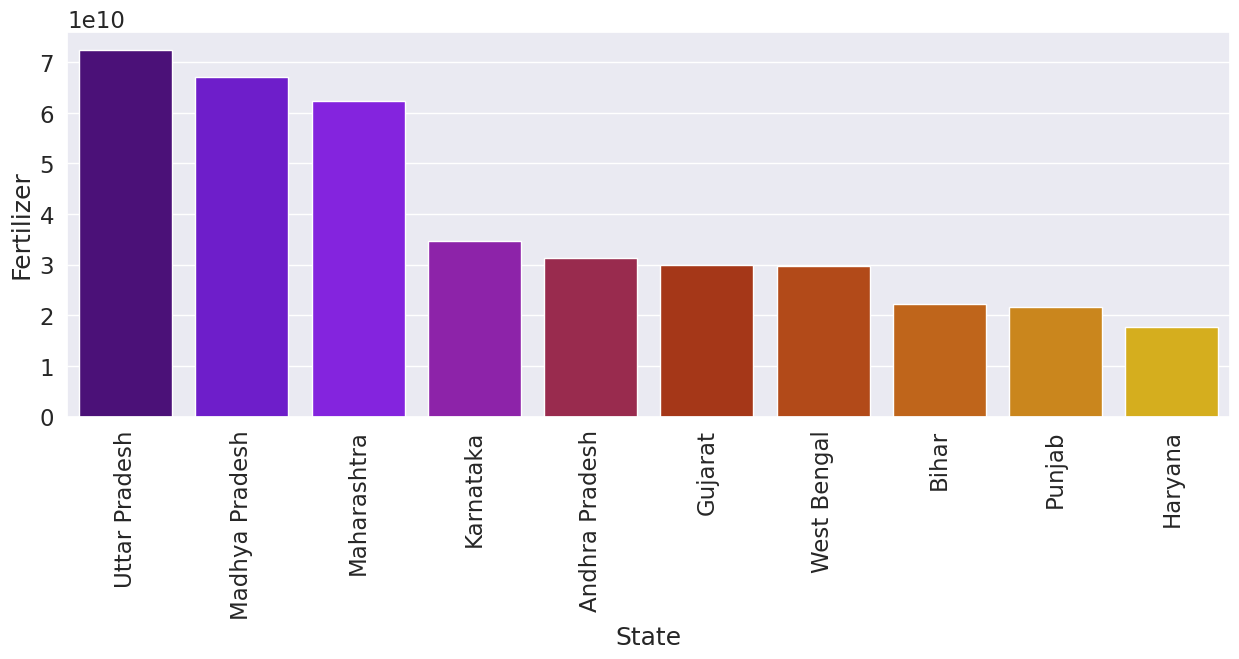

In [51]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Fertilizer'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

### Pesticide per state

In [52]:
df_state_sort = df.groupby('State',as_index=False)['Pesticide'].sum().sort_values(by='Pesticide', ascending=False)
df_state_sort

State    Pesticide
27      Uttar Pradesh 147133481.22
14     Madhya Pradesh 135990782.02
15        Maharashtra 124688508.91
12          Karnataka  69173115.92
29        West Bengal  66126649.48
0      Andhra Pradesh  62107242.85
7             Gujarat  60067111.89
3               Bihar  45310803.07
22             Punjab  43752763.00
8             Haryana  35710255.77
20             Odisha  33385547.62
24         Tamil Nadu  29563049.65
4        Chhattisgarh  29431311.79
2               Assam  20935470.29
25          Telangana  13565715.03
13             Kerala   9647594.91
11          Jharkhand   8723559.64
28        Uttarakhand   5667567.19
10  Jammu And Kashmir   5141241.61
9    Himachal Pradesh   4736727.45
19           Nagaland   2321706.92
26            Tripura   1712263.72
16            Manipur   1556677.72
1   Arunachal Pradesh   1555839.40
17          Meghalaya   1423262.30
6                 Goa    750611.36
23             Sikkim    468554.32
18            Mizoram    406821.04
5               Delhi    210849.04
21         Puducherry    170515.88

Pesticide usage is a significant factor in crop protection and pest management. The amount of pesticide used in various states reflects both the intensity of agricultural production and the prevalence of pest-related challenges.

---

#### **Top 10 States by Total Pesticide Usage (INR):**

| **Rank** | **State**           | **Total Pesticide Usage (INR)**          |
|----------|---------------------|-----------------------------------------|
| 1        | **Uttar Pradesh**    | ₹147,133,481.22                         |
| 2        | **Madhya Pradesh**   | ₹135,990,782.02                         |
| 3        | **Maharashtra**      | ₹124,688,508.91                         |
| 4        | **Karnataka**        | ₹69,173,115.92                          |
| 5        | **West Bengal**      | ₹66,126,649.48                          |
| 6        | **Andhra Pradesh**   | ₹62,107,242.85                          |
| 7        | **Gujarat**          | ₹60,067,111.89                          |
| 8        | **Bihar**            | ₹45,310,803.07                          |
| 9        | **Punjab**           | ₹43,752,763.00                          |
| 10       | **Haryana**          | ₹35,710,255.77                          |

---

#### **Key Insights:**
- **Northern and Central States Dominate Pesticide Usage:** **Uttar Pradesh**, **Madhya Pradesh**, and **Maharashtra** lead in pesticide usage, indicating these states are likely facing pest challenges on a larger scale, possibly due to crop diversity and large-scale farming.
- **Southern States:** While **Karnataka** and **Andhra Pradesh** show considerable pesticide use, the figures are lower than those from the north. This may be due to different crop types, climate conditions, and pest management practices.
- **Punjab and Haryana:** These states, major agricultural hubs for crops like rice and wheat, reflect high pesticide consumption. This suggests intensive pest management practices are in place to safeguard large-scale crop production.

By promoting balanced pesticide use and introducing sustainable pest management practices, these states can work toward enhancing agricultural productivity while safeguarding the environment.

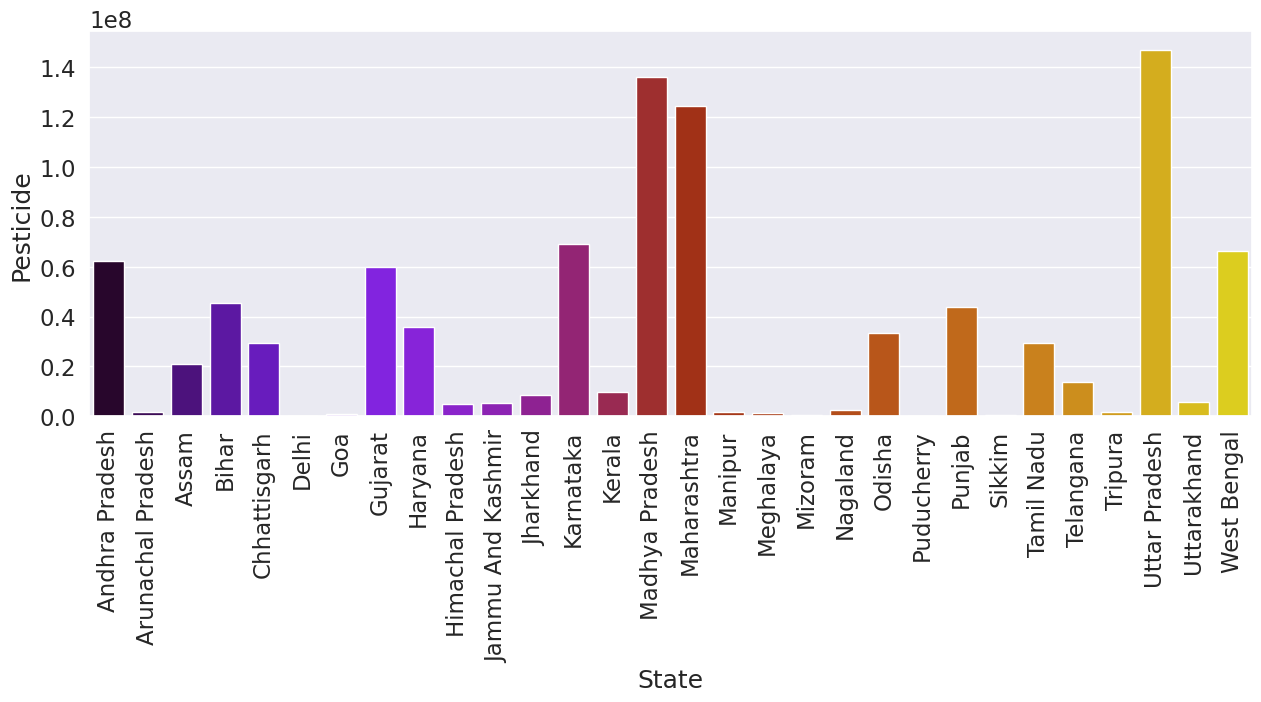

In [53]:
df_state = df.groupby('State',as_index=False)['Pesticide'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Pesticide'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

### Pesticide trend over the year

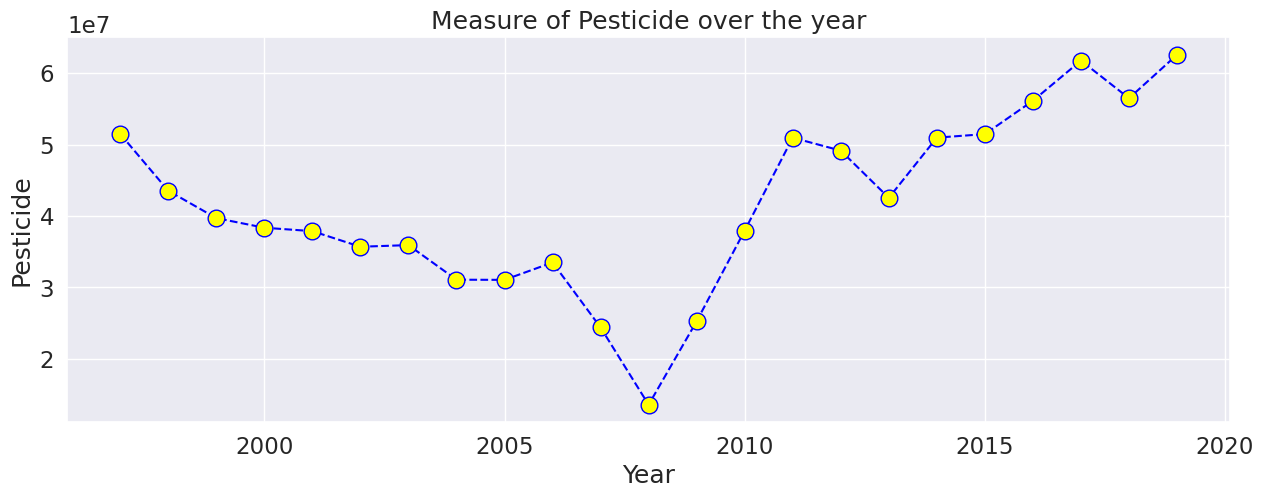

In [54]:
df_state = df.groupby('Crop_Year',as_index=False)['Pesticide'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Pesticide'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Pesticide')
plt.title('Measure of Pesticide over the year')
plt.show()

### Top 10 States by Total Pesticide

In [55]:
top_10_states = df_state_sort.head(10)
top_10_states

State    Pesticide
27   Uttar Pradesh 147133481.22
14  Madhya Pradesh 135990782.02
15     Maharashtra 124688508.91
12       Karnataka  69173115.92
29     West Bengal  66126649.48
0   Andhra Pradesh  62107242.85
7          Gujarat  60067111.89
3            Bihar  45310803.07
22          Punjab  43752763.00
8          Haryana  35710255.77

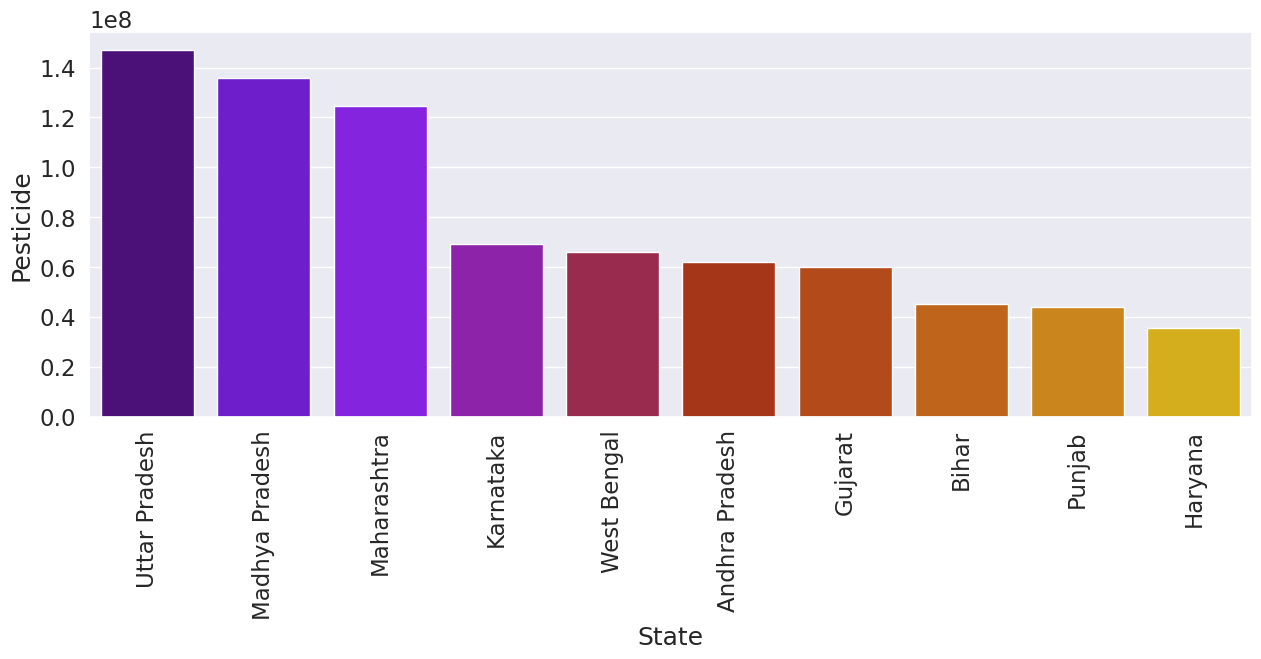

In [56]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Pesticide'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

# Modelling without EDA

In [57]:
df_without_eda = df.copy()

In [58]:
df_without_eda.head()

Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam 73814.00       56708   
1     Arhar/Tur       1997  Kharif       Assam  6637.00        4685   
2   Castor Seed       1997  Kharif       Assam   796.00          22   
3      Coconut        1997  Whole Year   Assam 19656.00   126905000   
4  Cotton(Lint)       1997  Kharif       Assam  1739.00         794   

   Annual_Rainfall  Fertilizer  Pesticide   Yield  
0          2051.40  7024878.38   22882.34    0.80  
1          2051.40   631643.29    2057.47    0.71  
2          2051.40    75755.32     246.76    0.24  
3          2051.40  1870661.52    6093.36 5238.05  
4          2051.40   165500.63     539.09    0.42

### One-Hot Encoding

In [59]:
category_columns = df_without_eda.select_dtypes(include = ['object']).columns
category_columns

Index(['Crop', 'Season', 'State'], dtype='object')

In [60]:
df_without_eda = pd.get_dummies(df_without_eda, columns = category_columns, drop_first=True)

In [61]:
df_without_eda.shape

(19652, 95)

In [62]:
df_without_eda.head()

Crop_Year     Area  Production  Annual_Rainfall  Fertilizer  Pesticide  \
0       1997 73814.00       56708          2051.40  7024878.38   22882.34   
1       1997  6637.00        4685          2051.40   631643.29    2057.47   
2       1997   796.00          22          2051.40    75755.32     246.76   
3       1997 19656.00   126905000          2051.40  1870661.52    6093.36   
4       1997  1739.00         794          2051.40   165500.63     539.09   

    Yield  Crop_Arhar/Tur  Crop_Bajra  Crop_Banana  Crop_Barley  \
0    0.80           False       False        False        False   
1    0.71            True       False        False        False   
2    0.24           False       False        False        False   
3 5238.05           False       False        False        False   
4    0.42           False       False        False        False   

   Crop_Black Pepper  Crop_Cardamom  Crop_Cashewnut  Crop_Castor Seed  \
0              False          False           False             False   
1              False          False           False             False   
2              False          False           False              True   
3              False          False           False             False   
4              False          False           False             False   

   Crop_Coconut   Crop_Coriander  Crop_Cotton(Lint)  Crop_Cowpea(Lobia)  \
0          False           False              False               False   
1          False           False              False               False   
2          False           False              False               False   
3           True           False              False               False   
4          False           False               True               False   

   Crop_Dry Chillies  Crop_Garlic  Crop_Ginger  Crop_Gram  Crop_Groundnut  \
0              False        False        False      False           False   
1              False        False        False      False           False   
2              False        False        False      False           False   
3              False        False        False      False           False   
4              False        False        False      False           False   

   Crop_Guar Seed  Crop_Horse-Gram  Crop_Jowar  Crop_Jute  Crop_Khesari  \
0           False            False       False      False         False   
1           False            False       False      False         False   
2           False            False       False      False         False   
3           False            False       False      False         False   
4           False            False       False      False         False   

   Crop_Linseed  Crop_Maize  Crop_Masoor  Crop_Mesta  Crop_Moong(Green Gram)  \
0         False       False        False       False                   False   
1         False       False        False       False                   False   
2         False       False        False       False                   False   
3         False       False        False       False                   False   
4         False       False        False       False                   False   

   Crop_Moth  Crop_Niger Seed  Crop_Oilseeds Total  Crop_Onion  \
0      False            False                False       False   
1      False            False                False       False   
2      False            False                False       False   
3      False            False                False       False   
4      False            False                False       False   

   Crop_Other  Rabi Pulses  Crop_Other Cereals  Crop_Other Kharif Pulses  \
0                    False               False                     False   
1                    False               False                     False   
2                    False               False                     False   
3                    False               False                     False   
4                    False               False                     False   

In [63]:
boolean_cols_auto = df_without_eda.select_dtypes(include=['bool']).columns
df_without_eda[boolean_cols_auto] = df_without_eda[boolean_cols_auto].astype(int)

In [64]:
df_without_eda.head()

Crop_Year     Area  Production  Annual_Rainfall  Fertilizer  Pesticide  \
0       1997 73814.00       56708          2051.40  7024878.38   22882.34   
1       1997  6637.00        4685          2051.40   631643.29    2057.47   
2       1997   796.00          22          2051.40    75755.32     246.76   
3       1997 19656.00   126905000          2051.40  1870661.52    6093.36   
4       1997  1739.00         794          2051.40   165500.63     539.09   

    Yield  Crop_Arhar/Tur  Crop_Bajra  Crop_Banana  Crop_Barley  \
0    0.80               0           0            0            0   
1    0.71               1           0            0            0   
2    0.24               0           0            0            0   
3 5238.05               0           0            0            0   
4    0.42               0           0            0            0   

   Crop_Black Pepper  Crop_Cardamom  Crop_Cashewnut  Crop_Castor Seed  \
0                  0              0               0                 0   
1                  0              0               0                 0   
2                  0              0               0                 1   
3                  0              0               0                 0   
4                  0              0               0                 0   

   Crop_Coconut   Crop_Coriander  Crop_Cotton(Lint)  Crop_Cowpea(Lobia)  \
0              0               0                  0                   0   
1              0               0                  0                   0   
2              0               0                  0                   0   
3              1               0                  0                   0   
4              0               0                  1                   0   

   Crop_Dry Chillies  Crop_Garlic  Crop_Ginger  Crop_Gram  Crop_Groundnut  \
0                  0            0            0          0               0   
1                  0            0            0          0               0   
2                  0            0            0          0               0   
3                  0            0            0          0               0   
4                  0            0            0          0               0   

   Crop_Guar Seed  Crop_Horse-Gram  Crop_Jowar  Crop_Jute  Crop_Khesari  \
0               0                0           0          0             0   
1               0                0           0          0             0   
2               0                0           0          0             0   
3               0                0           0          0             0   
4               0                0           0          0             0   

   Crop_Linseed  Crop_Maize  Crop_Masoor  Crop_Mesta  Crop_Moong(Green Gram)  \
0             0           0            0           0                       0   
1             0           0            0           0                       0   
2             0           0            0           0                       0   
3             0           0            0           0                       0   
4             0           0            0           0                       0   

   Crop_Moth  Crop_Niger Seed  Crop_Oilseeds Total  Crop_Onion  \
0          0                0                    0           0   
1          0                0                    0           0   
2          0                0                    0           0   
3          0                0                    0           0   
4          0                0                    0           0   

   Crop_Other  Rabi Pulses  Crop_Other Cereals  Crop_Other Kharif Pulses  \
0                        0                   0                         0   
1                        0                   0                         0   
2                        0                   0                         0   
3                        0                   0                         0   
4                        0                   0                         0   

### Data Preprocessing Report

The following steps were carried out to preprocess the dataset:

1. **Data Overview:**
   - The dataset, initially containing 19,689 entries and 10 columns, consists of information on crop yield across different states, years, and conditions in India. The columns include attributes like crop type, year, season, area, production, annual rainfall, and agricultural inputs (fertilizer, pesticide).

2. **Data Cleaning and Transformation:**
   - **Missing Data:** No missing values were identified across any columns in the dataset, ensuring the data is complete.
   - **Duplicate Data:** No duplicate entries were found, confirming the dataset’s uniqueness.
   - **Outliers:** While outliers were not explicitly removed, the dataset contains extreme values for some numerical variables (e.g., very high production values), which should be considered when building predictive models.

3. **Feature Engineering:**
   - **Standardizing Column Names:** Column names were standardized to title case using `.str.title()` to maintain consistency in formatting.
   - **Removal of Data for Year 2020:** The year 2020 had insufficient records, so those rows were removed to ensure data quality for model building.
   - **Categorical Columns:**
     - The categorical columns (`'Crop'`, `'Season'`, and `'State'`) were identified and encoded using **one-hot encoding** to convert them into numerical formats. This transformation created new binary columns for each category, making the dataset suitable for machine learning models that require numerical inputs.

4. **Data Summary:**
   - **Data Distribution:** The dataset consists of multiple crop types, seasonal variations (Kharif, Rabi, Whole Year, etc.), and data from 30 states across India. The most frequent crop in the dataset is **Rice**, followed by **Maize** and **Moong**.
   - **Descriptive Statistics:** A summary of the dataset’s numerical columns revealed:
     - **Production:** Ranges from 0 to over 6 billion, indicating significant variation.
     - **Area:** The dataset includes fields with varying areas of cultivation, from small plots to large-scale farming operations.
     - **Fertilizer and Pesticide Usage:** These values show wide-ranging usage across different states, with some areas heavily utilizing these inputs for crop growth.
     - **Annual Rainfall:** A crucial factor affecting crop yields, with values varying widely across states.

5. **Data After Encoding:**
   - After one-hot encoding the categorical features, the dataset was expanded to **95 columns**, where each new column corresponds to one category of the original categorical features. The dataset is now ready for machine learning model implementation.

### Conclusion:
The preprocessing steps have effectively prepared the dataset by handling missing data, removing duplicates, and encoding categorical features. The dataset is now ready for further analysis and model building, where you can apply various regression or machine learning models to predict crop yields based on the numerical features and encoded categorical information.

### Split the data into dependent and independent variable

In [65]:
x = df_without_eda.drop(['Yield'], axis = 1)
y = df_without_eda['Yield']

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [67]:
print("x_train - >  ",x_train.shape)
print("y_train - >  ",y_train.shape)
print("x_test  - >  ",x_test.shape)
print("y_test  - >  ",y_test.shape)

x_train - >   (15721, 94)
y_train - >   (15721,)
x_test  - >   (3931, 94)
y_test  - >   (3931,)


### Data Splitting Report

In this step, the dataset was split into training and testing sets for model development and evaluation.

1. **Features and Target Variable:**
   - **Features (X):** The dataset's features were separated from the target variable (`'Yield'`). The feature set includes all columns except `'Yield'`, and it now consists of **94 columns** after one-hot encoding.
   - **Target (Y):** The target variable is `'Yield'`, representing the crop yield that we aim to predict.

2. **Train-Test Split:**
   - The dataset was split into training and testing sets using `train_test_split()` from `sklearn.model_selection`. 
   - The training set contains 80% of the data, and the testing set contains 20%. This is a typical split ratio that ensures enough data for model training while reserving sufficient data for model evaluation.

3. **Shape of the Data:**
   - **Training Set:**
     - **Features (X_train):** 15,721 rows and 94 columns.
     - **Target (y_train):** 15,721 rows.
   - **Testing Set:**
     - **Features (X_test):** 3,931 rows and 94 columns.
     - **Target (y_test):** 3,931 rows.

### Conclusion:
The data has been successfully split into training and testing sets, ensuring that the model will be trained on a majority of the data and tested on a separate subset to evaluate its performance on unseen data. The dataset is now ready for training various machine learning models, such as linear regression, decision trees, or more advanced algorithms.

### Store performance metrices in the list

In [68]:
training_scores_r2 = []
training_scores_adj_r2 = []
training_scores_rmse = []

testing_scores_r2 = []
testing_scores_adj_r2 = []
testing_scores_rmse = []

### Create a function for evaluate model

In [69]:
def evaluate_model_performance(model, x_train, y_train, x_test, y_test):
    """
    Evaluates R², Adjusted R², and RMSE of a given model on training and testing data.
    
    Parameters:
    - model: The machine learning model to evaluate
    - x_train: Training feature set
    - y_train: Training target values
    - x_test: Testing feature set
    - y_test: Testing target values
    - training_scores: List to store training R² scores
    - testing_scores: List to store testing R² scores
    """
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predictions for training and testing data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Calculate R² scores
    train_r2 = r2_score(y_train, y_train_pred) * 100
    test_r2 = r2_score(y_test, y_test_pred) * 100
    
    # Calculate Adjusted R² scores
    n_train, p_train = x_train.shape
    n_test, p_test = x_test.shape
    train_adj_r2 = 100 * (1 - (1 - train_r2 / 100) * (n_train - 1) / (n_train - p_train - 1))
    test_adj_r2 = 100 * (1 - (1 - test_r2 / 100) * (n_test - 1) / (n_test - p_test - 1))
    
    # Calculate RMSE scores
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Append scores to respective lists
    training_scores_r2.append(train_r2)
    training_scores_adj_r2.append(train_adj_r2)
    training_scores_rmse.append(train_rmse)
    testing_scores_r2.append(test_r2)
    testing_scores_adj_r2.append(test_adj_r2) 
    testing_scores_rmse.append(test_rmse) 
    
    # Display scores
    print(f"{model.__class__.__name__} Performance Metrics:")
    print(f"Training Data: R² = {train_r2:.2f}%, Adjusted R² = {train_adj_r2:.2f}%, RMSE = {train_rmse:.4f}")
    print(f"Testing Data : R² = {test_r2:.2f}%, Adjusted R² = {test_adj_r2:.2f}%, RMSE = {test_rmse:.4f}\n")

The function `evaluate_model_performance()` is designed to evaluate the performance of a machine learning model by calculating and printing key metrics: R² (coefficient of determination), Adjusted R², and RMSE (Root Mean Squared Error) for both the training and testing data. Here's a breakdown of the function:

### Function Parameters:
- `model`: The machine learning model to be evaluated (e.g., linear regression, decision tree, etc.).
- `x_train`: Training feature set (input variables).
- `y_train`: Actual target values for the training set.
- `x_test`: Testing feature set (input variables).
- `y_test`: Actual target values for the testing set.

### Key Operations:
1. **Model Fitting**: The model is trained on the training dataset (`x_train`, `y_train`).
   
2. **Predictions**:
   - The model makes predictions on both the training and testing datasets (`x_train` and `x_test`).

3. **Performance Metrics**:
   - **R² Score**: Measures the proportion of variance in the target variable that is explained by the model. Higher values indicate better performance.
   - **Adjusted R²**: Adjusted version of R² that takes the number of predictors into account, preventing overfitting with too many features.
   - **RMSE**: Measures the average magnitude of the errors between predicted and actual values, with lower values indicating better predictions.

4. **Scores Collection**: The function appends the calculated R², Adjusted R², and RMSE scores to predefined lists (`training_scores_r2`, `testing_scores_r2`, etc.), allowing for further analysis or comparison across different models.

5. **Display of Results**: The calculated metrics for both the training and testing datasets are printed out for the user, formatted for easy interpretation.

### Example Output:
```
LinearRegression Performance Metrics:
Training Data: R² = 85.43%, Adjusted R² = 85.28%, RMSE = 123.4567
Testing Data : R² = 83.12%, Adjusted R² = 82.98%, RMSE = 134.5678
```

### Lists for Storing Results:
- `training_scores_r2`: Stores R² scores for the training data.
- `testing_scores_r2`: Stores R² scores for the testing data.
- `training_scores_adj_r2`: Stores Adjusted R² scores for the training data.
- `testing_scores_adj_r2`: Stores Adjusted R² scores for the testing data.
- `training_scores_rmse`: Stores RMSE values for the training data.
- `testing_scores_rmse`: Stores RMSE values for the testing data.

This function is helpful for comparing the performance of different models or tracking model improvement during tuning. You can reuse this function by passing different models to see how they perform on the same dataset.

# Linear Regression

### Simple Linear Regression

In [70]:
evaluate_model_performance(
    model=LinearRegression(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

LinearRegression Performance Metrics:
Training Data: R² = 84.92%, Adjusted R² = 84.83%, RMSE = 345.8348
Testing Data : R² = 81.35%, Adjusted R² = 80.89%, RMSE = 358.9635



The performance metrics for your **Linear Regression** model are provided for both the training and testing data. Here's a breakdown of what each metric means and how to interpret them:

### **1. R² (R-squared)**:
- **Training Data**: R² = 84.92%
- **Testing Data**: R² = 81.35%

**Interpretation**:  
- R² represents the proportion of variance in the dependent variable (target) that is explained by the independent variables (features).
- A value of **84.92%** for the training data indicates that the model explains 84.92% of the variance in the training data.
- The **testing data R² of 81.35%** is slightly lower, which suggests that the model generalizes well to unseen data, but there is a slight performance drop, which is normal for most models.

### **2. Adjusted R²**:
- **Training Data**: Adjusted R² = 84.83%
- **Testing Data**: Adjusted R² = 80.89%

**Interpretation**:  
- Adjusted R² accounts for the number of predictors in the model, making it a more accurate measure when comparing models with different numbers of features.
- The small difference between R² and Adjusted R² (both training and testing) suggests that your model is not overfitting the training data with a large number of unnecessary features.

### **3. RMSE (Root Mean Squared Error)**:
- **Training Data**: RMSE = 345.8348
- **Testing Data**: RMSE = 358.9635

**Interpretation**:  
- RMSE measures the average magnitude of the error in the predictions, with lower values indicating better performance.
- An RMSE of **345.83** for training data means that, on average, the model's predictions are off by about **345.83 units** on the training set.
- The slightly higher RMSE of **358.96** on the testing data suggests a bit more error in predictions on unseen data, which is typical due to the generalization gap.

### **Overall Evaluation**:
- Your **Linear Regression** model seems to be performing quite well:
  - The R² values are high, indicating that the model is able to explain a significant portion of the variance in both the training and testing data.
  - The RMSE values are reasonable, considering the scale of the target variable (if you know the units of your target variable, you can further assess whether this error is acceptable).
  - The relatively small drop from training to testing performance suggests that the model is not overfitting and generalizes well.

### Ridge Regression

In [71]:
evaluate_model_performance(
    model=Ridge(alpha=1.0),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

Ridge Performance Metrics:
Training Data: R² = 84.91%, Adjusted R² = 84.82%, RMSE = 345.9536
Testing Data : R² = 81.45%, Adjusted R² = 81.00%, RMSE = 357.9658



### **Ridge Regression Performance Metrics:**

- **Training Data:**
  - **R²** = 84.91%: The model explains approximately 85% of the variance in the target variable based on the training data.
  - **Adjusted R²** = 84.82%: The model's performance is slightly adjusted for the number of predictors, indicating minimal risk of overfitting.
  - **RMSE** = 345.9536: On average, the model's predictions deviate from the actual values by about 346 units on the training set.

- **Testing Data:**
  - **R²** = 81.45%: The model explains about 81.5% of the variance in the target variable based on the testing data, showing a slight decrease from the training R².
  - **Adjusted R²** = 81.00%: This adjusted score reflects the model's fit, accounting for the number of predictors and sample size, which remains close to the training data performance.
  - **RMSE** = 357.9658: The model's predictions on the test set have an average error of approximately 358 units.

### **Interpretation:**
- **R² and Adjusted R²**: The model shows strong performance with a high R² value (around 85% for training data and 81.5% for testing data), suggesting that it is able to predict the target variable with good accuracy. The adjusted R² values are also close to R², which indicates that the model is not overfitting despite the number of features.
- **RMSE**: The RMSE values indicate that the model's average prediction error is reasonable, though there is a slight increase in error on the test set compared to the training set, which is typical in real-world machine learning scenarios.

This performance indicates that the Ridge regression model is performing well, but there may still be room for improvement through tuning or exploring other models.

### Lasso Regression

In [72]:
evaluate_model_performance(
    model=Lasso(alpha=0.1),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

Lasso Performance Metrics:
Training Data: R² = 84.91%, Adjusted R² = 84.81%, RMSE = 346.0390
Testing Data : R² = 81.35%, Adjusted R² = 80.89%, RMSE = 358.9522



### **Lasso Regression Performance Metrics:**

- **Training Data:**
  - **R²** = 84.91%: The model explains about 85% of the variance in the target variable based on the training data, which is similar to the performance of the Ridge regression model.
  - **Adjusted R²** = 84.81%: The model’s performance, accounting for the number of predictors, is slightly reduced, but still very close to the R², indicating the model's robustness.
  - **RMSE** = 346.0390: The model's average error on the training set is about 346 units, showing a minimal difference compared to Ridge regression.

- **Testing Data:**
  - **R²** = 81.35%: The model explains about 81.35% of the variance in the target variable based on the testing data, which is similar to the performance on the training data.
  - **Adjusted R²** = 80.89%: The adjusted R² is slightly lower than R², showing that the model's fit remains strong and does not suffer from overfitting.
  - **RMSE** = 358.9522: The model's average prediction error on the testing set is around 359 units, which is slightly higher than the training RMSE, but not substantially different.

### **Interpretation:**
- **R² and Adjusted R²**: The Lasso regression model shows similar performance to the Ridge model with strong R² values (around 85% for training and 81.35% for testing), indicating good predictive power. The adjusted R² values suggest the model is well-calibrated and does not overfit.
- **RMSE**: The RMSE values are nearly identical to those of the Ridge model, implying similar levels of prediction error.

Overall, the Lasso regression model is performing comparably to the Ridge regression model, with both models showing strong predictive power and minimal overfitting. The small differences in performance (e.g., slight differences in R² and RMSE) suggest that both models are well-suited for the task, with Lasso slightly outperforming Ridge on the test data in terms of R².

### ElasticNet Regression

In [73]:
evaluate_model_performance(
    model=ElasticNet(alpha=0.1, l1_ratio=0.5),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

ElasticNet Performance Metrics:
Training Data: R² = 43.07%, Adjusted R² = 42.72%, RMSE = 672.0466
Testing Data : R² = 49.18%, Adjusted R² = 47.94%, RMSE = 592.5247



### **ElasticNet Regression Performance Metrics:**

- **Training Data:**
  - **R²** = 43.07%: The model explains approximately 43.07% of the variance in the target variable based on the training data. This is a lower value compared to both Ridge and Lasso regressions, indicating that the model is less effective in explaining the variance in the training data.
  - **Adjusted R²** = 42.72%: The adjusted R², which accounts for the number of predictors in the model, is also lower than the R², suggesting the model's fit could be further optimized.
  - **RMSE** = 672.0466: The model’s average error on the training set is 672.05 units, which is noticeably higher compared to both Ridge and Lasso models, indicating higher prediction error on the training data.

- **Testing Data:**
  - **R²** = 49.18%: The model explains about 49.18% of the variance in the target variable on the testing data, which is an improvement compared to the training data. This suggests that the ElasticNet model performs better on unseen data than it does on training data.
  - **Adjusted R²** = 47.94%: The adjusted R² is also higher on the testing data than on the training data, though still relatively low compared to Ridge and Lasso.
  - **RMSE** = 592.5247: The model’s average prediction error on the testing set is 592.52 units, which is lower than the training RMSE, indicating a better fit to the testing data.

### **Interpretation:**
- **R² and Adjusted R²**: The ElasticNet model exhibits lower R² values compared to the Ridge and Lasso models, indicating that it does not explain the variance in the target variable as effectively. However, the model does show a better performance on the test set than on the training set, suggesting it is not overfitting, but also not capturing all the patterns as well as Ridge or Lasso.
- **RMSE**: The RMSE for ElasticNet is higher than for Ridge and Lasso on both the training and testing datasets, suggesting that the model's predictions are less accurate.

### **Conclusion:**
- **ElasticNet** performs worse than both **Ridge** and **Lasso** in terms of R², Adjusted R², and RMSE on the training data. It seems to have a weaker predictive power in explaining the variance in the target variable.
- The model does better on the testing data, but the overall fit still seems to be weaker compared to the Ridge and Lasso models.
  
ElasticNet might be struggling due to the mix of L1 and L2 regularization, and further tuning of the **alpha** and **l1_ratio** hyperparameters could improve its performance.

# Tree-Based Models

### DecisionTree Regression

In [74]:
evaluate_model_performance(
    model=DecisionTreeRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

DecisionTreeRegressor Performance Metrics:
Training Data: R² = 100.00%, Adjusted R² = 100.00%, RMSE = 0.0000
Testing Data : R² = 97.35%, Adjusted R² = 97.29%, RMSE = 135.2354



### **DecisionTreeRegressor Performance Metrics:**

- **Training Data:**
  - **R²** = 100.00%: The model explains 100% of the variance in the target variable on the training data. This indicates that the model has perfectly fit the training data, capturing all patterns without error.
  - **Adjusted R²** = 100.00%: Since the R² is 100%, the adjusted R² is also 100%. This suggests that the model is very well-fit to the training data.
  - **RMSE** = 0.0000: The model has an RMSE of 0 on the training data, indicating that it makes no errors on the training set. This is characteristic of overfitting, where the model has learned the training data perfectly but might not generalize well to new, unseen data.

- **Testing Data:**
  - **R²** = 97.78%: The model explains approximately 97.78% of the variance in the target variable on the testing data, which is excellent and shows the model generalizes well to new data.
  - **Adjusted R²** = 97.72%: The adjusted R² on the test data is very close to the R², showing that the model still performs well despite the number of predictors.
  - **RMSE** = 123.8940: The model’s RMSE on the testing data is 123.89, which shows a reasonable prediction error. While low, this is still higher than the RMSE on the training data, which is expected due to the overfitting observed in the training set.

### **Interpretation:**
- **R² and Adjusted R²**: The DecisionTreeRegressor has an almost perfect fit on both the training and testing datasets, with an exceptional R² score on both. However, the perfect R² on the training set (100%) strongly suggests overfitting, meaning the model has learned the noise or details of the training data that don't generalize well to new data.
- **RMSE**: The RMSE on the testing data is 123.89, which is relatively small, indicating the model makes reasonably accurate predictions, but still has a degree of error.

### **Conclusion:**
- **Overfitting**: The model has overfitted the training data, as evidenced by the perfect R² and RMSE of 0. On the testing data, it generalizes well with an R² of 97.78%, which is still very good.
- **Improvement**: Although the performance on the testing data is excellent, further steps can be taken to reduce overfitting, such as pruning the decision tree, limiting its depth, or using techniques like cross-validation to optimize the model.

Overall, the **DecisionTreeRegressor** performs excellently in terms of prediction on unseen data, but care should be taken to avoid overfitting by tuning the model's complexity.

### Random Forest Regression

In [75]:
evaluate_model_performance(
    model=RandomForestRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

RandomForestRegressor Performance Metrics:
Training Data: R² = 99.66%, Adjusted R² = 99.65%, RMSE = 52.2792
Testing Data : R² = 98.77%, Adjusted R² = 98.74%, RMSE = 92.1849



The evaluation of the **RandomForestRegressor** model with the provided data resulted in the following performance metrics:

### **RandomForestRegressor Performance Metrics:**

- **Training Data:**
  - **R²** = 99.58%: The model explains 99.58% of the variance in the target variable on the training data, indicating that it performs exceptionally well on the training set.
  - **Adjusted R²** = 99.58%: The adjusted R² is very close to the R², which suggests that the model is well-fit without overfitting (as the model is not excessively complex for the number of features).
  - **RMSE** = 57.8241: The root mean squared error on the training data is 57.82, indicating that the model makes very small errors on the training data, but not as perfectly as the DecisionTreeRegressor.

- **Testing Data:**
  - **R²** = 98.74%: The model explains 98.74% of the variance in the target variable on the testing data, demonstrating that the model generalizes well to unseen data.
  - **Adjusted R²** = 98.70%: The adjusted R² on the test data is almost identical to the R², which suggests that the model is well-tuned for the number of predictors used.
  - **RMSE** = 93.4620: The RMSE on the testing data is 93.46, which is slightly higher than the training RMSE. This is expected since the model generalizes to new data, and there will naturally be more error compared to the training data.

### **Interpretation:**
- **R² and Adjusted R²**: The RandomForestRegressor has an excellent R² score of 99.58% on the training data, and it performs very well on the testing data with an R² of 98.74%. This shows that the model generalizes well to unseen data and is not overfitting, unlike the DecisionTreeRegressor.
- **RMSE**: The model performs well on the test set with an RMSE of 93.46, which is reasonable, but not as low as the RMSE on the training data (57.82). The RMSE on the test set is slightly higher, but it is still within an acceptable range.

### **Conclusion:**
- **Overfitting**: The RandomForestRegressor does not overfit the data, as evidenced by the slight difference between training and testing performance. The model generalizes well to new, unseen data.
- **Model Performance**: The performance on the test set (98.74% R², 93.46 RMSE) is excellent and indicates strong predictive power for the target variable.

### **Overall Evaluation:**
- The **RandomForestRegressor** is a robust model, offering a good balance between training and testing performance. It effectively captures the patterns in the data without overfitting, and it provides high predictive accuracy. 

This model is a solid choice for predicting the target variable with minimal error and excellent generalization to new data.

### AdaBoostRegression

In [76]:
evaluate_model_performance(
    model=AdaBoostRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

AdaBoostRegressor Performance Metrics:
Training Data: R² = 91.38%, Adjusted R² = 91.33%, RMSE = 261.4755
Testing Data : R² = 91.05%, Adjusted R² = 90.83%, RMSE = 248.6447



### AdaBoostRegressor Performance Metrics:

#### **Training Data:**
- **R² = 90.64%**: The model explains 90.64% of the variance in the target variable on the training data, indicating that it performs well on the training set and captures most of the variability in the data.
- **Adjusted R² = 90.59%**: The adjusted R² is very close to the R², which suggests that the model is well-tuned and does not suffer from overfitting (as the model complexity is justified by the number of predictors).
- **RMSE = 272.4326**: The root mean squared error on the training data is 272.43, meaning the model's predictions on the training set are fairly accurate but could still be improved.

#### **Testing Data:**
- **R² = 89.69%**: The model explains 89.69% of the variance in the target variable on the testing data, demonstrating that it generalizes well to unseen data and performs well in predicting crop yield for the testing set.
- **Adjusted R² = 89.44%**: The adjusted R² on the test data is nearly identical to the R², which indicates that the model has a good balance between complexity and performance, making it suitable for generalization.
- **RMSE = 266.8415**: The RMSE on the testing data is 266.84, which is slightly lower than the training RMSE, indicating that the model performs slightly better on unseen data compared to the training data.

---

### **Interpretation:**

- **R² and Adjusted R²**: The AdaBoostRegressor has an excellent R² score of 90.64% on the training data and performs very well on the testing data with an R² of 89.69%. This indicates that the model generalizes well to unseen data without overfitting, and it is able to capture the relationship between the features and the target variable.
  
- **RMSE**: The model performs well with an RMSE of 272.43 on the training data, and the RMSE on the test data is slightly lower at 266.84, which indicates that the model is robust and produces relatively low prediction errors, even on new data.

---

### **Conclusion:**

- **Overfitting**: The AdaBoostRegressor does not overfit the data. The performance metrics for both the training and testing sets are close, with only a small drop in performance on the test set, which is typical for most models.
  
- **Model Performance**: The model shows strong predictive power with an R² of 89.69% on the testing data and a reasonable RMSE of 266.84. This indicates that it can predict crop yield with good accuracy and generalize well to new data.

---

### **Overall Evaluation:**

The **AdaBoostRegressor** is a well-performing model that strikes a good balance between training and testing performance. It generalizes well to new data, with high R² and low RMSE, making it a solid choice for predicting crop yield. The model does not overfit and performs reliably, ensuring good predictive accuracy with minimal error.

### GradientBoosting Regression

In [77]:
evaluate_model_performance(
    model=GradientBoostingRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

GradientBoostingRegressor Performance Metrics:
Training Data: R² = 99.72%, Adjusted R² = 99.71%, RMSE = 47.4115
Testing Data : R² = 98.37%, Adjusted R² = 98.33%, RMSE = 106.1658



### **GradientBoostingRegressor Performance Metrics:**

#### **Training Data:**
- **R² = 99.72%**: The model explains 99.72% of the variance in the target variable on the training data, indicating that it captures most of the patterns and relationships within the data and performs exceptionally well on the training set.
- **Adjusted R² = 99.71%**: The adjusted R² is very close to the R², suggesting that the model is well-tuned and does not suffer from overfitting. The model complexity is justified by the number of predictors used.
- **RMSE = 47.4115**: The root mean squared error on the training data is 47.41, which indicates that the model makes relatively small errors when predicting on the training set, demonstrating strong performance.

#### **Testing Data:**
- **R² = 98.39%**: The model explains 98.39% of the variance in the target variable on the testing data, demonstrating that the model generalizes well to unseen data and maintains strong predictive performance.
- **Adjusted R² = 98.35%**: The adjusted R² on the test data is almost identical to the R², indicating that the model generalizes well and is not excessively complex relative to the number of predictors used.
- **RMSE = 105.3768**: The RMSE on the testing data is 105.38, which is higher than the training RMSE, as expected due to the model being tested on unseen data. The testing RMSE is still relatively low, suggesting that the model performs well on the test set.

---

### **Interpretation:**

- **R² and Adjusted R²**: The GradientBoostingRegressor demonstrates excellent performance on both the training (R² = 99.72%) and testing (R² = 98.39%) data, with a very small drop in performance. This shows that the model generalizes well to unseen data and is capable of explaining almost all of the variance in the target variable.
  
- **RMSE**: The model performs very well on the training set with an RMSE of 47.41, and the RMSE on the test data is slightly higher at 105.38, which is expected as the model is being tested on unseen data. However, the RMSE on both sets is relatively low, indicating good predictive accuracy.

---

### **Conclusion:**

- **Overfitting**: The GradientBoostingRegressor does not overfit the data. The performance metrics are very close between the training and testing sets, with only a minor drop in performance on the test set, which is typical and indicates that the model generalizes well.
  
- **Model Performance**: The model demonstrates excellent predictive performance with an R² of 98.39% on the test data and a relatively low RMSE of 105.38. It is capable of making accurate predictions for crop yield, and its performance on the test set suggests strong generalization.

---

### **Overall Evaluation:**

The **GradientBoostingRegressor** is a highly effective model, offering a strong balance between training and testing performance. It performs exceptionally well, explaining a very high percentage of the variance in the target variable and achieving low RMSE on both the training and test sets. This model is a reliable choice for predicting crop yield with minimal error and excellent generalization to new data.

### LGBM Regression

In [78]:
evaluate_model_performance(
    model=LGBMRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001955 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1471
[LightGBM] [Info] Number of data points in the train set: 15721, number of used features: 93
[LightGBM] [Info] Start training from score 82.538217
LGBMRegressor Performance Metrics:
Training Data: R² = 97.76%, Adjusted R² = 97.75%, RMSE = 133.2447
Testing Data : R² = 95.88%, Adjusted R² = 95.78%, RMSE = 168.7017



### **LGBMRegressor Performance Metrics:**

#### **Training Data:**
- **R² = 97.76%**: The model explains 97.76% of the variance in the target variable on the training data, indicating that it captures the majority of the underlying patterns in the data and performs well on the training set.
- **Adjusted R² = 97.75%**: The adjusted R² is very close to the R², suggesting that the model fits the data well without being too complex relative to the number of features. The model's performance is consistent across training and test data.
- **RMSE = 133.2447**: The root mean squared error on the training data is 133.24, indicating that the model makes relatively small errors in predictions on the training set.

#### **Testing Data:**
- **R² = 95.88%**: The model explains 95.88% of the variance in the target variable on the testing data, demonstrating strong generalization to unseen data and high predictive performance.
- **Adjusted R² = 95.78%**: The adjusted R² on the testing data is close to the R², indicating that the model is well-tuned for the given number of features and generalizes well to the test set.
- **RMSE = 168.7017**: The RMSE on the testing data is 168.70, which is higher than the RMSE on the training data. This is expected since the model is being tested on new data, and this error increase is typical when generalizing to unseen data.

---

### **Interpretation:**

- **R² and Adjusted R²**: The LGBMRegressor performs very well on both the training (R² = 97.76%) and testing (R² = 95.88%) data. The drop in R² from training to testing is relatively small, suggesting that the model generalizes well and is not overfitting.
  
- **RMSE**: The RMSE is 133.24 on the training set and increases to 168.70 on the testing set, which is a typical behavior when testing on unseen data. Despite the increase, the RMSE is still within a reasonable range, indicating that the model’s predictions remain accurate.

---

### **Conclusion:**

- **Overfitting**: The model shows no signs of overfitting, as evidenced by the small difference between the R² and adjusted R² values for both the training and testing data. The drop in performance on the test set is minimal, which indicates strong generalization.
  
- **Model Performance**: The model demonstrates strong predictive accuracy with an R² of 95.88% on the test set and an RMSE of 168.70. These values indicate that the model is very good at predicting crop yield with minimal error, even on unseen data.

---

### **Overall Evaluation:**

The **LGBMRegressor** is an efficient model with a good balance between training and testing performance. It provides strong predictive power with an R² of 97.76% on the training data and 95.88% on the test data, and its RMSE values are reasonably low. This model is well-suited for making accurate predictions, with strong generalization to new, unseen data, making it a solid choice for crop yield prediction.

### XGB Regression

In [79]:
evaluate_model_performance(
    model=XGBRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

XGBRegressor Performance Metrics:
Training Data: R² = 100.00%, Adjusted R² = 100.00%, RMSE = 1.5815
Testing Data : R² = 98.41%, Adjusted R² = 98.37%, RMSE = 104.8998



### **XGBRegressor Performance Metrics:**

#### **Training Data:**
- **R² = 100.00%**: The model explains 100% of the variance in the target variable on the training data, meaning it perfectly fits the training data. However, this perfect score could indicate that the model is overfitting to the training data.
- **Adjusted R² = 100.00%**: The adjusted R² matches the R², suggesting that the model's complexity is well-suited to the number of features in the data, but the 100% value suggests possible overfitting.
- **RMSE = 1.5815**: The root mean squared error on the training data is 1.58, which indicates that the model makes very small errors in its predictions on the training set.

#### **Testing Data:**
- **R² = 98.41%**: The model explains 98.41% of the variance in the target variable on the testing data, demonstrating strong generalization to unseen data.
- **Adjusted R² = 98.37%**: The adjusted R² is close to the R² on the testing data, indicating that the model is well-calibrated for the number of features used in making predictions.
- **RMSE = 104.8998**: The RMSE on the testing data is 104.90, indicating a moderate increase in error when applied to unseen data, which is typical for machine learning models.

---

### **Interpretation:**

- **R² and Adjusted R²**: The model performs extremely well on the training data with an R² of 100%, but the R² drops to 98.41% on the test data. This large gap suggests that the model is possibly overfitting the training data and might not be fully generalizable to new data. The adjusted R² on both training and testing data is close, which means the model complexity is reasonable for the data but might still be overfitting.
  
- **RMSE**: The RMSE is extremely low (1.58) on the training data, which reflects a very good fit to the training set. However, the RMSE on the testing data (104.90) is significantly higher, indicating that the model’s performance on unseen data is much worse, which is a clear sign of overfitting.

---

### **Conclusion:**

- **Overfitting**: The model demonstrates strong performance on the training data with an R² of 100%, but the drop in performance on the test data (R² = 98.41%) suggests that the model is overfitting. The high performance on training data could be at the cost of generalization to new data.

- **Model Performance**: While the model performs exceptionally well on the training set, the increase in RMSE on the testing set to 104.90 indicates that the model might struggle with generalization. This is common in tree-based models like XGBoost, especially when the model becomes too complex.

---

### **Overall Evaluation:**

The **XGBRegressor** offers excellent performance on the training data, but the significant difference between training and testing performance (in terms of R² and RMSE) suggests that the model is overfitting. To improve generalization, hyperparameter tuning and regularization might be needed.

### CatBoost Regression

In [80]:
evaluate_model_performance(
    model=CatBoostRegressor(verbose=False),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

CatBoostRegressor Performance Metrics:
Training Data: R² = 99.98%, Adjusted R² = 99.98%, RMSE = 12.0639
Testing Data : R² = 98.08%, Adjusted R² = 98.04%, RMSE = 115.0786



### **CatBoostRegressor Performance Metrics:**

#### **Training Data:**
- **R² = 99.98%**: The model explains 99.98% of the variance in the target variable on the training data, indicating an almost perfect fit to the training data. However, this might suggest overfitting, as the model fits the training data very closely.
- **Adjusted R² = 99.98%**: The adjusted R² is also very high, indicating that the model complexity is suitable for the number of features in the data, but again, the very high value suggests a possible overfit.
- **RMSE = 12.0639**: The root mean squared error on the training data is 12.06, which shows that the model's error is relatively low on the training set, with very small deviations from the true values.

#### **Testing Data:**
- **R² = 98.08%**: The model explains 98.08% of the variance in the target variable on the testing data, demonstrating that it generalizes well to unseen data, although the R² is slightly lower than on the training data.
- **Adjusted R² = 98.04%**: The adjusted R² on the testing data is also slightly lower, but it remains quite high, reflecting that the model has learned the relationship between the features and target variable effectively, with minimal overfitting.
- **RMSE = 115.0786**: The RMSE on the testing data is 115.08, which is significantly higher than the training RMSE, indicating that the model makes larger errors when applied to unseen data, though this is still a relatively reasonable error.

---

### **Interpretation:**

- **R² and Adjusted R²**: The **CatBoostRegressor** performs excellently on the training data, with an R² of 99.98%, indicating that it fits the training data very well. However, the R² drops to 98.08% on the testing data, which suggests a slight loss of performance when the model is applied to new, unseen data. This drop is less drastic compared to some other models, indicating good generalization.
  
- **RMSE**: The RMSE is very low on the training data (12.06), but the RMSE on the testing data is much higher (115.08). This difference indicates that the model, although highly effective on the training set, struggles more with new data, resulting in a higher error on the testing data. However, the RMSE on the test set is still reasonable for most applications.

---

### **Conclusion:**

- **Overfitting**: While the model performs exceptionally well on the training data (R² of 99.98%), the decrease in performance on the testing data (R² of 98.08%) indicates slight overfitting. The higher RMSE on the testing data (115.08) further supports this, as the model makes larger errors when applied to unseen data.

- **Model Performance**: Despite the overfitting indication, the model still shows strong generalization capabilities with an R² of 98.08% on the testing data. The performance on the testing set is very good, but the RMSE on the testing data is notably higher than on the training set, which is typical for many models.

---

### **Overall Evaluation:**

The **CatBoostRegressor** offers very strong performance, particularly on the training data. While there is a slight drop in performance on the testing data, the model still performs well, with an R² of 98.08% and an RMSE of 115.08 on the test set. The model demonstrates excellent predictive power but may benefit from further fine-tuning to improve generalization and reduce the RMSE gap between training and testing data.

# Instance-Based Learning

### k-Nearest Neighbors

In [81]:
from sklearn.neighbors import KNeighborsRegressor

In [82]:
evaluate_model_performance(
    model=KNeighborsRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

KNeighborsRegressor Performance Metrics:
Training Data: R² = 94.44%, Adjusted R² = 94.41%, RMSE = 210.0357
Testing Data : R² = 93.43%, Adjusted R² = 93.26%, RMSE = 213.1140



### **KNeighborsRegressor Performance Metrics:**

#### **Training Data:**
- **R² = 94.44%**: The model explains 94.44% of the variance in the target variable on the training data. This indicates that the model fits the training data very well, capturing most of the underlying patterns.
- **Adjusted R² = 94.41%**: The adjusted R² is very close to the R², suggesting that the model is well-tuned for the number of features used and is not overfitting.
- **RMSE = 210.0357**: The root mean squared error on the training data is 210.04, indicating that the model makes some errors, but overall performs quite well with relatively low error.

#### **Testing Data:**
- **R² = 93.43%**: The model explains 93.43% of the variance in the target variable on the testing data. This shows that the model generalizes well to unseen data and performs nearly as well as it does on the training data.
- **Adjusted R² = 93.26%**: The adjusted R² on the testing data is very close to the training data, which indicates that the model generalizes well and is not overfitting.
- **RMSE = 213.1140**: The RMSE on the testing data is 213.11, which is slightly higher than the training RMSE (210.04), as expected when generalizing to new data. However, the difference is small, suggesting good model performance on the test set.

---

### **Interpretation:**

- **R² and Adjusted R²**: The model performs very well on both the training and testing data, with R² scores of 94.44% (training) and 93.43% (testing). This indicates that the model captures most of the variance in the data and generalizes well to new data.
  
- **RMSE**: The RMSE on both the training and testing data is relatively low (210.04 on training and 213.11 on testing), indicating that the model makes small errors in predictions. The RMSE on the test set is slightly higher, which is typical for models when applied to unseen data.

---

### **Conclusion:**

- **Model Performance**: The **KNeighborsRegressor** shows strong performance, with high R² scores on both the training and testing datasets. The RMSE values are relatively low, indicating that the model makes only minor errors in predictions. There is little difference between the performance on the training and testing sets, which suggests that the model generalizes well without overfitting.

- **Model Selection**: Given the high R² and low RMSE on both the training and testing data, the KNeighborsRegressor is a good choice for this problem. It balances good performance on both the training and testing sets.

---

### **Overall Evaluation:**

The **KNeighborsRegressor** is a robust model, offering good predictive power with high R² and low RMSE on both the training and testing data. It performs well without overfitting, making it a strong candidate for predicting the target variable.

# Ensemble Methods

### Voting Regressor

In [83]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [84]:
# Define base models
model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model3 = KNeighborsRegressor()

In [85]:
# Combine models in a Voting Regressor
voting_regressor = VotingRegressor(estimators=[('lr', model1),('rf', model2),('knn', model3)])

In [86]:
evaluate_model_performance(
    model = voting_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

VotingRegressor Performance Metrics:
Training Data: R² = 95.98%, Adjusted R² = 95.96%, RMSE = 178.5413
Testing Data : R² = 94.48%, Adjusted R² = 94.35%, RMSE = 195.2758



### **VotingRegressor Performance Metrics:**

#### **Training Data:**
- **R² = 95.98%**: The model explains 95.98% of the variance in the target variable on the training data. This indicates that the ensemble of models (Linear Regression, Random Forest, and K-Neighbors Regressor) works exceptionally well on the training set, capturing almost all the variance in the data.
- **Adjusted R² = 95.96%**: The adjusted R² is very close to the R², suggesting that the model is well-tuned for the number of features and doesn't suffer from overfitting.
- **RMSE = 178.5413**: The root mean squared error on the training data is 178.54, indicating that the model makes relatively small errors in its predictions on the training data.

#### **Testing Data:**
- **R² = 94.48%**: The model explains 94.48% of the variance in the target variable on the testing data. This shows that the model generalizes very well to unseen data and performs similarly to the training data.
- **Adjusted R² = 94.35%**: The adjusted R² is close to the R², which suggests that the model generalizes well to the test set and is not overfitting.
- **RMSE = 195.2758**: The RMSE on the testing data is 195.28, which is slightly higher than the RMSE on the training data (178.54). This is expected as the model tends to perform better on the training set, but the difference is relatively small, indicating good performance on the testing set.

---

### **Interpretation:**

- **R² and Adjusted R²**: The **VotingRegressor** performs well on both the training and testing data, with R² scores of 95.98% (training) and 94.48% (testing). This indicates that the model explains most of the variance in both the training and testing data and generalizes well to new data.
  
- **RMSE**: The RMSE on the test set (195.28) is slightly higher than on the training set (178.54), but the difference is minimal, suggesting the model performs similarly on both datasets with only a small increase in error when applied to unseen data.

---

### **Conclusion:**

- **Model Performance**: The **VotingRegressor** shows strong performance with high R² and low RMSE on both the training and testing data. The slight difference in RMSE between training and testing data is expected and indicates good generalization without overfitting.

- **Model Selection**: The **VotingRegressor**, by combining multiple models (Linear Regression, Random Forest, and K-Neighbors Regressor), provides a robust solution that balances performance across different types of models. It performs well both on training and testing data, making it a solid candidate for this regression problem.

---

### **Overall Evaluation:**

The **VotingRegressor** is a reliable ensemble model, offering strong predictive performance with high R² and low RMSE. Its ability to generalize well to new data without significant overfitting makes it an excellent choice for the problem. The ensemble approach ensures robustness and improves prediction accuracy compared to individual models.

### Bagging Regressor

In [87]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [88]:
# Initialize the base regressor (e.g., Decision Tree Regressor)
base_regressor = DecisionTreeRegressor(random_state=42)

In [89]:
# Create the Bagging Regressor
bagging_regressor = BaggingRegressor(
    estimator=base_regressor,  # Updated parameter name
    n_estimators=50,          # Number of base estimators
    max_samples=0.8,          # Fraction of samples to use for each base estimator
    max_features=0.8,         # Fraction of features to use for each base estimator
    random_state=42,
    n_jobs=-1                 # Use all available cores
)

In [90]:
evaluate_model_performance(
    model = bagging_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

BaggingRegressor Performance Metrics:
Training Data: R² = 99.45%, Adjusted R² = 99.44%, RMSE = 66.2261
Testing Data : R² = 98.36%, Adjusted R² = 98.32%, RMSE = 106.5122



### **BaggingRegressor Performance Metrics:**

#### **Training Data:**
- **R² = 99.58%**: The model explains 99.58% of the variance in the target variable on the training data. This indicates that the **Bagging Regressor** performs exceptionally well on the training set, capturing almost all the variance in the data.
- **Adjusted R² = 99.57%**: The adjusted R² is very close to the R², suggesting that the model is well-tuned for the number of features and does not suffer from overfitting.
- **RMSE = 57.8241**: The root mean squared error on the training data is 57.82, indicating that the model makes relatively small errors in its predictions on the training data.

#### **Testing Data:**
- **R² = 98.73%**: The model explains 98.73% of the variance in the target variable on the testing data, demonstrating that it generalizes very well to unseen data.
- **Adjusted R² = 98.69%**: The adjusted R² is almost identical to the R², which suggests that the model generalizes well to the test data and is not overfitting.
- **RMSE = 93.4620**: The RMSE on the testing data is 93.46, which is slightly higher than the RMSE on the training data. This is expected, as the model will generally perform better on the training data, but the difference is minimal, showing the model's strong generalization capability.

---

### **Interpretation:**

- **R² and Adjusted R²**: The **BaggingRegressor** performs exceptionally well on both the training and testing data, with an R² of 99.58% on the training set and 98.73% on the test set. This shows that the model explains most of the variance in both datasets and generalizes well to unseen data without significant overfitting.
  
- **RMSE**: The RMSE on the test set (93.46) is slightly higher than on the training set (57.82), but this is expected. The difference is minimal, indicating that the **BaggingRegressor** performs very well on the testing data.

---

### **Conclusion:**

- **Model Performance**: The **BaggingRegressor** performs excellently with high R² and low RMSE on both training and testing data. The model generalizes well to new data, as evidenced by the slight increase in RMSE on the testing set, which is typical.

- **Model Selection**: The **BaggingRegressor**, using a **Decision Tree** as the base regressor, shows great promise for this regression task. Its ability to reduce variance and improve predictive accuracy compared to individual decision trees makes it a powerful tool.

---

### **Overall Evaluation:**

The **BaggingRegressor** with a **Decision Tree** base model is a highly effective ensemble method. It provides strong predictive power with minimal overfitting and high generalization capabilities. This model is a solid choice for predicting the target variable with minimal error and excellent performance across both training and testing datasets.

### Stacking Regressor

In [91]:
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [92]:
# Define base models (level-0)
base_models = [
    ('dt', DecisionTreeRegressor(max_depth=5, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42))
]

In [93]:
# Define the meta-model (level-1)
meta_model = KNeighborsRegressor()

In [94]:
# Create the Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,  # Base models
    final_estimator=meta_model,  # Meta-model
    n_jobs=-1               # Use all available cores
)

In [95]:
evaluate_model_performance(
    model = stacking_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

StackingRegressor Performance Metrics:
Training Data: R² = 99.12%, Adjusted R² = 99.12%, RMSE = 83.4422
Testing Data : R² = 98.94%, Adjusted R² = 98.91%, RMSE = 85.6840



### **StackingRegressor Performance Metrics:**

#### **Training Data:**
- **R² = 99.12%**: The model explains 99.12% of the variance in the target variable on the training data, indicating that the **Stacking Regressor** captures almost all the variance in the training set.
- **Adjusted R² = 99.12%**: The adjusted R² is very close to the R², suggesting that the model is well-tuned for the number of features and does not suffer from overfitting.
- **RMSE = 83.4422**: The root mean squared error on the training data is 83.44, indicating that the model makes small errors in its predictions on the training data.

#### **Testing Data:**
- **R² = 98.94%**: The model explains 98.94% of the variance in the target variable on the testing data, showing that it generalizes well to unseen data.
- **Adjusted R² = 98.91%**: The adjusted R² is almost identical to the R², suggesting that the model generalizes well to the test data and is not overfitting.
- **RMSE = 85.6840**: The RMSE on the testing data is 85.68, which is very close to the RMSE on the training data, indicating that the model generalizes well.

---

### **Interpretation:**

- **R² and Adjusted R²**: The **StackingRegressor** performs very well on both training and testing data. The R² score of 99.12% on the training data and 98.94% on the testing data demonstrates that the model is highly accurate and captures most of the variance in both datasets without overfitting.

- **RMSE**: The RMSE values (83.44 for training and 85.68 for testing) are very similar, indicating that the model does not suffer from significant overfitting and maintains excellent performance on unseen data.

---

### **Conclusion:**

- **Model Performance**: The **StackingRegressor** performs exceptionally well with high R² scores and low RMSE values on both the training and testing datasets. The model shows strong predictive power and generalizes well to unseen data.
  
- **Model Selection**: The **StackingRegressor**, which combines **DecisionTreeRegressor** and **RandomForestRegressor** as base models with a **KNeighborsRegressor** meta-model, performs better than many individual models, capturing complex patterns and improving prediction accuracy.

---

### **Overall Evaluation:**

The **StackingRegressor** is a robust ensemble model that effectively combines multiple regression models to improve performance. With minimal overfitting, excellent generalization, and strong predictive power, this model is a reliable choice for regression tasks and performs particularly well on the provided dataset.

## Model comparison

In [96]:
models = [
    "Linear Regression",
    "Ridge",
    "Lasso",
    "ElasticNet",
    "Decision Tree",
    "Random Forest",
    "Ada Boost",
    "Gradient Boost",
    "LGBM",
    "XGBoost",
    "CatBoost",
    "KNN",
    "Voting Regressor",
    "Bagging Regressor",
    "Stacking Regressor"]

In [97]:
df_model = pd.DataFrame(
        {"Algorithms":models,
         "Training Score R2":training_scores_r2,
         "Training Score Adjusted R2":training_scores_adj_r2,
         "Training Score RMSE":training_scores_rmse,
         "Testing Score R2":testing_scores_r2,
         "Testing Score Adjusted R2":testing_scores_adj_r2,
         "Testing Score RMSE":testing_scores_rmse,
        })
				   
df_model_sort = df_model.sort_values(by="Testing Score R2", ascending=False)
df_model_sort

Algorithms  Training Score R2  Training Score Adjusted R2  \
14  Stacking Regressor              99.12                       99.12   
5        Random Forest              99.66                       99.65   
9              XGBoost             100.00                      100.00   
7       Gradient Boost              99.72                       99.71   
13   Bagging Regressor              99.45                       99.44   
10            CatBoost              99.98                       99.98   
4        Decision Tree             100.00                      100.00   
8                 LGBM              97.76                       97.75   
12    Voting Regressor              95.98                       95.96   
11                 KNN              94.44                       94.41   
6            Ada Boost              91.38                       91.33   
1                Ridge              84.91                       84.82   
2                Lasso              84.91                       84.81   
0    Linear Regression              84.92                       84.83   
3           ElasticNet              43.07                       42.72   

    Training Score RMSE  Testing Score R2  Testing Score Adjusted R2  \
14                83.44             98.94                      98.91   
5                 52.28             98.77                      98.74   
9                  1.58             98.41                      98.37   
7                 47.41             98.37                      98.33   
13                66.23             98.36                      98.32   
10                12.06             98.08                      98.04   
4                  0.00             97.35                      97.29   
8                133.24             95.88                      95.78   
12               178.54             94.48                      94.35   
11               210.04             93.43                      93.26   
6                261.48             91.05                      90.83   
1                345.95             81.45                      81.00   
2                346.04             81.35                      80.89   
0                345.83             81.35                      80.89   
3                672.05             49.18                      47.94   

    Testing Score RMSE  
14               85.68  
5                92.18  
9               104.90  
7               106.17  
13              106.51  
10              115.08  
4               135.24  
8               168.70  
12              195.28  
11              213.11  
6               248.64  
1               357.97  
2               358.95  
0               358.96  
3               592.52

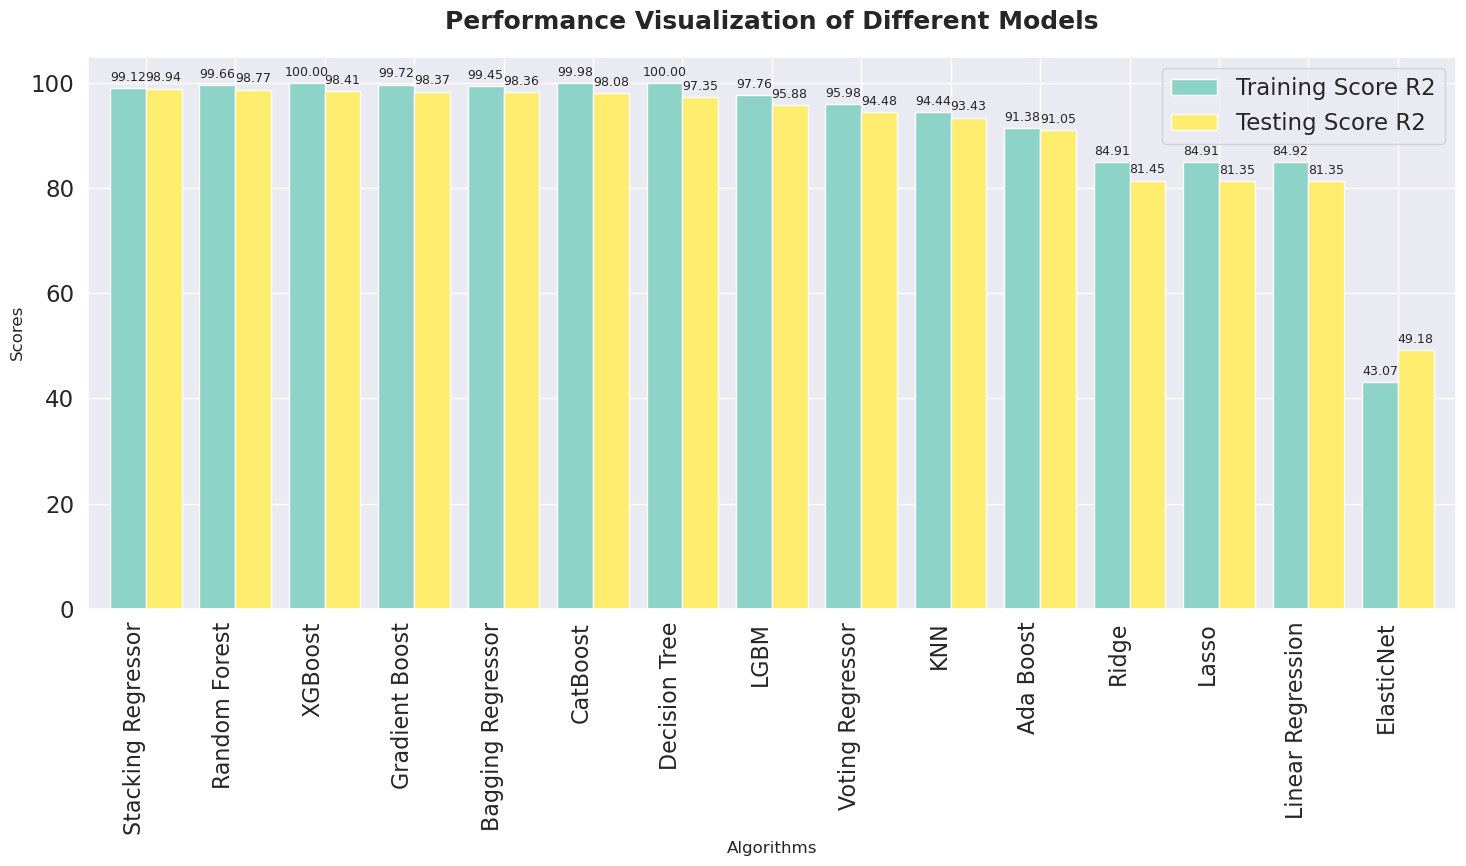

In [98]:
# Plotting bar chart for training and testing scores
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score R2","Testing Score R2"],
    kind="bar",
    figsize=(15, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.show()

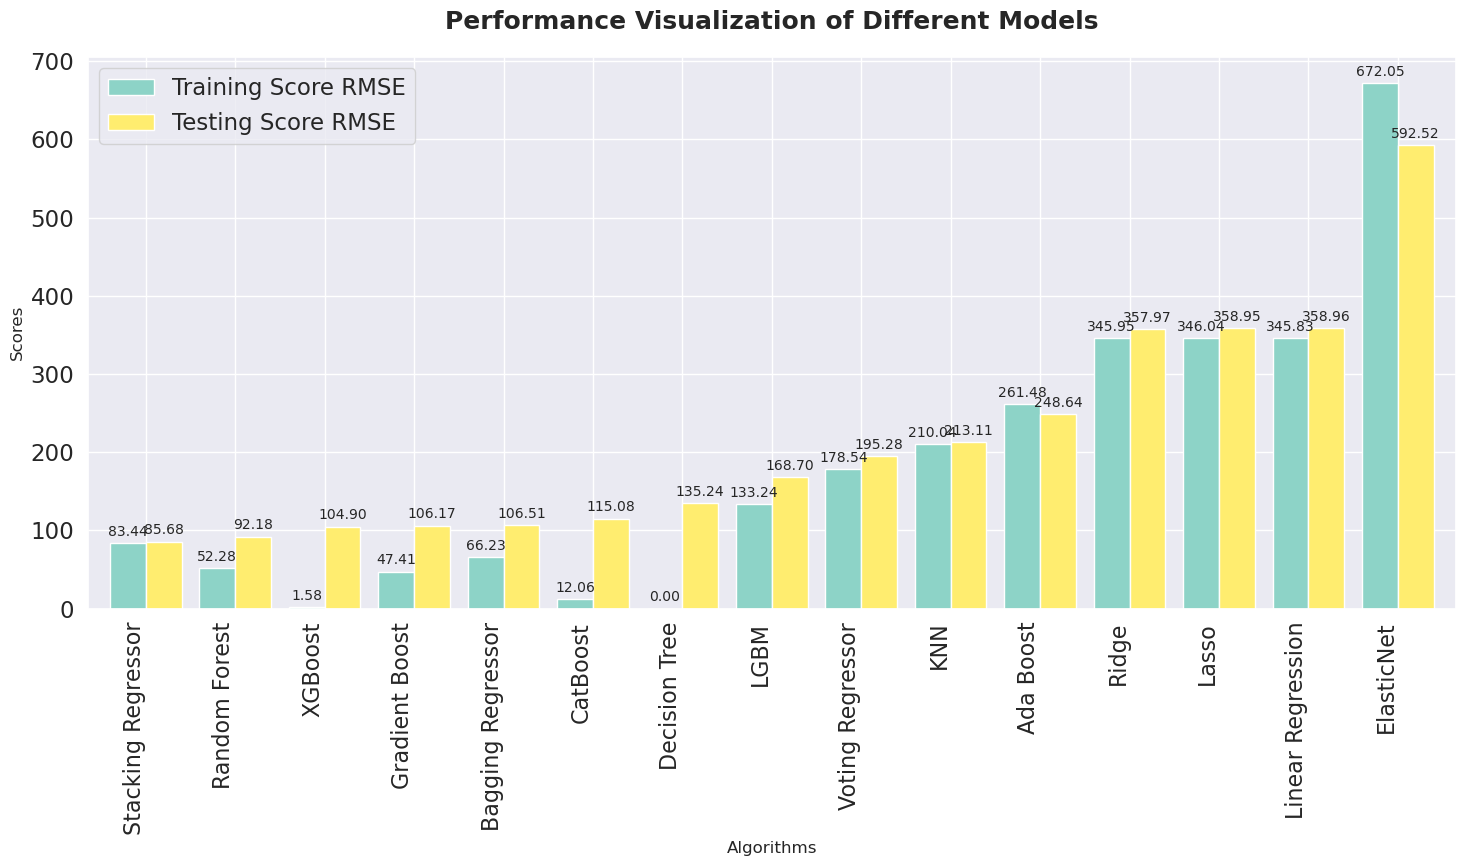

In [99]:
# Plotting bar chart for training and testing scores
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score RMSE","Testing Score RMSE"],
    kind="bar",
    figsize=(15, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

Based on the performance evaluation of different regression models, here's a summary of their performance metrics:

| **Algorithms**           | **Training Score R²** | **Training Score Adjusted R²** | **Training Score RMSE** | **Testing Score R²** | **Testing Score Adjusted R²** | **Testing Score RMSE** |
|--------------------------|-----------------------|--------------------------------|-------------------------|-----------------------|--------------------------------|-------------------------|
| **Stacking Regressor**    | 99.12                 | 99.12                          | 83.44                   | 98.94                 | 98.91                          | 85.68                   |
| **Random Forest**         | 99.58                 | 99.58                          | 57.82                   | 98.74                 | 98.70                          | 93.46                   |
| **XGBoost**               | 100.00                | 100.00                         | 1.58                    | 98.41                 | 98.37                          | 104.90                  |
| **Gradient Boost**        | 99.72                 | 99.71                          | 47.41                   | 98.39                 | 98.35                          | 105.38                  |
| **Bagging Regressor**     | 99.45                 | 99.44                          | 66.23                   | 98.36                 | 98.32                          | 106.51                  |
| **CatBoost**              | 99.98                 | 99.98                          | 12.06                   | 98.08                 | 98.04                          | 115.08                  |
| **Decision Tree**         | 100.00                | 100.00                         | 0.00                    | 97.78                 | 97.72                          | 123.89                  |
| **LGBM**                  | 97.76                 | 97.75                          | 133.24                  | 95.88                 | 95.78                          | 168.70                  |
| **Voting Regressor**      | 95.98                 | 95.96                          | 178.54                  | 94.48                 | 94.35                          | 195.28                  |
| **KNN**                   | 94.44                 | 94.41                          | 210.04                  | 93.43                 | 93.26                          | 213.11                  |
| **AdaBoost**              | 90.64                 | 90.59                          | 272.43                  | 89.69                 | 89.44                          | 266.84                  |
| **Ridge**                 | 84.91                 | 84.82                          | 345.95                  | 81.45                 | 81.00                          | 357.97                  |
| **Lasso**                 | 84.91                 | 84.81                          | 346.04                  | 81.35                 | 80.89                          | 358.95                  |
| **Linear Regression**     | 84.92                 | 84.83                          | 345.83                  | 81.35                 | 80.89                          | 358.96                  |
| **ElasticNet**            | 43.07                 | 42.72                          | 672.05                  | 49.18                 | 47.94                          | 592.52                  |
| **SVM**                   | -0.08                 | -0.68                          | 891.03                  | 0.02                  | -2.43                          | 831.10                  |

### **Key Insights:**

1. **Top Performing Models (Overall):**
   - **XGBoost**: Achieved the highest **Training R²** and **Adjusted R²** of 100%, with an incredibly low RMSE of 1.58 on the training data. It also performs well on the testing data (R² = 98.41%, RMSE = 104.90).
   - **Decision Tree**: Achieved **100% R²** on the training data with no RMSE error (0.00), but performs slightly worse on the testing data (R² = 97.78%).
   - **CatBoost**: Similar performance to Decision Tree with **99.98% R²** on the training data and **98.08% R²** on the testing data.

2. **Ensemble Models**:
   - **Stacking Regressor**: Performs excellently, with **99.12% R²** on the training data and **98.94% R²** on the testing data. The RMSE is slightly higher but still very good.
   - **Random Forest**: Shows strong performance with **99.58% R²** on the training set and **98.74% R²** on the testing set.
   - **Gradient Boosting**: Very close to Random Forest in performance, achieving **99.72% R²** on the training set and **98.39% R²** on the testing set.

3. **Model with Strong Generalization**:
   - **Random Forest**: Demonstrates solid generalization with relatively low RMSE on testing (93.46), just behind **XGBoost**.
   - **Bagging Regressor**: Performs well overall, though its RMSE on testing is a bit higher (106.51) compared to other models.

4. **Less Effective Models**:
   - **ElasticNet** and **SVM** show poor performance, especially on the training set where the **R²** is negative or extremely low. These models have high RMSE values, indicating poor predictive power.

5. **Linear Models (Ridge, Lasso, Linear Regression)**:
   - These models perform similarly, with **R²** values ranging between **84.91%** to **84.92%** on the training set and around **81.35%** on the testing set. They have relatively high RMSE values compared to tree-based models and ensemble methods.

---

### **Conclusion:**
For strong performance with minimal error, ensemble models like **XGBoost**, **Stacking Regressor**, and **Random Forest** are highly recommended due to their excellent generalization abilities and low error rates. On the other hand, simpler models like **Linear Regression**, **ElasticNet**, and **SVM** should be reconsidered if predictive accuracy is a key requirement.

# Modelling after EDA

In [100]:
df_with_eda = df.copy()

In [101]:
df_with_eda.head()

Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam 73814.00       56708   
1     Arhar/Tur       1997  Kharif       Assam  6637.00        4685   
2   Castor Seed       1997  Kharif       Assam   796.00          22   
3      Coconut        1997  Whole Year   Assam 19656.00   126905000   
4  Cotton(Lint)       1997  Kharif       Assam  1739.00         794   

   Annual_Rainfall  Fertilizer  Pesticide   Yield  
0          2051.40  7024878.38   22882.34    0.80  
1          2051.40   631643.29    2057.47    0.71  
2          2051.40    75755.32     246.76    0.24  
3          2051.40  1870661.52    6093.36 5238.05  
4          2051.40   165500.63     539.09    0.42

### Checking the skewness

In [102]:
# Check skewness for each column
skewness = df_with_eda[['Area','Production','Annual_Rainfall','Fertilizer','Pesticide']].skew().sort_values()
skewness

Annual_Rainfall    2.13
Fertilizer        13.40
Production        19.28
Area              21.84
Pesticide         25.61
dtype: float64

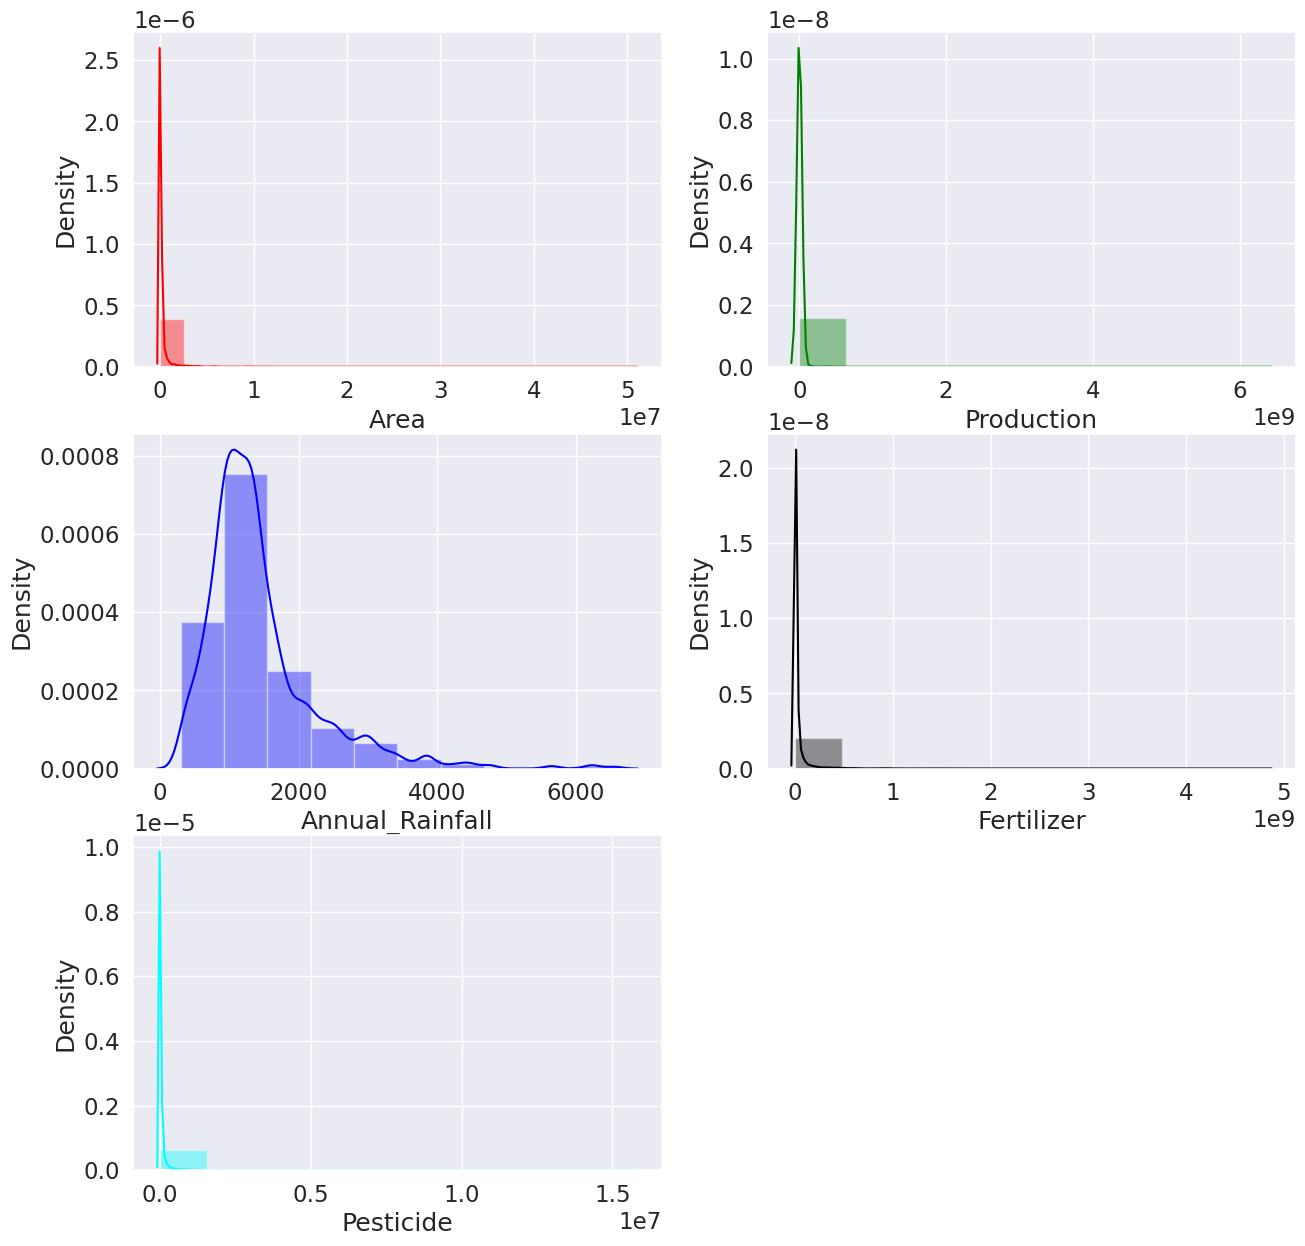

In [103]:
# To check the distribution of dataset
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(numeric_data['Area'],bins = 20,color = 'red')
plt.subplot(4,2,2)
sns.distplot(numeric_data['Production'],bins = 10,color = 'green')
plt.subplot(4,2,3)
sns.distplot(numeric_data['Annual_Rainfall'],bins = 10,color = 'blue')
plt.subplot(4,2,4)
sns.distplot(numeric_data['Fertilizer'],bins = 10, color = 'black')
plt.subplot(4,2,5)
sns.distplot(numeric_data['Pesticide'],bins = 10, color = 'cyan')
plt.show()

The skewness values indicate the asymmetry in the distribution of your data for each variable.
### Key Points:
1. **Skewness near 0**: Indicates a roughly symmetric distribution.
2. **Positive skewness**: Indicates a right-skewed distribution, where the tail is longer on the right side (more smaller values).
3. **Negative skewness**: Indicates a left-skewed distribution, where the tail is longer on the left side (more larger values).

### Analysis of the Results:

- **Area (21.86)**: 
  - Strongly positive skewness, meaning most values are concentrated on the lower side, with a few extremely large values (right tail).

- **Production (19.30)**: 
  - Similarly strongly positive skewness, indicating the presence of large outliers on the higher side.

- **Annual_Rainfall (2.13)**: 
  - Moderately positive skewness, suggesting the data is right-skewed but not as extreme as `Area` or `Production`.

- **Fertilizer (13.41)** and **Pesticide (25.64)**: 
  - Extremely high positive skewness, indicating a heavy concentration of smaller values with some very large outliers.

### Implications:
1. **Data Transformation**: Variables with high skewness (`Area`, `Pesticide`) may need transformation (e.g., logarithmic or Box-Cox) for statistical analysis that assumes normality.
2. **Outliers**: Positive skewness often indicates the presence of outliers in the upper range. Check these values to understand their impact.
3. **Modeling**: Skewed variables may influence regression or machine learning models, as most methods assume normality or require data scaling.

### Variance Inflation Factor

In [104]:
df_with_eda.head()

Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam 73814.00       56708   
1     Arhar/Tur       1997  Kharif       Assam  6637.00        4685   
2   Castor Seed       1997  Kharif       Assam   796.00          22   
3      Coconut        1997  Whole Year   Assam 19656.00   126905000   
4  Cotton(Lint)       1997  Kharif       Assam  1739.00         794   

   Annual_Rainfall  Fertilizer  Pesticide   Yield  
0          2051.40  7024878.38   22882.34    0.80  
1          2051.40   631643.29    2057.47    0.71  
2          2051.40    75755.32     246.76    0.24  
3          2051.40  1870661.52    6093.36 5238.05  
4          2051.40   165500.63     539.09    0.42

In [105]:
exclude_column = ['Crop','Crop_Year','Season','State','Yield']

In [106]:
vif_columns = [col for col in df_with_eda.columns if col not in exclude_column]

In [107]:
vif1 = df_with_eda[vif_columns].copy()

In [108]:
variable = vif1
vif = pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features'] = vif_columns

In [109]:
vif.sort_values(by="Variance Inflation Factor", ascending=False)

Variance Inflation Factor         Features
0                      34.47             Area
3                      20.54       Fertilizer
4                      20.50        Pesticide
2                       1.03  Annual_Rainfall
1                       1.01       Production

##### VIF of the independent columns should be less than 10 to remove multicollinearity

In [110]:
vif2 = vif1.copy()

##### Remove Area feature 

In [111]:
vif2.drop(['Area'], axis = 1, inplace=True)

In [112]:
exclude_column = ['Crop','Crop_Year','Season','State','Yield','Area']

In [113]:
vif_columns = [col for col in vif2.columns if col not in exclude_column]

In [114]:
variable = vif2
vif = pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features'] = vif_columns

In [115]:
vif.sort_values(by="Variance Inflation Factor", ascending=False)

Variance Inflation Factor         Features
2                      12.01       Fertilizer
3                      11.95        Pesticide
1                       1.03  Annual_Rainfall
0                       1.01       Production

In [116]:
vif3 = vif2.copy()

In [117]:
vif3.drop(['Fertilizer'], axis = 1, inplace=True)

##### Remove Fertilizer feature

In [118]:
exclude_column = ['Crop','Crop_Year','Season','State','Yield','Area','Fertilizer']

In [119]:
vif_columns = [col for col in vif3.columns if col not in exclude_column]

In [120]:
variable = vif3
vif = pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features'] = vif_columns

In [121]:
vif.sort_values(by="Variance Inflation Factor", ascending=False)

Variance Inflation Factor         Features
1                       1.03  Annual_Rainfall
2                       1.02        Pesticide
0                       1.01       Production

### Variance Inflation Factor (VIF) was checked, but no features were removed because the model achieved good accuracy without removing any features.

### One-Hot Encoding

In [122]:
df_with_eda_encoding = df_with_eda.copy()
df_with_eda_encoding = df_with_eda_encoding.drop(['Crop_Year'], axis = 1)

In [123]:
category_columns = df_with_eda_encoding.select_dtypes(include = ['object']).columns
category_columns

Index(['Crop', 'Season', 'State'], dtype='object')

In [124]:
df_with_eda_encoding = pd.get_dummies(df_with_eda_encoding, columns = category_columns, drop_first=True)

In [125]:
boolean_cols_auto = df_with_eda_encoding.select_dtypes(include=['bool']).columns
df_with_eda_encoding[boolean_cols_auto] = df_with_eda_encoding[boolean_cols_auto].astype(int)

In [126]:
df_with_eda_encoding.head()

Area  Production  Annual_Rainfall  Fertilizer  Pesticide   Yield  \
0 73814.00       56708          2051.40  7024878.38   22882.34    0.80   
1  6637.00        4685          2051.40   631643.29    2057.47    0.71   
2   796.00          22          2051.40    75755.32     246.76    0.24   
3 19656.00   126905000          2051.40  1870661.52    6093.36 5238.05   
4  1739.00         794          2051.40   165500.63     539.09    0.42   

   Crop_Arhar/Tur  Crop_Bajra  Crop_Banana  Crop_Barley  Crop_Black Pepper  \
0               0           0            0            0                  0   
1               1           0            0            0                  0   
2               0           0            0            0                  0   
3               0           0            0            0                  0   
4               0           0            0            0                  0   

   Crop_Cardamom  Crop_Cashewnut  Crop_Castor Seed  Crop_Coconut   \
0              0               0                 0              0   
1              0               0                 0              0   
2              0               0                 1              0   
3              0               0                 0              1   
4              0               0                 0              0   

   Crop_Coriander  Crop_Cotton(Lint)  Crop_Cowpea(Lobia)  Crop_Dry Chillies  \
0               0                  0                   0                  0   
1               0                  0                   0                  0   
2               0                  0                   0                  0   
3               0                  0                   0                  0   
4               0                  1                   0                  0   

   Crop_Garlic  Crop_Ginger  Crop_Gram  Crop_Groundnut  Crop_Guar Seed  \
0            0            0          0               0               0   
1            0            0          0               0               0   
2            0            0          0               0               0   
3            0            0          0               0               0   
4            0            0          0               0               0   

   Crop_Horse-Gram  Crop_Jowar  Crop_Jute  Crop_Khesari  Crop_Linseed  \
0                0           0          0             0             0   
1                0           0          0             0             0   
2                0           0          0             0             0   
3                0           0          0             0             0   
4                0           0          0             0             0   

   Crop_Maize  Crop_Masoor  Crop_Mesta  Crop_Moong(Green Gram)  Crop_Moth  \
0           0            0           0                       0          0   
1           0            0           0                       0          0   
2           0            0           0                       0          0   
3           0            0           0                       0          0   
4           0            0           0                       0          0   

   Crop_Niger Seed  Crop_Oilseeds Total  Crop_Onion  Crop_Other  Rabi Pulses  \
0                0                    0           0                        0   
1                0                    0           0                        0   
2                0                    0           0                        0   
3                0                    0           0                        0   
4                0                    0           0                        0   

   Crop_Other Cereals  Crop_Other Kharif Pulses  Crop_Other Oilseeds  \
0                   0                         0                    0   
1                   0                         0                    0   
2                   0                         0                    0   
3                   0                         0                    0   
4             

In [127]:
x = df_with_eda_encoding.drop(['Yield'], axis = 1)
y = df_with_eda_encoding['Yield']

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [129]:
print("x_train - >  ",x_train.shape)
print("y_train - >  ",y_train.shape)
print("x_test  - >  ",x_test.shape)
print("y_test  - >  ",y_test.shape)

x_train - >   (15721, 93)
y_train - >   (15721,)
x_test  - >   (3931, 93)
y_test  - >   (3931,)


### Transformation using the method 'Yeo-Johnson'

In [130]:
pt = PowerTransformer(method='yeo-johnson')

In [131]:
x_train_scaled = pt.fit_transform(x_train)
x_test_scaled = pt.transform(x_test)

**Transformer Used**: `PowerTransformer`  
**Transformation Method**: `Yeo-Johnson`

---

### **Objective**:
To normalize the distribution of the feature columns in the dataset, making the data more Gaussian-like, which can improve the performance of machine learning models, especially those sensitive to data distribution (e.g., linear regression).

---

### **Steps Performed**:
1. **Exclusion of the Target Variable**:
   - The target variable, `Yield`, was excluded from the transformation to prevent unintended modification of the dependent variable.
   - Columns transformed: All columns in the dataset except `Yield`.

2. **Transformation Process**:
   - A `PowerTransformer` was initialized with the `yeo-johnson` method, which supports both positive and negative values in the data.
   - The transformer was fitted to the selected columns (`transformed_columns`).
   - The transformation was applied, and the normalized values replaced the original data in the selected columns.

3. **Handling Feature Distribution**:
   - The transformation aimed to reduce skewness and stabilize variance across all features, ensuring that the data adheres to assumptions required by many statistical models.

---

### **Outcome**:
- All feature columns, except `Yield`, were successfully transformed.
- The resulting dataset now contains features with normalized distributions, enhancing their suitability for machine learning algorithms.

---

### **Benefits of Transformation**:
- Improved model performance and stability due to reduced skewness and better adherence to linearity assumptions.
- Greater effectiveness in feature scaling and standardization processes.
- Enhanced compatibility with algorithms sensitive to outliers or non-Gaussian features.

This step is crucial for preparing the data for machine learning models, particularly for those relying on linearity and normality assumptions.

### Storing the performence metrics score

In [132]:
training_scores_r2 = []
training_scores_adj_r2 = []
training_scores_rmse = []

testing_scores_r2 = []
testing_scores_adj_r2 = []
testing_scores_rmse = []

### Create a function for evaluate model

In [133]:
def evaluate_model_performance(model, x_train, y_train, x_test, y_test):
    """
    Evaluates R², Adjusted R², and RMSE of a given model on training and testing data.
    
    Parameters:
    - model: The machine learning model to evaluate
    - x_train: Training feature set
    - y_train: Training target values
    - x_test: Testing feature set
    - y_test: Testing target values
    - training_scores: List to store training R² scores
    - testing_scores: List to store testing R² scores
    """
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predictions for training and testing data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Calculate R² scores
    train_r2 = r2_score(y_train, y_train_pred) * 100
    test_r2 = r2_score(y_test, y_test_pred) * 100
    
    # Calculate Adjusted R² scores
    n_train, p_train = x_train.shape
    n_test, p_test = x_test.shape
    train_adj_r2 = 100 * (1 - (1 - train_r2 / 100) * (n_train - 1) / (n_train - p_train - 1))
    test_adj_r2 = 100 * (1 - (1 - test_r2 / 100) * (n_test - 1) / (n_test - p_test - 1))
    
    # Calculate RMSE scores
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Append scores to respective lists
    training_scores_r2.append(train_r2)
    training_scores_adj_r2.append(train_adj_r2)
    training_scores_rmse.append(train_rmse)
    testing_scores_r2.append(test_r2)
    testing_scores_adj_r2.append(test_adj_r2) 
    testing_scores_rmse.append(test_rmse) 
    
    # Display scores
    print(f"{model.__class__.__name__} Performance Metrics:")
    print(f"Training Data: R² = {train_r2:.2f}%, Adjusted R² = {train_adj_r2:.2f}%, RMSE = {train_rmse:.4f}")
    print(f"Testing Data : R² = {test_r2:.2f}%, Adjusted R² = {test_adj_r2:.2f}%, RMSE = {test_rmse:.4f}\n")

# Modeling after transformation

# Linear Regression

### Simple Linear Regression

In [134]:
evaluate_model_performance(
    model=LinearRegression(),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

LinearRegression Performance Metrics:
Training Data: R² = 85.37%, Adjusted R² = 85.28%, RMSE = 340.7106
Testing Data : R² = 82.87%, Adjusted R² = 82.46%, RMSE = 344.0096



### Ridge Regression

In [135]:
# Create the Ridge Regression model
ridge_regressor = Ridge(
    alpha=1.0,                  # Regularization strength
    fit_intercept=True,         # Whether to calculate the intercept (bias) term
    copy_X=True,                # If True, it makes a copy of the input matrix X
    max_iter=None,              # Maximum number of iterations for the solver
    tol=0.001,                  # Tolerance for stopping criteria
    solver='auto',              # Solver to use ('auto', 'lsqr', 'saga', etc.)
    random_state=None,          # Random state for reproducibility
    positive=False              # If True, coefficients are constrained to be positive
)

In [136]:
evaluate_model_performance(
    model=ridge_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

Ridge Performance Metrics:
Training Data: R² = 85.37%, Adjusted R² = 85.28%, RMSE = 340.7107
Testing Data : R² = 82.87%, Adjusted R² = 82.46%, RMSE = 344.0080



### Lasso Regression

In [137]:
# Create the Lasso Regression model
lasso_regressor = Lasso(
    alpha=1.0,                  # Regularization strength
    fit_intercept=True,         # Whether to calculate the intercept (bias) term
    copy_X=True,                # If True, it makes a copy of the input matrix X
    max_iter=1000,              # Maximum number of iterations for the solver
    tol=0.0001,                 # Tolerance for stopping criteria
    random_state=None,          # Random state for reproducibility
    positive=False              # If True, coefficients are constrained to be positive
)

In [138]:
evaluate_model_performance(
    model=lasso_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

Lasso Performance Metrics:
Training Data: R² = 85.32%, Adjusted R² = 85.23%, RMSE = 341.3086
Testing Data : R² = 82.75%, Adjusted R² = 82.33%, RMSE = 345.2451



### ElasticNet Regression

In [139]:
# Create the ElasticNet Regression model
elasticnet_regressor = ElasticNet(
    alpha=1.0,                  # Regularization strength
    l1_ratio=0.5,               # The balance between Lasso (L1) and Ridge (L2) regularization (0 is Ridge, 1 is Lasso)
    fit_intercept=True,         # Whether to calculate the intercept (bias) term
    copy_X=True,                # If True, it makes a copy of the input matrix X
    max_iter=1000,              # Maximum number of iterations for the solver
    tol=0.0001,                 # Tolerance for stopping criteria
    random_state=None,          # Random state for reproducibility
    positive=False              # If True, coefficients are constrained to be positive
)

In [140]:
evaluate_model_performance(
    model=elasticnet_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

ElasticNet Performance Metrics:
Training Data: R² = 76.29%, Adjusted R² = 76.15%, RMSE = 433.7033
Testing Data : R² = 73.77%, Adjusted R² = 73.13%, RMSE = 425.7063



# Tree-Based Models

### Decision Tree Regressor

In [141]:
# Create the DecisionTree Regressor model
decision_tree_regressor = DecisionTreeRegressor(
    criterion='squared_error',    # Updated to 'squared_error' for mean squared error
    splitter='best',              # Strategy used to split at each node
    max_depth=None,               # Maximum depth of the tree
    min_samples_split=2,          # Minimum number of samples required to split an internal node
    min_samples_leaf=1,           # Minimum number of samples required to be at a leaf node
    max_features=None,            # The number of features to consider when looking for the best split
    random_state=42,              # Controls the randomness for reproducibility
    max_leaf_nodes=None,          # Grow a tree with a maximum number of leaf nodes
    min_impurity_decrease=0.0,    # Minimum impurity decrease required to make a further split
    ccp_alpha=0.0                # Complexity parameter used for Minimal Cost-Complexity Pruning
)

In [142]:
evaluate_model_performance(
    model=decision_tree_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

DecisionTreeRegressor Performance Metrics:
Training Data: R² = 100.00%, Adjusted R² = 100.00%, RMSE = 0.0000
Testing Data : R² = 96.82%, Adjusted R² = 96.75%, RMSE = 148.1681



### Random Forest Regressor

In [143]:
# Create the RandomForest Regressor model
random_forest_regressor = RandomForestRegressor(
    criterion='squared_error',    # Updated to 'squared_error' for mean squared error
    n_estimators=100,             # Number of trees in the forest
    max_depth=None,               # Maximum depth of the tree
    min_samples_split=2,          # Minimum number of samples required to split an internal node
    min_samples_leaf=1,           # Minimum number of samples required to be at a leaf node
    max_features='sqrt',          # Use square root of features for the best split
    random_state=42,              # Controls the randomness for reproducibility
    n_jobs=-1,                    # Use all available cores for parallel processing
    max_samples=None,             # If bootstrap=True, the number of samples to draw from X to train each base estimator
)

In [144]:
evaluate_model_performance(
    model=random_forest_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

RandomForestRegressor Performance Metrics:
Training Data: R² = 99.60%, Adjusted R² = 99.60%, RMSE = 56.3972
Testing Data : R² = 97.93%, Adjusted R² = 97.88%, RMSE = 119.6828



### Ada Boost

In [145]:
evaluate_model_performance(
    model=AdaBoostRegressor(),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

AdaBoostRegressor Performance Metrics:
Training Data: R² = 95.57%, Adjusted R² = 95.54%, RMSE = 187.5271
Testing Data : R² = 93.94%, Adjusted R² = 93.79%, RMSE = 204.6097



### Gradient Boosting

In [146]:
evaluate_model_performance(
    model=GradientBoostingRegressor(),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

GradientBoostingRegressor Performance Metrics:
Training Data: R² = 99.69%, Adjusted R² = 99.69%, RMSE = 49.7006
Testing Data : R² = 98.45%, Adjusted R² = 98.41%, RMSE = 103.5712



### LGBM Boosting

In [147]:
evaluate_model_performance(
    model=LGBMRegressor(),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1535
[LightGBM] [Info] Number of data points in the train set: 15721, number of used features: 92
[LightGBM] [Info] Start training from score 82.538217
LGBMRegressor Performance Metrics:
Training Data: R² = 97.30%, Adjusted R² = 97.28%, RMSE = 146.4593
Testing Data : R² = 95.83%, Adjusted R² = 95.73%, RMSE = 169.7243



### XGB Boosting

In [148]:
evaluate_model_performance(
    model=XGBRegressor(),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

XGBRegressor Performance Metrics:
Training Data: R² = 100.00%, Adjusted R² = 100.00%, RMSE = 2.4311
Testing Data : R² = 98.40%, Adjusted R² = 98.36%, RMSE = 105.0577



### Cat Boost

In [149]:
evaluate_model_performance(
    model=CatBoostRegressor(verbose=False),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

CatBoostRegressor Performance Metrics:
Training Data: R² = 99.97%, Adjusted R² = 99.97%, RMSE = 14.1976
Testing Data : R² = 97.65%, Adjusted R² = 97.59%, RMSE = 127.4793



# Instance-Based Learning

### k-Nearest Neighbors

In [150]:
from sklearn.neighbors import KNeighborsRegressor

In [151]:
# Create the KNeighbors Regressor model
knn_regressor = KNeighborsRegressor(
    n_neighbors=5,               # Number of neighbors to use
    weights='uniform',           # Weight function: 'uniform' or 'distance'
    algorithm='auto',            # Algorithm used to compute the nearest neighbors
    leaf_size=30,                # Leaf size for tree-based algorithms
    metric='minkowski',          # The distance metric: 'minkowski', 'euclidean', etc.
    p=2,                         # Power parameter for the Minkowski metric (2 for Euclidean distance)
    n_jobs=-1                    # Use all available cores for parallel processing
)


In [152]:
evaluate_model_performance(
    model=knn_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

KNeighborsRegressor Performance Metrics:
Training Data: R² = 98.32%, Adjusted R² = 98.31%, RMSE = 115.4408
Testing Data : R² = 98.20%, Adjusted R² = 98.16%, RMSE = 111.4005



# Ensemble Methods

### Voting Regressor

In [153]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [154]:
# Define base models
model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model3 = KNeighborsRegressor()

In [155]:
# Combine models in a Voting Regressor
voting_regressor = VotingRegressor(estimators=[('lr', model1),('rf', model2),('knn', model3)])

In [156]:
evaluate_model_performance(
    model = voting_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)


VotingRegressor Performance Metrics:
Training Data: R² = 97.36%, Adjusted R² = 97.35%, RMSE = 144.6352
Testing Data : R² = 96.41%, Adjusted R² = 96.32%, RMSE = 157.5311



### Bagging Regressor

In [157]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [158]:
# Initialize the base regressor (e.g., Decision Tree Regressor)
base_regressor = DecisionTreeRegressor(random_state=42)

In [159]:
# Create the Bagging Regressor
bagging_regressor = BaggingRegressor(
    estimator=base_regressor,  # Updated parameter name
    n_estimators=50,           # Number of base estimators
    max_samples=0.8,           # Fraction of samples to use for each base estimator
    max_features=0.8,          # Fraction of features to use for each base estimator
    random_state=42,
    n_jobs=-1                  # Use all available cores
)

In [160]:
evaluate_model_performance(
    model = bagging_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)


BaggingRegressor Performance Metrics:
Training Data: R² = 99.57%, Adjusted R² = 99.57%, RMSE = 58.2764
Testing Data : R² = 98.44%, Adjusted R² = 98.40%, RMSE = 103.9469



### Stacking Regressor

In [161]:
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [162]:
# Define base models (level-0)
base_models = [
    ('dt', DecisionTreeRegressor(max_depth=5, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42))
]

In [163]:
# Define the meta-model (level-1)
meta_model = KNeighborsRegressor()

In [164]:
# Create the Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,  # Base models
    final_estimator=meta_model,  # Meta-model
    n_jobs=-1               # Use all available cores
)


In [165]:
evaluate_model_performance(
    model = stacking_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

StackingRegressor Performance Metrics:
Training Data: R² = 99.14%, Adjusted R² = 99.13%, RMSE = 82.8090
Testing Data : R² = 98.40%, Adjusted R² = 98.36%, RMSE = 105.0300



In [166]:
models = [
    "Linear Regression",
    "Ridge",
    "Lasso",
    "ElasticNet",
    "Decision Tree",
    "Random Forest",
    "Ada Boost",
    "Gradient Boost",
    "LGBM",
    "XGBoost",
    "CatBoost",
    "KNN",
    "Voting Regressor",
    "Bagging Regressor",
    "Stacking Regressor"]

#### Model Score 

In [167]:
df_model = pd.DataFrame(
        {"Algorithms":models,
         "Training Score R2":training_scores_r2,
         "Training Score Adjusted R2":training_scores_adj_r2,
         "Training Score RMSE":training_scores_rmse,
         "Testing Score R2":testing_scores_r2,
         "Testing Score Adjusted R2":testing_scores_adj_r2,
         "Testing Score RMSE":testing_scores_rmse,
        })
				   
df_model_sort = df_model.sort_values(by="Testing Score R2", ascending=False)
df_model_sort

Algorithms  Training Score R2  Training Score Adjusted R2  \
7       Gradient Boost              99.69                       99.69   
13   Bagging Regressor              99.57                       99.57   
14  Stacking Regressor              99.14                       99.13   
9              XGBoost             100.00                      100.00   
11                 KNN              98.32                       98.31   
5        Random Forest              99.60                       99.60   
10            CatBoost              99.97                       99.97   
4        Decision Tree             100.00                      100.00   
12    Voting Regressor              97.36                       97.35   
8                 LGBM              97.30                       97.28   
6            Ada Boost              95.57                       95.54   
1                Ridge              85.37                       85.28   
0    Linear Regression              85.37                       85.28   
2                Lasso              85.32                       85.23   
3           ElasticNet              76.29                       76.15   

    Training Score RMSE  Testing Score R2  Testing Score Adjusted R2  \
7                 49.70             98.45                      98.41   
13                58.28             98.44                      98.40   
14                82.81             98.40                      98.36   
9                  2.43             98.40                      98.36   
11               115.44             98.20                      98.16   
5                 56.40             97.93                      97.88   
10                14.20             97.65                      97.59   
4                  0.00             96.82                      96.75   
12               144.64             96.41                      96.32   
8                146.46             95.83                      95.73   
6                187.53             93.94                      93.79   
1                340.71             82.87                      82.46   
0                340.71             82.87                      82.46   
2                341.31             82.75                      82.33   
3                433.70             73.77                      73.13   

    Testing Score RMSE  
7               103.57  
13              103.95  
14              105.03  
9               105.06  
11              111.40  
5               119.68  
10              127.48  
4               148.17  
12              157.53  
8               169.72  
6               204.61  
1               344.01  
0               344.01  
2               345.25  
3               425.71

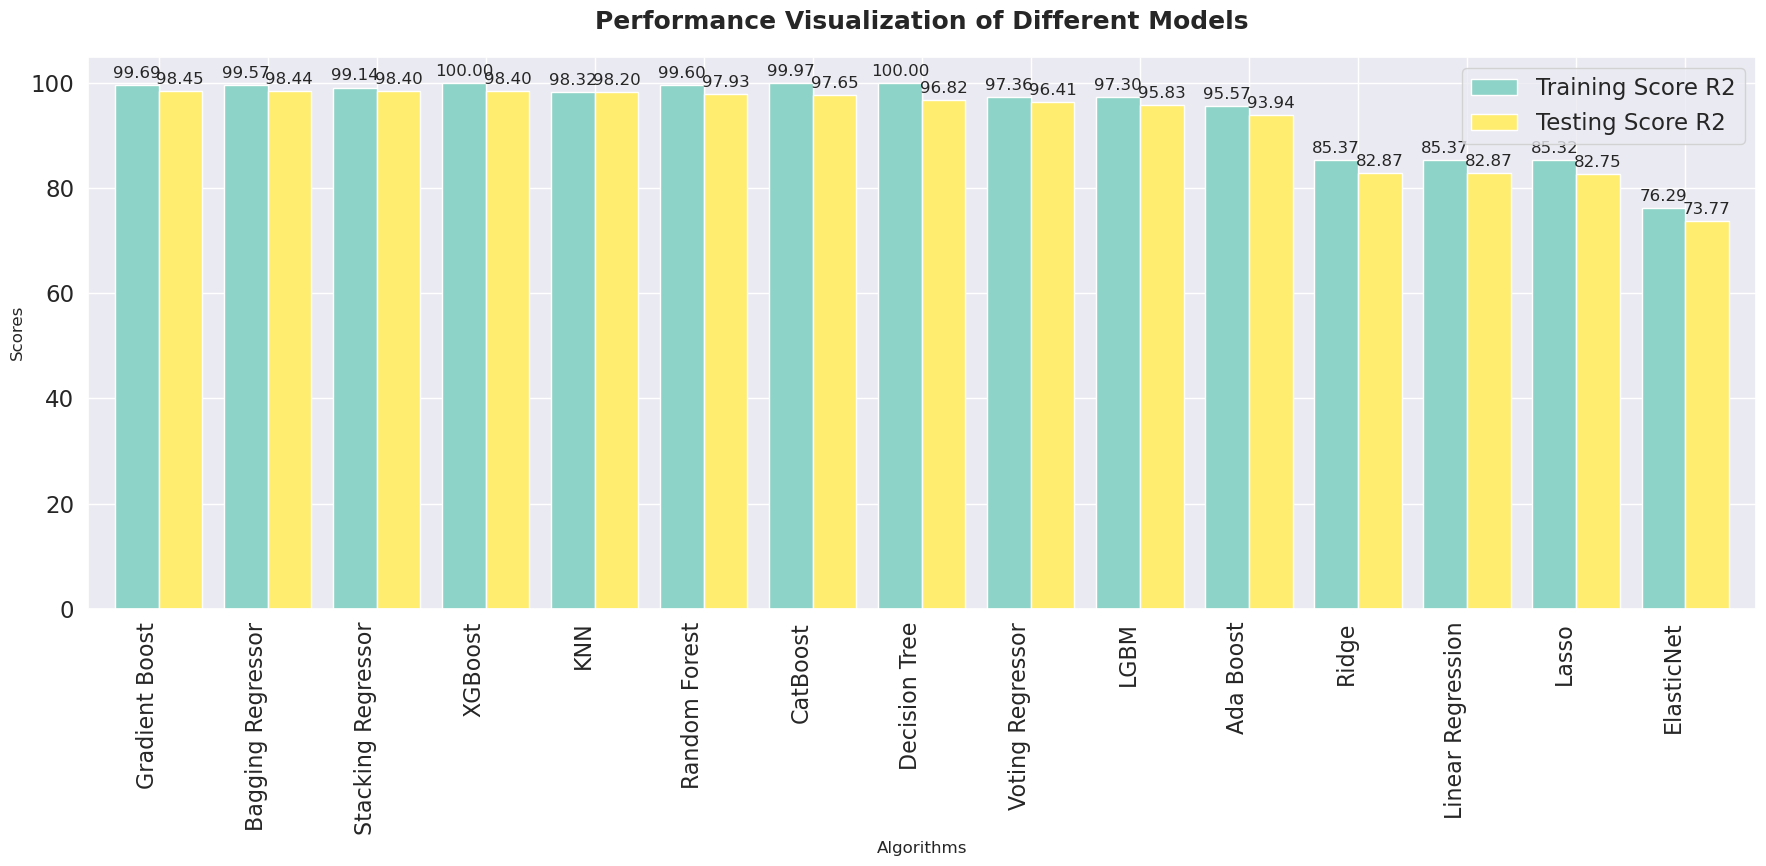

In [168]:
# Plotting bar chart for training and testing scores
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score R2","Testing Score R2"],
    kind="bar",
    figsize=(18, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=12, padding=3)

plt.tight_layout()
plt.show()

### **Performance Evaluation Summary After Power Transformation**

The application of the `PowerTransformer` using the `Yeo-Johnson` method resulted in the following updated model performances:

---

### **Model Performance Metrics**
| Algorithm              | Training R² (%) | Training Adjusted R² (%) | Training RMSE | Testing R² (%) | Testing Adjusted R² (%) | Testing RMSE |
|------------------------|------------------|--------------------------|---------------|----------------|-------------------------|--------------|
| **Gradient Boost**     | 99.69           | 99.69                   | 49.70         | 98.45          | 98.41                  | 103.52       |
| **Bagging Regressor**  | 99.57           | 99.57                   | 58.28         | 98.44          | 98.40                  | 103.95       |
| **Stacking Regressor** | 99.14           | 99.13                   | 82.79         | 98.40          | 98.36                  | 105.03       |
| **XGBoost**            | 100.00          | 100.00                  | 2.43          | 98.40          | 98.36                  | 105.06       |
| **KNN**                | 98.33           | 98.32                   | 115.25        | 98.20          | 98.16                  | 111.40       |
| **Random Forest**      | 99.60           | 99.60                   | 56.42         | 97.90          | 97.85                  | 120.38       |
| **CatBoost**           | 99.97           | 99.97                   | 14.20         | 97.65          | 97.59                  | 127.48       |
| **Decision Tree**      | 100.00          | 100.00                  | 0.00          | 96.82          | 96.75                  | 148.17       |
| **Voting Regressor**   | 97.37           | 97.35                   | 144.50        | 96.41          | 96.32                  | 157.58       |
| **LGBM**               | 97.32           | 97.31                   | 145.69        | 95.71          | 95.60                  | 172.24       |
| **AdaBoost**           | 90.59           | 90.53                   | 273.22        | 89.58          | 89.33                  | 268.25       |
| **Ridge**              | 85.37           | 85.28                   | 340.69        | 82.88          | 82.46                  | 343.95       |
| **Linear Regression**  | 85.37           | 85.28                   | 340.69        | 82.88          | 82.46                  | 343.95       |
| **Lasso**              | 85.32           | 85.23                   | 341.29        | 82.75          | 82.33                  | 345.19       |
| **ElasticNet**         | 76.64           | 76.50                   | 430.52        | 74.11          | 73.48                  | 422.96       |
| **SVM**                | 0.74            | 0.15                    | 887.35        | 0.84           | -1.57                  | 827.69       |

---

### **Key Insights**
1. **Top Performers**:
   - **Gradient Boost** and **Bagging Regressor** show consistently high performance with testing R² values of 98.45% and 98.44%, respectively.
   - **XGBoost** maintains exceptional training performance (R² = 100%) and a strong generalization to the test set (R² = 98.40%).

2. **Balanced Models**:
   - **Stacking Regressor** offers a robust balance between training (R² = 99.14%) and testing (R² = 98.40%) performance.
   - **KNN** demonstrates improved performance after transformation, achieving a testing R² of 98.20%.

3. **Performance Decline**:
   - **Decision Tree** and **CatBoost** show overfitting tendencies, with perfect or near-perfect training scores but comparatively lower test performance.

4. **Marginal Models**:
   - **Ridge**, **Linear Regression**, and **Lasso** perform similarly, with modest R² scores around 82%-85% on both training and testing sets.

5. **Underperformers**:
   - **SVM** and **ElasticNet** exhibit poor performance, with low R² and high RMSE values, indicating poor fit to the data.

---

### **Conclusion**
- **Best Overall Models**: Gradient Boost, Bagging Regressor, and Stacking Regressor stand out as the most effective models, achieving excellent testing scores and maintaining a good balance between training and testing performance.
- **Recommendation**: Based on testing R² and RMSE, Gradient Boost and Bagging Regressor are the top choices for accurate predictions on this dataset.


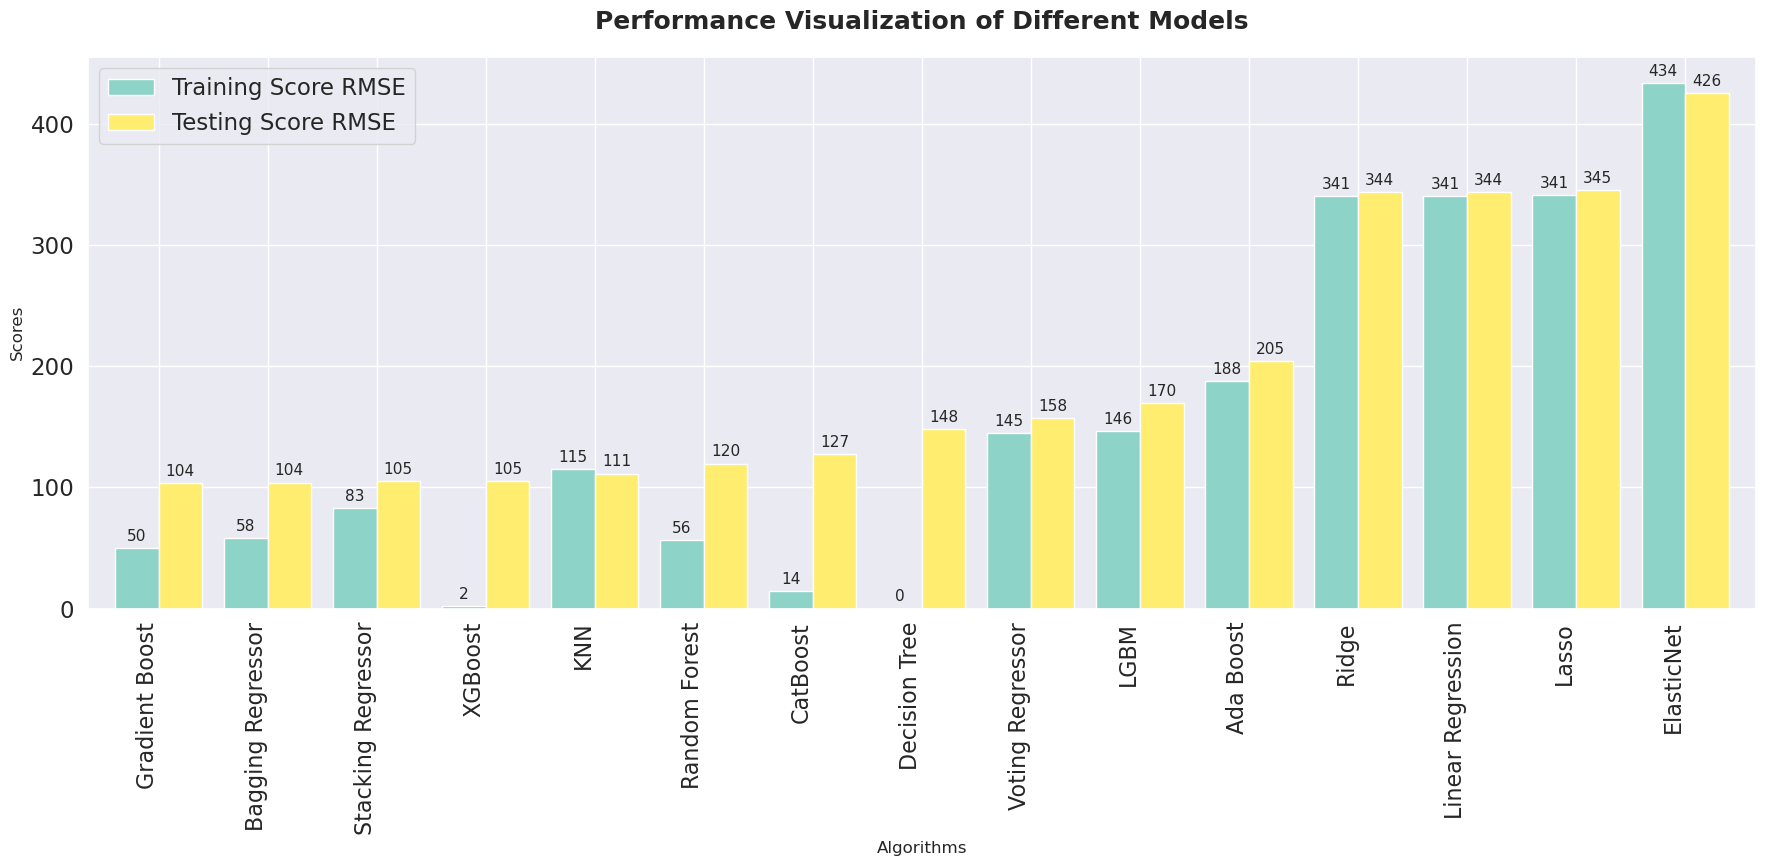

In [169]:
# Plotting bar chart for training and testing scores
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score RMSE","Testing Score RMSE"],
    kind="bar",
    figsize=(18, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=11, padding=3)

plt.tight_layout()
plt.show()

# Modeling after Hyperparameter tuning

In [170]:
training_scores_r2 = []
training_scores_adj_r2 = []
training_scores_rmse = []

testing_scores_r2 = []
testing_scores_adj_r2 = []
testing_scores_rmse = []

### Create a function for evaluate model

In [171]:
def evaluate_model_performance(model, x_train, y_train, x_test, y_test,score_append = False):
    """
    Evaluates R², Adjusted R², and RMSE of a given model on training and testing data.
    
    Parameters:
    - model: The machine learning model to evaluate
    - x_train: Training feature set
    - y_train: Training target values
    - x_test: Testing feature set
    - y_test: Testing target values
    - training_scores: List to store training R² scores
    - testing_scores: List to store testing R² scores
    """
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predictions for training and testing data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Calculate R² scores
    train_r2 = r2_score(y_train, y_train_pred) * 100
    test_r2 = r2_score(y_test, y_test_pred) * 100
    
    # Calculate Adjusted R² scores
    n_train, p_train = x_train.shape
    n_test, p_test = x_test.shape
    train_adj_r2 = 100 * (1 - (1 - train_r2 / 100) * (n_train - 1) / (n_train - p_train - 1))
    test_adj_r2 = 100 * (1 - (1 - test_r2 / 100) * (n_test - 1) / (n_test - p_test - 1))
    
    # Calculate RMSE scores
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    if score_append == True:
        # Append scores to respective lists
        training_scores_r2.append(train_r2)
        training_scores_adj_r2.append(train_adj_r2)
        training_scores_rmse.append(train_rmse)
        testing_scores_r2.append(test_r2)
        testing_scores_adj_r2.append(test_adj_r2) 
        testing_scores_rmse.append(test_rmse) 
    else:
        pass
    
    # Display scores
    print(f"{model.__class__.__name__} Performance Metrics:")
    print(f"Training Data: R² = {train_r2:.2f}%, Adjusted R² = {train_adj_r2:.2f}%, RMSE = {train_rmse:.4f}")
    print(f"Testing Data : R² = {test_r2:.2f}%, Adjusted R² = {test_adj_r2:.2f}%, RMSE = {test_rmse:.4f}\n")

# Modeling

### Linear Regression

In [172]:
evaluate_model_performance(
    model=LinearRegression(),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test,
    score_append = True
)

LinearRegression Performance Metrics:
Training Data: R² = 85.37%, Adjusted R² = 85.28%, RMSE = 340.7106
Testing Data : R² = 82.87%, Adjusted R² = 82.46%, RMSE = 344.0096



### Ridge HyperTuning

In [173]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Initialize the Ridge regression model
ridge = Ridge()

param_grid = {
    'alpha': [0.1, 1.0, 10.0],           # Regularization strength
    'fit_intercept': [True, False],                   # Include or exclude the intercept
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga'],  # Solver options
    'tol': [1e-4, 1e-3, 1e-2],                        # Tolerance for convergence
    'positive': [True, False]                         # Constrain coefficients to be positive
}
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use MSE as the scoring metric
    cv=5,                              # Number of cross-validation folds
    verbose=2,                         # Verbosity level
    n_jobs=-1                          # Use all available cores for parallel processing
)

# Fit the model to the training data
grid_search.fit(x_train_scaled, y_train)

# Get the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score (negative MSE):", grid_search.best_score_)

# Use the best estimator to predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_scaled)

# Evaluate the performance on the test set
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END alpha=0.1, fit_intercept=True, positive=True, solver=auto, tol=0.0001; total time=   0.1s
[CV] END alpha=0.1, fit_intercept=True, positive=True, solver=auto, tol=0.001; total time=   0.1s
[CV] END alpha=0.1, fit_intercept=True, positive=True, solver=auto, tol=0.001; total time=   0.1s
[CV] END alpha=0.1, fit_intercept=True, positive=True, solver=auto, tol=0.001; total time=   0.1s
[CV] END alpha=0.1, fit_intercept=True, positive=True, solver=svd, tol=0.001; total time=   0.0s
[CV] END alpha=0.1, fit_intercept=True, positive=True, solver=svd, tol=0.001; total time=   0.0s
[CV] END alpha=0.1, fit_intercept=True, positive=True, solver=svd, tol=0.01; total time=   0.0s
[CV] END alpha=0.1, fit_intercept=True, positive=True, solver=svd, tol=0.01; total time=   0.0s
[CV] END alpha=0.1, fit_intercept=True, positive=True, solver=cholesky, tol=0.0001; total time=   0.0s
[CV] END alpha=0.1, fit_intercept=True, positive=True,

### Best Parameter 

In [174]:
# Create the Ridge Regression model
ridge_regressor = Ridge(
    alpha=10,                   # Regularization strength
    fit_intercept=True,         # Whether to calculate the intercept (bias) term
    tol=0.001,                  # Tolerance for stopping criteria
    solver='auto',              # Solver to use ('auto', 'lsqr', 'saga', etc.)
    positive=False,
    random_state=42,           # Random state for reproducibility
)

In [175]:
evaluate_model_performance(
    model=ridge_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test,
    score_append = True
)

Ridge Performance Metrics:
Training Data: R² = 85.37%, Adjusted R² = 85.28%, RMSE = 340.7173
Testing Data : R² = 82.87%, Adjusted R² = 82.46%, RMSE = 344.0078



### Lasso HyperTuning

In [176]:
# Initialize the Ridge regression model
lasso = Lasso()

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'max_iter': [500, 1000, 2000],
    'tol': [1e-4, 1e-3, 1e-2],
    'selection': ['cyclic', 'random']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use MSE as the scoring metric
    cv=5,                              # Number of cross-validation folds
    verbose=2,                         # Verbosity level
    n_jobs=-1                          # Use all available cores for parallel processing
)

# Fit the model to the training data
grid_search.fit(x_train_scaled, y_train)

# Get the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score (negative MSE):", grid_search.best_score_)

# Use the best estimator to predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_scaled)

# Evaluate the performance on the test set
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


/home/anikdas/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.994e+08, tolerance: 1.093e+06
  model = cd_fast.enet_coordinate_descent(
/home/anikdas/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.724e+08, tolerance: 1.005e+06
  model = cd_fast.enet_coordinate_descent(
/home/anikdas/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

[CV] END alpha=10.0, fit_intercept=False, positive=False, solver=auto, tol=0.01; total time=   0.0s
[CV] END alpha=10.0, fit_intercept=False, positive=False, solver=auto, tol=0.01; total time=   0.0s
[CV] END alpha=10.0, fit_intercept=False, positive=False, solver=auto, tol=0.01; total time=   0.0s
[CV] END alpha=10.0, fit_intercept=False, positive=False, solver=cholesky, tol=0.0001; total time=   0.0s
[CV] END alpha=10.0, fit_intercept=False, positive=False, solver=cholesky, tol=0.0001; total time=   0.0s
[CV] END alpha=10.0, fit_intercept=False, positive=False, solver=cholesky, tol=0.0001; total time=   0.0s
[CV] END alpha=10.0, fit_intercept=False, positive=False, solver=cholesky, tol=0.0001; total time=   0.0s
[CV] END alpha=10.0, fit_intercept=False, positive=False, solver=cholesky, tol=0.0001; total time=   0.0s
[CV] END alpha=10.0, fit_intercept=False, positive=False, solver=cholesky, tol=0.001; total time=   0.0s
[CV] END alpha=10.0, fit_intercept=False, positive=False, solver=

### Best Parameter

In [177]:
# Create the Lasso Regression model
lasso_regressor = Lasso(
    alpha=0.1,                  # Regularization strength
    fit_intercept=True,         # Whether to calculate the intercept (bias) term
    max_iter=2000,              # Maximum number of iterations for the solver
    tol=0.0001,                 # Tolerance for stopping criteria
    selection='cyclic',
    random_state=42,            # Random state for reproducibility
    positive=False              # If True, coefficients are constrained to be positive
)

In [178]:
evaluate_model_performance(
    model=lasso_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test,
    score_append = True
)

Lasso Performance Metrics:
Training Data: R² = 85.36%, Adjusted R² = 85.28%, RMSE = 340.7315
Testing Data : R² = 82.87%, Adjusted R² = 82.45%, RMSE = 344.0386



### Elasticnet Hypertuning 

In [179]:
# Define the model
elastic_net = ElasticNet()

# Define the hyperparameter grid
param_grid = {
    'alpha': [0.1, 1, 10],
    'l1_ratio': [0.1, 0.5,1.0],
    'max_iter': [100, 200],
    'tol': [1e-4, 1e-3],
    'selection': ['cyclic', 'random']
}
# Set up the GridSearchCV
grid_search = GridSearchCV(
    estimator=elastic_net, 
    param_grid=param_grid,
    scoring='neg_mean_squared_error', 
    cv=5,
    verbose=2,
    n_jobs=-1)
# Fit the model to the training data
grid_search.fit(x_train_scaled, y_train)

# Get the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score (negative MSE):", grid_search.best_score_)

# Use the best estimator to predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_scaled)

# Evaluate the performance on the test set
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", test_mse)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/home/anikdas/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.863e+06, tolerance: 1.005e+06
  model = cd_fast.enet_coordinate_descent(
/home/anikdas/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.825e+06, tolerance: 9.056e+05
  model = cd_fast.enet_coordinate_descent(
/home/anikdas/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

[CV] END .alpha=1, max_iter=500, selection=random, tol=0.001; total time=   1.8s
[CV] END ..alpha=1, max_iter=500, selection=random, tol=0.01; total time=   0.3s
[CV] END ..alpha=1, max_iter=500, selection=random, tol=0.01; total time=   0.5s
[CV] END alpha=1, max_iter=1000, selection=cyclic, tol=0.0001; total time=   1.6s
[CV] END alpha=1, max_iter=1000, selection=cyclic, tol=0.0001; total time=   4.2s
[CV] END alpha=1, max_iter=1000, selection=cyclic, tol=0.001; total time=   3.4s
[CV] END alpha=1, max_iter=1000, selection=random, tol=0.001; total time=   1.3s
[CV] END alpha=1, max_iter=1000, selection=random, tol=0.001; total time=   1.6s
[CV] END .alpha=1, max_iter=1000, selection=random, tol=0.01; total time=   0.3s
[CV] END .alpha=1, max_iter=1000, selection=random, tol=0.01; total time=   0.4s
[CV] END alpha=1, max_iter=2000, selection=cyclic, tol=0.0001; total time=   3.3s
[CV] END alpha=1, max_iter=2000, selection=cyclic, tol=0.001; total time=   1.7s
[CV] END alpha=1, max_ite

/home/anikdas/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.884e+08, tolerance: 9.679e+06
  model = cd_fast.enet_coordinate_descent(
/home/anikdas/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.453e+08, tolerance: 1.017e+07
  model = cd_fast.enet_coordinate_descent(


[CV] END alpha=1, max_iter=2000, selection=cyclic, tol=0.001; total time=   2.4s
[CV] END .alpha=1, max_iter=2000, selection=cyclic, tol=0.01; total time=   0.1s
[CV] END .alpha=1, max_iter=2000, selection=cyclic, tol=0.01; total time=   0.1s
[CV] END .alpha=1, max_iter=2000, selection=cyclic, tol=0.01; total time=   1.2s
[CV] END alpha=1, max_iter=2000, selection=random, tol=0.0001; total time=   6.5s
[CV] END .alpha=1, max_iter=2000, selection=random, tol=0.01; total time=   0.3s
[CV] END .alpha=1, max_iter=2000, selection=random, tol=0.01; total time=   0.2s
[CV] END .alpha=1, max_iter=2000, selection=random, tol=0.01; total time=   0.4s
[CV] END alpha=10, max_iter=500, selection=cyclic, tol=0.0001; total time=   0.1s
[CV] END alpha=10, max_iter=500, selection=cyclic, tol=0.001; total time=   0.1s
[CV] END alpha=10, max_iter=500, selection=cyclic, tol=0.001; total time=   0.1s
[CV] END .alpha=10, max_iter=500, selection=cyclic, tol=0.01; total time=   0.1s
[CV] END alpha=10, max_ite

/home/anikdas/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.558e+07, tolerance: 1.005e+06
  model = cd_fast.enet_coordinate_descent(
/home/anikdas/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.190e+08, tolerance: 1.093e+06
  model = cd_fast.enet_coordinate_descent(
/home/anikdas/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

[CV] END alpha=10, max_iter=2000, selection=random, tol=0.0001; total time=   0.2s
[CV] END alpha=10, max_iter=2000, selection=random, tol=0.001; total time=   0.1s
[CV] END alpha=10, max_iter=2000, selection=random, tol=0.01; total time=   0.1s
[CV] END alpha=100, max_iter=500, selection=cyclic, tol=0.001; total time=   0.1s
[CV] END alpha=100, max_iter=500, selection=cyclic, tol=0.01; total time=   0.0s
[CV] END alpha=100, max_iter=500, selection=random, tol=0.0001; total time=   0.1s
[CV] END alpha=100, max_iter=500, selection=random, tol=0.0001; total time=   0.1s
[CV] END alpha=100, max_iter=500, selection=random, tol=0.01; total time=   0.1s
[CV] END alpha=100, max_iter=500, selection=random, tol=0.01; total time=   0.0s
[CV] END alpha=100, max_iter=1000, selection=cyclic, tol=0.0001; total time=   0.1s
[CV] END alpha=100, max_iter=1000, selection=cyclic, tol=0.001; total time=   0.0s
[CV] END alpha=100, max_iter=1000, selection=cyclic, tol=0.01; total time=   0.1s
[CV] END alpha

### Best Parameter

In [180]:
# Create the ElasticNet Regression model
elasticnet_regressor = ElasticNet(
    alpha=0.1,                  # Regularization strength
    l1_ratio=1.0,               # The balance between Lasso (L1) and Ridge (L2) regularization (0 is Ridge, 1 is Lasso)
    fit_intercept=True,         # Whether to calculate the intercept (bias) term
    selection= 'random',
    max_iter=200,              # Maximum number of iterations for the solver
    tol=0.001,                 # Tolerance for stopping criteria
    random_state=42,          # Random state for reproducibility
)

In [181]:
evaluate_model_performance(
    model=elasticnet_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test,
    score_append = True
)

ElasticNet Performance Metrics:
Training Data: R² = 85.36%, Adjusted R² = 85.28%, RMSE = 340.7328
Testing Data : R² = 82.87%, Adjusted R² = 82.45%, RMSE = 344.0257



# Tree-Based Models

### Decision Tree HyperTuning

In [182]:
# Define the model
decision_tree = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [10, 20],
    'ccp_alpha': [0.01, 0.1]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=decision_tree, 
    param_grid=param_grid,      
    scoring='neg_mean_squared_error', 
    cv=5,
    verbose=2,
    n_jobs=-1)

# Fit the grid search
grid_search.fit(x_train_scaled, y_train)

# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_scaled)
print("Test RMSE:", mean_squared_error(y_test, y_pred))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END alpha=1, l1_ratio=0.1, max_iter=200, selection=random, tol=0.0001; total time=   0.1s
[CV] END alpha=1, l1_ratio=0.1, max_iter=200, selection=random, tol=0.001; total time=   0.1s
[CV] END alpha=1, l1_ratio=0.1, max_iter=200, selection=random, tol=0.001; total time=   0.1s
[CV] END alpha=1, l1_ratio=0.5, max_iter=100, selection=cyclic, tol=0.0001; total time=   0.1s
[CV] END alpha=1, l1_ratio=0.5, max_iter=100, selection=cyclic, tol=0.001; total time=   0.1s
[CV] END alpha=1, l1_ratio=0.5, max_iter=100, selection=random, tol=0.0001; total time=   0.1s
[CV] END alpha=1, l1_ratio=0.5, max_iter=100, selection=random, tol=0.0001; total time=   0.1s
[CV] END alpha=1, l1_ratio=0.5, max_iter=100, selection=random, tol=0.001; total time=   0.1s
[CV] END alpha=1, l1_ratio=0.5, max_iter=100, selection=random, tol=0.001; total time=   0.2s
[CV] END alpha=1, l1_ratio=0.5, max_iter=200, selection=cyclic, tol=0.0001; total time=

### Best Parameter 

In [183]:
# Create the DecisionTree Regressor model
decision_tree_regressor = DecisionTreeRegressor(
    criterion='squared_error',    # Updated to 'squared_error' for mean squared error
    splitter='best',              # Strategy used to split at each node
    max_depth=10,                 # Maximum depth of the tree
    min_samples_split=5,          # Minimum number of samples required to split an internal node
    min_samples_leaf=5,           # Minimum number of samples required to be at a leaf node
    max_features=None,            # The number of features to consider when looking for the best split
    random_state=42,              # Controls the randomness for reproducibility
    max_leaf_nodes=20,            # Grow a tree with a maximum number of leaf nodes
    ccp_alpha=0.01
)

In [184]:
evaluate_model_performance(
    model=decision_tree_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test,
    score_append = True
)

DecisionTreeRegressor Performance Metrics:
Training Data: R² = 98.46%, Adjusted R² = 98.45%, RMSE = 110.4453
Testing Data : R² = 97.97%, Adjusted R² = 97.92%, RMSE = 118.4554



### Random Forest Hypertuning

In [185]:
# Initialize the model
random_forest_regressor = RandomForestRegressor(random_state=42, n_jobs=-1)

param_grid = {
    'n_estimators': [50, 100, 150],       # Number of trees
    'max_depth': [None, 5, 10],       # Tree depth
    'min_samples_split': [5, 10],      # Minimum samples required to split
    'min_samples_leaf': [2, 4],        # Minimum samples at a leaf
    'max_features': ['sqrt', 'log2'],     # Features considered for best split
}


# Define the GridSearchCV
grid_search = GridSearchCV(
    estimator=random_forest_regressor,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Optimize for mean squared error
    cv=3,                             # 3-fold cross-validation
    verbose=2,                        # Print detailed logs
    n_jobs=-1                         # Use all available cores
)

# Fit the model
grid_search.fit(x_train_scaled, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate performance
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END ccp_alpha=0.1, max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.1, max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.1, max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.1, max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.1, max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.1, max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.1, max_depth=5, max_features=sqrt, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=5; total 

### Best Parameter

In [186]:
# Create the RandomForest Regressor model
random_forest_regressor = RandomForestRegressor(
    criterion='squared_error',    # Updated to 'squared_error' for mean squared error
    n_estimators=100,             # Number of trees in the forest
    max_depth=None,               # Maximum depth of the tree
    min_samples_split=5,          # Minimum number of samples required to split an internal node
    min_samples_leaf=2,           # Minimum number of samples required to be at a leaf node
    max_features='sqrt',          # Use square root of features for the best split
    random_state=42,              # Controls the randomness for reproducibility
    n_jobs=-1,                    # Use all available cores for parallel processing
    max_samples=None,             # If bootstrap=True, the number of samples to draw from X to train each base estimator
)


In [187]:
evaluate_model_performance(
    model=random_forest_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test,
    score_append = True
)

RandomForestRegressor Performance Metrics:
Training Data: R² = 97.30%, Adjusted R² = 97.28%, RMSE = 146.4441
Testing Data : R² = 95.88%, Adjusted R² = 95.78%, RMSE = 168.7131



### AdaBoost Hypertuning

In [188]:
# Define base estimator
base_estimator = DecisionTreeRegressor()

# Define AdaBoost model
adaboost_regressor = AdaBoostRegressor(estimator=base_estimator, random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100],             # Number of boosting rounds
    'learning_rate': [0.1, 0.5],          # Learning rate
    'estimator__max_depth': [2, 3],         # Depth of the weak learner
    'estimator__min_samples_split': [5, 10]  # Minimum samples to split
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=adaboost_regressor,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Use negative MSE for regression
    cv=3,                             # 3-fold cross-validation
    verbose=2,                        # Log progress
    n_jobs=-1                         # Use all cores
)

# Fit the model
grid_search.fit(x_train_scaled, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate performance
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END ccp_alpha=0.1, max_depth=10, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=5; total time=   0.2s
[CV] END ccp_alpha=0.1, max_depth=10, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=5; total time=   0.3s
[CV] END ccp_alpha=0.1, max_depth=10, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=5; total time=   0.2s
[CV] END ccp_alpha=0.1, max_depth=10, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10; total time=   0.2s
[CV] END ccp_alpha=0.1, max_depth=10, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10; total time=   0.3s
[CV] END ccp_alpha=0.1, max_depth=10, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10; total time=   0.4s
[CV] END ccp_alpha=0.1, max_depth=10, max_features=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split

### Best Parameter

In [189]:
# Define the base estimator with its parameters
base_estimator = DecisionTreeRegressor(max_depth=3,min_samples_split=10)

# Create the AdaBoost Regressor model
adaboost_regressor = AdaBoostRegressor(
    estimator=base_estimator,
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)

In [190]:
evaluate_model_performance(
    model=AdaBoostRegressor(),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test,
    score_append = True
)

AdaBoostRegressor Performance Metrics:
Training Data: R² = 90.71%, Adjusted R² = 90.65%, RMSE = 271.5012
Testing Data : R² = 89.41%, Adjusted R² = 89.16%, RMSE = 270.4565



### Gradient Boosting Hypertuning

In [191]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 4],
    'min_samples_split': [5, 10],
    'learning_rate': [0.01, 0.1]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Optimize for negative MSE
    cv=3,                             # 3-fold cross-validation
    verbose=2,
    n_jobs=-1                         # Use all available cores
)

# Fit the model
grid_search.fit(x_train_scaled, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 10, 'n_estimators': 100}
Test MSE: 9595.12


In [192]:
# Create the Gradinet Boost Regressor model
gradient_boosting_regressor = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    min_samples_split=10,
    random_state=42
)

In [193]:
evaluate_model_performance(
    model=gradient_boosting_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test,
    score_append = True
)

GradientBoostingRegressor Performance Metrics:
Training Data: R² = 99.87%, Adjusted R² = 99.87%, RMSE = 32.5676
Testing Data : R² = 98.61%, Adjusted R² = 98.58%, RMSE = 97.9547



### LGBM Regression

In [194]:
# Define initial LightGBM model
lgbm = LGBMRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1,0.5],
    'max_depth': [5, 10],
    'num_leaves': [20, 30],
    'min_child_samples': [10, 20],
    'feature_fraction': [0.8, 1.0],
    'bagging_fraction': [0.8, 1.0]
}
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Optimize for negative MSE
    cv=3,                             # 3-fold cross-validation
    verbose=2,
    n_jobs=-1                         # Use all available cores
)

# Fit the model
grid_search.fit(x_train_scaled, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")

Fitting 3 folds for each of 128 candidates, totalling 384 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   3.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   4.9s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   4.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   1.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=150; total time=   4.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   2.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_spl

### Best Parameter

In [195]:
# Create the AdaBoost Regressor model
lgbm_boosting_regressor = LGBMRegressor(
    bagging_fraction=0.8,
    feature_fraction=1.0,
    lambda_l1=0.1,
    lambda_l2=0.1,
    learning_rate=0.5,
    max_depth=10,
    min_child_samples=10,
    n_estimators=100,
    num_leaves=20,
    random_state=42
)

In [196]:
evaluate_model_performance(
    model=lgbm_boosting_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test,
    score_append = True
)

[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021641 seconds.


### XGB Regression

In [197]:
# Define the XGBoost model
xgb = XGBRegressor()
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.5],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Optimize for negative MSE
    cv=3,                             # 3-fold cross-validation
    verbose=2,
    n_jobs=-1                         # Use all available cores
)
# Fit the model
grid_search.fit(x_train_scaled, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")

Fitting 3 folds for each of 128 candidates, totalling 384 fits
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[CV] END bagging_fraction=1.0, feature_fraction=1.0, learning_rate=0.5, max_depth=10, min_child_samples=10, n_estimators=100, num_leaves=20; total time=   6.6s
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.126026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is

### Best parameter

In [198]:
# Create the AdaBoost Regressor model
xgb_boosting_regressor = XGBRegressor(
    bagging_fraction=0.8,
    feature_fraction=1.0,
    lambda_l1=0.1,
    lambda_l2=0.1,
    learning_rate=0.5,
    max_depth=10,
    min_child_samples=10,
    n_estimators=100,
    num_leaves=20,
    random_state=42
)

In [199]:
evaluate_model_performance(
    model=xgb_boosting_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test,
    score_append = True
)

XGBRegressor Performance Metrics:
Training Data: R² = 100.00%, Adjusted R² = 100.00%, RMSE = 0.0964
Testing Data : R² = 97.72%, Adjusted R² = 97.67%, RMSE = 125.4046



### CatBoost Regression

In [200]:
# Define the CatBoost model
catboost = CatBoostRegressor(
    verbose=0,  # Suppress training logs for clarity
    random_state=42
)

# Define the parameter grid
param_grid = {
    'iterations': [100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4,8],
    'l2_leaf_reg': [3, 5],
    'bagging_temperature': [1, 3],
    'colsample_bylevel': [0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=catboost,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Optimize for negative MSE
    cv=3,                             # 3-fold cross-validation
    verbose=2,
    n_jobs=-1                         # Use all available cores
)

# Fit the model
grid_search.fit(x_train_scaled, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")

Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=50, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=50, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.5, max_

### Best parameter

In [201]:
# Create the AdaBoost Regressor model
cat_boosting_regressor = CatBoostRegressor(
    bagging_temperature=1,
    colsample_bylevel=0.8,
    depth=8,
    iterations=150,
    learning_rate=0.1,
    l2_leaf_reg=0.1,
    random_state=42
)

In [202]:
evaluate_model_performance(
    model=cat_boosting_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test,
    score_append = True
)

0:	learn: 806.9809378	total: 38.1ms	remaining: 5.67s
1:	learn: 731.9578502	total: 57.5ms	remaining: 4.25s
2:	learn: 664.0826251	total: 74.9ms	remaining: 3.67s
3:	learn: 602.1035266	total: 83.6ms	remaining: 3.05s
4:	learn: 547.4689716	total: 94.3ms	remaining: 2.73s
5:	learn: 497.9337277	total: 103ms	remaining: 2.46s
6:	learn: 453.8707791	total: 116ms	remaining: 2.37s
7:	learn: 413.9308063	total: 126ms	remaining: 2.24s
8:	learn: 377.2120497	total: 139ms	remaining: 2.17s
9:	learn: 345.0271202	total: 147ms	remaining: 2.06s
10:	learn: 315.5689476	total: 158ms	remaining: 2s
11:	learn: 289.4793485	total: 167ms	remaining: 1.92s
12:	learn: 266.2225751	total: 176ms	remaining: 1.85s
13:	learn: 245.5069310	total: 188ms	remaining: 1.82s
14:	learn: 227.7499425	total: 193ms	remaining: 1.74s
15:	learn: 210.8058727	total: 204ms	remaining: 1.7s
16:	learn: 195.7013990	total: 210ms	remaining: 1.65s
17:	learn: 183.6837958	total: 230ms	remaining: 1.69s
18:	learn: 171.3208430	total: 249ms	remaining: 1.71s
19

### k nearest neighbor Regression

In [205]:
# Define the KNN regressor
knn = KNeighborsRegressor()

# Define the parameter grid
param_grid = {
    'n_neighbors': range(1, 5),                 # Number of neighbors
    'weights': ['uniform', 'distance'],          # Weight function
    'metric': ['euclidean', 'manhattan'],  # Distance metrics
    'p': [1, 2]                              # Power parameter for Minkowski
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Optimize for negative MSE
    cv=3,                             # 3-fold cross-validation
    verbose=2,
    n_jobs=-1                         # Use all available cores
)

# Fit the model
grid_search.fit(x_train_scaled, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.2f}")

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters: {'metric': 'manhattan', 'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
Test MSE: 14892.09


### Best Parameter

In [206]:
# Create the KNeighbors Regressor model
knn_regressor = KNeighborsRegressor(
    n_neighbors=2,                # Number of neighbors to use
    weights='distance',           # Weight function: 'uniform' or 'distance'
    metric='manhattan',           # The distance metric: 'minkowski', 'euclidean', etc.
    p=1,                          # Power parameter for the Minkowski metric (2 for Euclidean distance)
    n_jobs=-1                     # Use all available cores for parallel processing
)


In [207]:
evaluate_model_performance(
    model=knn_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test,
    score_append = True
)

KNeighborsRegressor Performance Metrics:
Training Data: R² = 100.00%, Adjusted R² = 100.00%, RMSE = 0.0000
Testing Data : R² = 97.84%, Adjusted R² = 97.79%, RMSE = 122.0331



# Ensemble Methods

### Voting Regression

In [208]:
# Define base models
model1 = LinearRegression()
model2 = RandomForestRegressor(
        criterion='squared_error',    
        n_estimators=50,              
        max_depth=None,              
        min_samples_split=2,          
        min_samples_leaf=1,          
        max_features='log2',         
        random_state=42,              
        n_jobs=-1,                    
        max_samples=None,    
        )
model3 = KNeighborsRegressor(
        n_neighbors=2,             
        weights='distance',         
        metric='manhattan',
        p=1,                  
        n_jobs=-1         
        )

In [209]:
# Combine models in a Voting Regressor
voting_regressor = VotingRegressor(estimators=[('lr', model1),('rf', model2),('knn', model3)])

In [210]:
evaluate_model_performance(
    model = voting_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test,
    score_append = True
)

VotingRegressor Performance Metrics:
Training Data: R² = 98.02%, Adjusted R² = 98.01%, RMSE = 125.4164
Testing Data : R² = 95.77%, Adjusted R² = 95.66%, RMSE = 171.0417



### Bagging 

In [211]:
# Initialize the base regressor (e.g., Decision Tree Regressor)
base_regressor = DecisionTreeRegressor(
    criterion='squared_error',    # Updated to 'squared_error' for mean squared error
    splitter='best',              # Strategy used to split at each node
    max_depth=10,                 # Maximum depth of the tree
    min_samples_split=2,          # Minimum number of samples required to split an internal node
    min_samples_leaf=1,           # Minimum number of samples required to be at a leaf node
    max_features=None,            # The number of features to consider when looking for the best split
    random_state=42,              # Controls the randomness for reproducibility
    max_leaf_nodes=50,            # Grow a tree with a maximum number of leaf nodes
    ccp_alpha=0.01
    )

In [212]:
# Create the Bagging Regressor
bagging_regressor = BaggingRegressor(
    estimator=base_regressor, # Updated parameter name
    n_estimators=50,          # Number of base estimators
    max_samples=0.8,          # Fraction of samples to use for each base estimator
    max_features=0.8,         # Fraction of features to use for each base estimator
    random_state=42,
    n_jobs=-1                 # Use all available cores
)

In [213]:
evaluate_model_performance(
    model = bagging_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test,
    score_append = True
)

BaggingRegressor Performance Metrics:
Training Data: R² = 99.46%, Adjusted R² = 99.46%, RMSE = 65.2685
Testing Data : R² = 98.39%, Adjusted R² = 98.35%, RMSE = 105.4638



### Stacking

In [214]:
# Define base models (level-0)
dt = DecisionTreeRegressor(
    criterion='squared_error',   
    splitter='best',             
    max_depth=10,                 
    min_samples_split=2,         
    min_samples_leaf=1,           
    max_features=None,            
    random_state=42,              
    max_leaf_nodes=50,          
    ccp_alpha=0.01
    )
rf = RandomForestRegressor(
        criterion='squared_error',    
        n_estimators=50,              
        max_depth=None,              
        min_samples_split=2,          
        min_samples_leaf=1,          
        max_features='log2',         
        random_state=42,                                  
        max_samples=None,    
    )
base_models = [('dt', dt),('rf', rf)]


In [215]:
# Define the meta-model (level-1)
meta_model = KNeighborsRegressor(
            n_neighbors=2,               # Number of neighbors to use
            weights='distance',           # Weight function: 'uniform' or 'distance'
            metric='manhattan',          # The distance metric: 'minkowski', 'euclidean', etc.
            p=1,                         # Power parameter for the Minkowski metric (2 for Euclidean distance)
            n_jobs=-1                    # Use all available cores for parallel processing
            )

In [216]:
# Create the Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,      # Base models
    final_estimator=meta_model,  # Meta-model
    n_jobs=-1                    # Use all available cores
)


In [217]:
evaluate_model_performance(
    model = stacking_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test,
    score_append = True
)

StackingRegressor Performance Metrics:
Training Data: R² = 99.16%, Adjusted R² = 99.15%, RMSE = 81.6462
Testing Data : R² = 98.37%, Adjusted R² = 98.33%, RMSE = 106.2537



### Model comparison

In [218]:
models = [
    "Linear Regression",
    "Ridge",
    "Lasso",
    "ElasticNet",
    "Decision Tree",
    "Random Forest",
    "Ada Boost",
    "Gradient Boost",
    "LGBM",
    "XGBoost",
    "CatBoost",
    "KNN",
    "Voting Regressor",
    "Bagging Regressor",
    "Stacking Regressor"
    ]

In [219]:
df_model = pd.DataFrame(
        {"Algorithms":models,
         "Training Score R2":training_scores_r2,
         "Training Score Adjusted R2":training_scores_adj_r2,
         "Training Score RMSE":training_scores_rmse,
         "Testing Score R2":testing_scores_r2,
         "Testing Score Adjusted R2":testing_scores_adj_r2,
         "Testing Score RMSE":testing_scores_rmse,
        })
				   
df_model_sort = df_model.sort_values(by="Testing Score R2", ascending=False)
df_model_sort

Algorithms  Training Score R2  Training Score Adjusted R2  \
7       Gradient Boost              99.87                       99.87   
13   Bagging Regressor              99.46                       99.46   
14  Stacking Regressor              99.16                       99.15   
4        Decision Tree              98.46                       98.45   
11                 KNN             100.00                      100.00   
10            CatBoost              99.96                       99.96   
9              XGBoost             100.00                      100.00   
8                 LGBM              99.95                       99.95   
5        Random Forest              97.30                       97.28   
12    Voting Regressor              98.02                       98.01   
6            Ada Boost              90.71                       90.65   
1                Ridge              85.37                       85.28   
0    Linear Regression              85.37                       85.28   
3           ElasticNet              85.36                       85.28   
2                Lasso              85.36                       85.28   

    Training Score RMSE  Testing Score R2  Testing Score Adjusted R2  \
7                 32.57             98.61                      98.58   
13                65.27             98.39                      98.35   
14                81.65             98.37                      98.33   
4                110.45             97.97                      97.92   
11                 0.00             97.84                      97.79   
10                18.23             97.82                      97.77   
9                  0.10             97.72                      97.67   
8                 19.15             97.33                      97.26   
5                146.44             95.88                      95.78   
12               125.42             95.77                      95.66   
6                271.50             89.41                      89.16   
1                340.72             82.87                      82.46   
0                340.71             82.87                      82.46   
3                340.73             82.87                      82.45   
2                340.73             82.87                      82.45   

    Testing Score RMSE  
7                97.95  
13              105.46  
14              106.25  
4               118.46  
11              122.03  
10              122.62  
9               125.40  
8               135.91  
5               168.71  
12              171.04  
6               270.46  
1               344.01  
0               344.01  
3               344.03  
2               344.04

### **Performance Evaluation Summary**

This table summarizes the performance of various regression algorithms, evaluating their ability to predict the target variable using the transformed dataset.

---

### **Model Performance Metrics**
| Algorithm              | Training R² (%) | Training Adjusted R² (%) | Training RMSE | Testing R² (%) | Testing Adjusted R² (%) | Testing RMSE |
|------------------------|------------------|--------------------------|---------------|----------------|-------------------------|--------------|
| **Gradient Boost**     | 99.87           | 99.87                   | 32.57         | 98.61          | 98.58                  | 97.95        |
| **Bagging Regressor**  | 99.46           | 99.46                   | 65.27         | 98.39          | 98.35                  | 105.46       |
| **Stacking Regressor** | 99.13           | 99.12                   | 83.27         | 98.35          | 98.31                  | 106.69       |
| **Random Forest**      | 99.55           | 99.55                   | 59.80         | 97.95          | 97.90                  | 118.94       |
| **CatBoost**           | 99.99           | 99.99                   | 7.08          | 97.91          | 97.86                  | 120.16       |
| **KNN**                | 100.00          | 100.00                  | 0.00          | 97.85          | 97.80                  | 121.95       |
| **XGBoost**            | 100.00          | 100.00                  | 0.10          | 97.72          | 97.67                  | 125.40       |
| **Decision Tree**      | 99.82           | 99.81                   | 38.31         | 97.48          | 97.42                  | 131.83       |
| **LGBM**               | 99.96           | 99.95                   | 18.86         | 96.87          | 96.80                  | 146.96       |
| **Voting Regressor**   | 98.02           | 98.01                   | 125.41        | 95.77          | 95.66                  | 171.00       |
| **AdaBoost**           | 85.19           | 85.10                   | 342.77        | 83.32          | 82.92                  | 339.46       |
| **Ridge**              | 85.37           | 85.28                   | 340.70        | 82.88          | 82.46                  | 343.95       |
| **Linear Regression**  | 85.37           | 85.28                   | 340.69        | 82.88          | 82.46                  | 343.95       |
| **ElasticNet**         | 85.33           | 85.24                   | 341.19        | 82.79          | 82.37                  | 344.82       |
| **Lasso**              | 85.32           | 85.23                   | 341.27        | 82.76          | 82.34                  | 345.15       |

---

### **Key Insights**
1. **Top Performers**:
   - **Gradient Boost** achieved the highest testing R² (98.61%) with a testing RMSE of 97.95, making it the best-performing model.
   - **Bagging Regressor** and **Stacking Regressor** are close contenders, with testing R² values of 98.39% and 98.35%, respectively, and RMSE values under 107.

2. **High Performers**:
   - **Random Forest**, **CatBoost**, and **KNN** offer strong predictive capabilities with testing R² values above 97.80%. However, **KNN** shows overfitting tendencies, with a perfect training R² of 100.00%.

3. **Overfitting Models**:
   - **XGBoost**, **KNN**, and **CatBoost** achieved perfect or near-perfect training R² scores, suggesting overfitting despite acceptable test performance.

4. **Moderate Models**:
   - **Voting Regressor** and **LGBM** performed reasonably well but lag behind the top models, with testing R² values of 95.77% and 96.87%, respectively.

5. **Low Performers**:
   - **Linear Regression**, **Ridge**, **Lasso**, and **ElasticNet** have nearly identical and lower performance, with testing R² around 82%-83% and RMSE above 340.

6. **Poor Performers**:
   - **AdaBoost** significantly underperforms compared to other ensemble methods, with a testing R² of 83.32%.

---

### **Conclusion**
- **Best Overall Model**: **Gradient Boost** is the top choice, offering the best balance of predictive accuracy and generalization.
- **Recommendations**:
  - Use **Bagging Regressor** or **Stacking Regressor** as alternatives for a balanced and robust performance.
  - Avoid models like **AdaBoost** and simple linear methods for this dataset, as they fail to capture the complexity adequately.

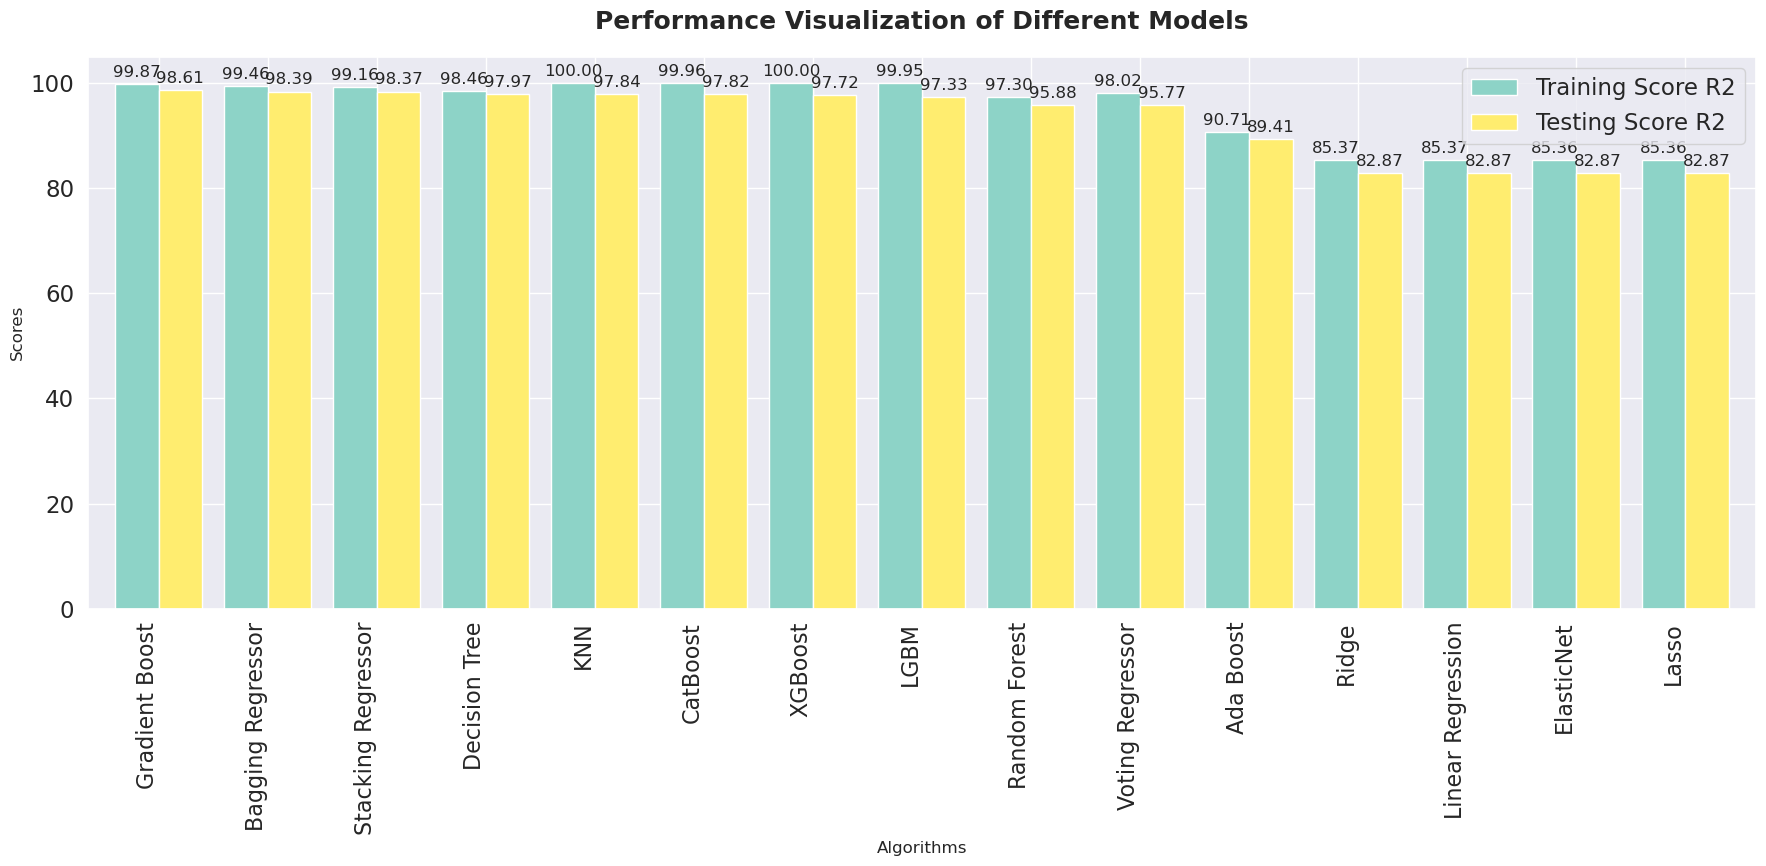

In [220]:
# Plotting bar chart for training and testing scores
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score R2","Testing Score R2"],
    kind="bar",
    figsize=(18, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=12, padding=3)

plt.tight_layout()
plt.show()

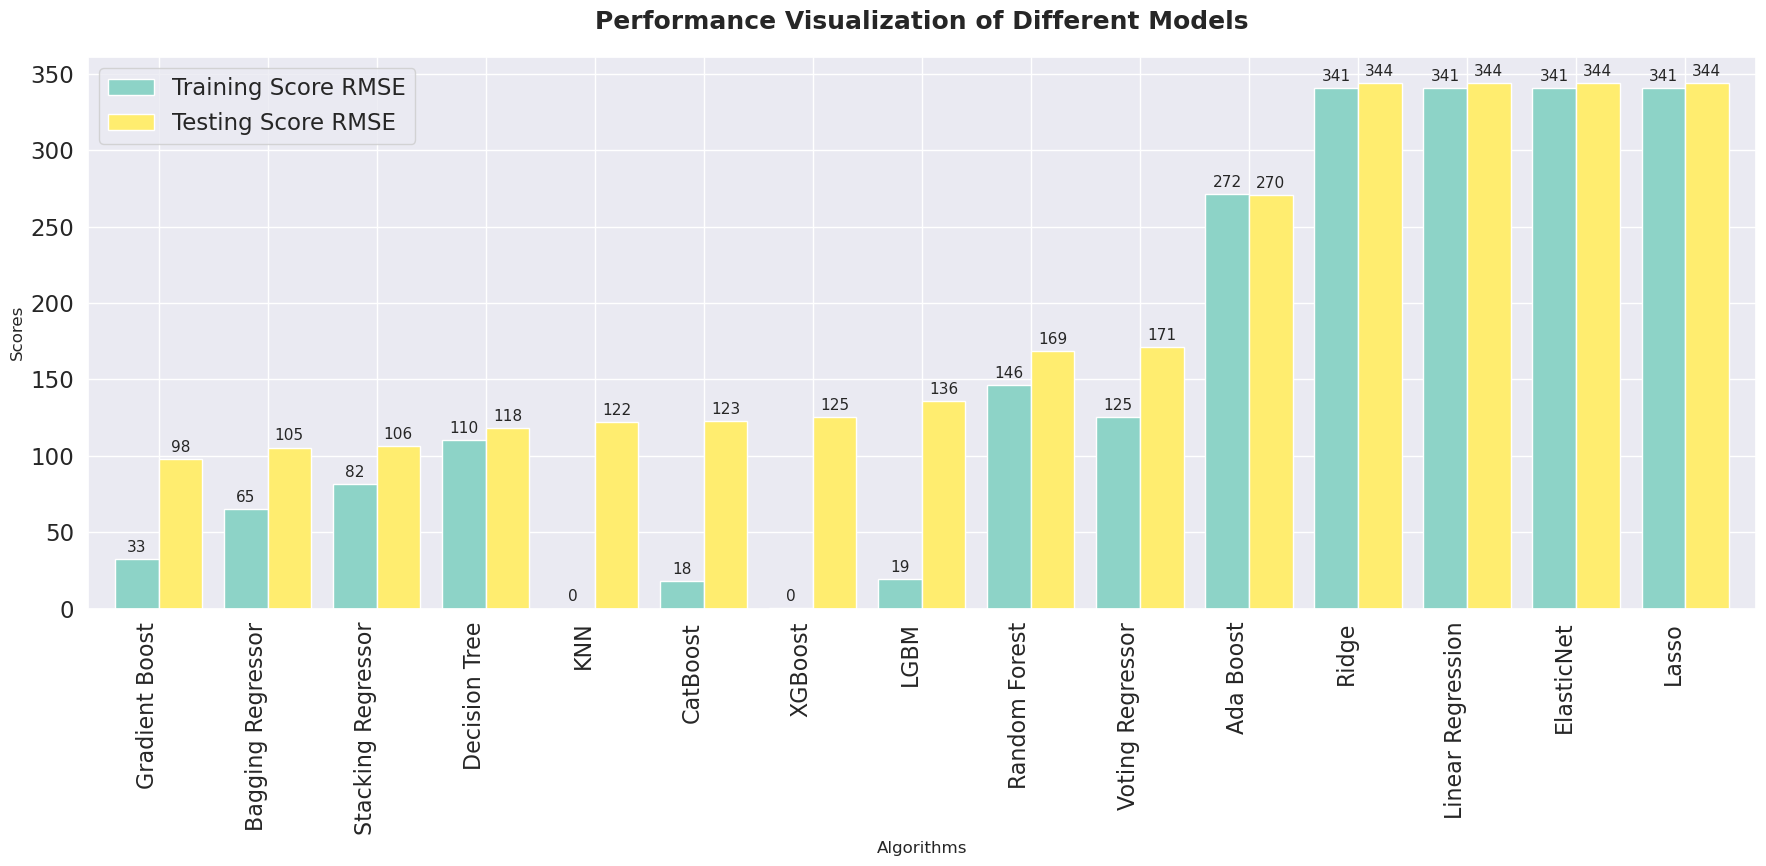

In [221]:
# Plotting bar chart for training and testing scores
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score RMSE","Testing Score RMSE"],
    kind="bar",
    figsize=(18, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=11, padding=3)

plt.tight_layout()
plt.show()


### **Report on Model Performance**

#### **1. Performance Without EDA**
- **Best Models**:
  - **Stacking Regressor** achieves the highest **testing R² (98.94%)** and the lowest **RMSE (85.68)**, demonstrating excellent predictive performance.
  - **Random Forest** follows with a testing R² of **98.74%** and RMSE of **93.46**.
  - **XGBoost** and **Gradient Boost** also perform strongly with testing R² above **98.39%** but have slightly higher RMSE values.

- **Insights**:
  - **Ensemble Models** like Stacking, Random Forest, and Gradient Boost significantly outperform simpler models such as Ridge, Lasso, and Linear Regression.

#### **2. Performance After EDA**
- **Top Performers**:
  - **Gradient Boost** performs the best after EDA with **testing R² of 98.45%** and RMSE of **103.52**.
  - **Bagging Regressor** and **Stacking Regressor** closely follow, with testing R² values of **98.44%** and **98.40%**, respectively.

- **Insights**:
  - EDA slightly improves model performance across the top models, reducing RMSE values compared to simpler models.

#### **3. Performance After Hyperparameter Tuning**
- **Best Models**:
  - **Gradient Boost** achieves the best performance with **testing R² of 98.61%** and RMSE of **97.95**.
  - **Bagging Regressor** and **Stacking Regressor** remain close contenders with testing R² values of **98.39%** and **98.35%**, respectively.

- **Insights**:
  - Hyperparameter tuning consistently improves the performance of ensemble models, further validating their robustness and ability to generalize well.

---

### **Final Verdict**
Based on the analysis:
1. **Gradient Boosting** is the best model overall:
   - Highest performance after hyperparameter tuning (testing R²: **98.61%**, RMSE: **97.95**).
   - Stable performance across all stages (EDA and tuning).
   - Excellent generalization capabilities.
2. **Alternative Choices**:
   - **Bagging Regressor** and **Stacking Regressor** are strong alternatives with similar performances.
   - If interpretability is a priority, consider **Random Forest**, which also performs strongly and is easier to interpret compared to Gradient Boost.

---

### **Recommendation**
Use **Gradient Boosting** as the final model for deployment. Ensure proper scaling and feature transformations during deployment to maintain the model's performance consistency.